In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.utils import weight_norm
import torch.utils.data as Data
import torch.optim as optim
import matplotlib.pyplot as plt
import sklearn.metrics as MK
from matplotlib import rcParams
from torchsummary import summary
import pywt
device = torch.device('cpu')

In [22]:
x = np.array(pd.read_excel(r'F:\OneDrive\桌面\混合气体差分谱.xlsx'))
print(x.shape)

(3300, 500)


In [3]:
def normalization(x):     
    data = []
    for i in x:
        shuju = (i-np.min(i))/(np.max(i)-np.min(i))
        data.append(shuju)
    return np.array(data)
x = normalization(x)

In [23]:
pp = np.ones(100)
y1 = pp*0
y2 = pp*0
y3 = pp*0
y4 = pp*0
y5 = pp*0
y6 = pp*0
y7 = pp*0
y8 = pp*0
y9 = pp*0.1
y10 = pp*0.5
y11 = pp*6
y12 = pp*10
y13 = pp*8
y14 = pp*2
y15 = pp*6
y16 = pp*4
y17 = pp*0.5
y18 = pp*2
y19 = pp*0.1
y20 = pp*4
y21 = pp*0
y22 = pp*0
y23 = pp*0
y24 = pp*0
y25 = pp*8
y26 = pp*10
y27 = pp*6
y28 = pp*4
y29 = pp*2
y30 = pp*0.5
y31 = pp*8
y32 = pp*10
y33 = pp*0.1
ySO2 = np.r_[y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11,y12,y13,y14,y15,y16,y17,y18,y19,y20,y21,y22,y23,y24,y25,y26,y27,y28,y29,y30,y31,y32,y33]

pp = np.ones(100)
yy1 = pp*0
yy2 = pp*0
yy3 = pp*0
yy4 = pp*0
yy5 = pp*0.1
yy6 = pp*0.5
yy7 = pp*4
yy8 = pp*6
yy9 = pp*0
yy10 = pp*0
yy11 = pp*0
yy12 = pp*0
yy13 = pp*0.5
yy14 = pp*4
yy15 = pp*0.1
yy16 = pp*2
yy17 = pp*0
yy18 = pp*0
yy19 = pp*0
yy20 = pp*0
yy21 = pp*6
yy22 = pp*10
yy23 = pp*2
yy24 = pp*8
yy25 = pp*2
yy26 = pp*8
yy27 = pp*10
yy28 = pp*10
yy29 = pp*0.5
yy30 = pp*6
yy31 = pp*0.1
yy32 = pp*8
yy33 = pp*4
yCS2 = np.r_[yy1,yy2,yy3,yy4,yy5,yy6,yy7,yy8,yy9,yy10,yy11,yy12,yy13,yy14,yy15,yy16,yy17,yy18,yy19,yy20,yy21,yy22,yy23,yy24,yy25,yy26,yy27,yy28,yy29,yy30,yy31,yy32,yy33]

pp = np.ones(100)
yyy1 = pp*0.1
yyy2 = pp*0.5
yyy3 = pp*2
yyy4 = pp*8
yyy5 = pp*0
yyy6 = pp*0
yyy7 = pp*0
yyy8 = pp*0
yyy9 = pp*0
yyy10 = pp*0
yyy11 = pp*0
yyy12 = pp*0
yyy13 = pp*0
yyy14 = pp*0
yyy15 = pp*0
yyy16 = pp*0
yyy17 = pp*6
yyy18 = pp*0.1
yyy19 = pp*4
yyy20 = pp*10
yyy21 = pp*0.5
yyy22 = pp*2
yyy23 = pp*6
yyy24 = pp*4
yyy25 = pp*6
yyy26 = pp*10
yyy27 = pp*8
yyy28 = pp*0.5
yyy29 = pp*8
yyy30 = pp*0.1
yyy31 = pp*2
yyy32 = pp*4
yyy33 = pp*10
yNO = np.r_[yyy1,yyy2,yyy3,yyy4,yyy5,yyy6,yyy7,yyy8,yyy9,yyy10,yyy11,yyy12,yyy13,yyy14,yyy15,yyy16,yyy17,yyy18,yyy19,yyy20,yyy21,yyy22,yyy23,yyy24,yyy25,yyy26,yyy27,yyy28,yyy29,yyy30,yyy31,yyy32,yyy33]
y = np.c_[ySO2,yCS2,yNO]
print(y.shape)

(3300, 3)


In [24]:
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size = 0.2,random_state = 17)

In [25]:
print(f'x_train:{x_train.shape}')
x_train = np.array(x_train).reshape(x_train.shape[0], 1, x_train.shape[1])
x_test = np.array(x_test).reshape(x_test.shape[0], 1, x_test.shape[1])
print("Shapes:\nx_train:%s\ny_train:%s\n" % (x_train.shape, y_train.shape))
print("x_test:%s\ny_test:%s\n" % (x_test.shape, y_test.shape))

x_train:(2640, 500)
Shapes:
x_train:(2640, 1, 500)
y_train:(2640, 3)

x_test:(660, 1, 500)
y_test:(660, 3)



In [26]:
torch.manual_seed(20)   
x_train = torch.Tensor(x_train)
y_train = torch.Tensor(y_train)
torch_dataset = Data.TensorDataset(x_train, y_train)    
loader = Data.DataLoader(
    dataset=torch_dataset,
    batch_size=64,  
    shuffle=False  
)

LSTM

In [27]:
class LSTM(nn.Module):
    def __init__(self, input_dim=500, hidden_dim=128, num_layers=1): 
        super(LSTM, self).__init__() 
        
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True) 
        self.fc = nn.Linear(128,1)

    def forward(self, x): 

        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim)
        out, _ = self.lstm(x, (h0, c0))
        out1 = self.fc(out[:, -1, :])
        out2 = self.fc(out[:, -1, :])
        out3 = self.fc(out[:, -1, :])  
        
        return out1, out2, out3  

GRU

In [33]:
class GRU(nn.Module):
    def __init__(self, input_dim=500, hidden_dim=128, num_layers=1): 
        super(GRU, self).__init__() 
        
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True) 
        self.fc = nn.Linear(hidden_dim,64)
        self.FC = nn.Linear(64,1)
        self.relu = nn.ReLU()

    def forward(self, x): 
        
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim)  
        out, _ = self.gru(x, h0)
        out1 = self.FC(self.relu(self.fc(out[:, -1, :])))
        out2 = self.FC(self.relu(self.fc(out[:, -1, :])))
        out3 = self.FC(self.relu(self.fc(out[:, -1, :])))
                
        return out1, out2, out3  
    
summary(GRU(),(1,500))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
               GRU-1  [[-1, 1, 128], [-1, 2, 128]]               0
            Linear-2                   [-1, 64]           8,256
              ReLU-3                   [-1, 64]               0
            Linear-4                    [-1, 1]              65
            Linear-5                   [-1, 64]           8,256
              ReLU-6                   [-1, 64]               0
            Linear-7                    [-1, 1]              65
            Linear-8                   [-1, 64]           8,256
              ReLU-9                   [-1, 64]               0
           Linear-10                    [-1, 1]              65
Total params: 24,963
Trainable params: 24,963
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.25
Params size (MB): 0.10
Estimated 

In [34]:
def train(model, optimizer, EPOCHS, criterion):
    Loss_all_list = []
    global epoch
    for epoch in range(1, EPOCHS + 1):
        Loss_list = []
        model.train()
        
        for inputs,labels in loader:
            inputs = torch.Tensor(inputs).float()
            inputs.to(device) 
            optimizer.zero_grad() 
            output1,output2,output3 = model(inputs)
#             model.weights.data = model.softmax(model.weights.data)
            loss1 = criterion(output1, labels[:,0].unsqueeze(1)) 
            loss2 = criterion(output2, labels[:,1].unsqueeze(1))
            loss3 = criterion(output3, labels[:,2].unsqueeze(1))
            loss = loss1+loss2+loss3
            loss.backward() 
            optimizer.step()
            
            print('Train Epoch: {}/{}\tLoss: {:.6f},'.format(
                epoch, EPOCHS, loss.item()))
            
            Loss_list.append(loss.item())
        Loss_all_list.append(np.mean(np.array(Loss_list))) 
    plt.figure()
    plt.xlabel('Epoch(times)')
    plt.ylabel('Loss')
    plt.plot(np.array(Loss_all_list))

Train Epoch: 1/800	Loss: 58.772713,
Train Epoch: 1/800	Loss: 57.145905,
Train Epoch: 1/800	Loss: 50.438316,
Train Epoch: 1/800	Loss: 51.234104,
Train Epoch: 1/800	Loss: 59.596630,
Train Epoch: 1/800	Loss: 62.337654,
Train Epoch: 1/800	Loss: 51.728760,
Train Epoch: 1/800	Loss: 57.032104,
Train Epoch: 1/800	Loss: 50.550812,
Train Epoch: 1/800	Loss: 57.371998,
Train Epoch: 1/800	Loss: 48.381283,
Train Epoch: 1/800	Loss: 59.169312,
Train Epoch: 1/800	Loss: 57.276566,
Train Epoch: 1/800	Loss: 50.431534,
Train Epoch: 1/800	Loss: 53.151382,
Train Epoch: 1/800	Loss: 51.437897,
Train Epoch: 1/800	Loss: 44.045563,
Train Epoch: 1/800	Loss: 38.792458,
Train Epoch: 1/800	Loss: 49.059830,
Train Epoch: 1/800	Loss: 55.224228,
Train Epoch: 1/800	Loss: 51.736443,
Train Epoch: 1/800	Loss: 43.056602,
Train Epoch: 1/800	Loss: 39.936069,
Train Epoch: 1/800	Loss: 44.474846,
Train Epoch: 1/800	Loss: 34.600220,
Train Epoch: 1/800	Loss: 48.058350,
Train Epoch: 1/800	Loss: 33.833069,
Train Epoch: 1/800	Loss: 29.

Train Epoch: 6/800	Loss: 26.523945,
Train Epoch: 6/800	Loss: 21.771534,
Train Epoch: 6/800	Loss: 20.244854,
Train Epoch: 6/800	Loss: 18.242287,
Train Epoch: 6/800	Loss: 24.786095,
Train Epoch: 6/800	Loss: 23.885159,
Train Epoch: 6/800	Loss: 21.915909,
Train Epoch: 6/800	Loss: 19.647663,
Train Epoch: 6/800	Loss: 27.678379,
Train Epoch: 6/800	Loss: 23.098755,
Train Epoch: 6/800	Loss: 22.097460,
Train Epoch: 6/800	Loss: 25.133492,
Train Epoch: 6/800	Loss: 25.796684,
Train Epoch: 6/800	Loss: 21.936705,
Train Epoch: 6/800	Loss: 18.899822,
Train Epoch: 6/800	Loss: 20.092215,
Train Epoch: 6/800	Loss: 23.413280,
Train Epoch: 7/800	Loss: 26.390984,
Train Epoch: 7/800	Loss: 19.395500,
Train Epoch: 7/800	Loss: 23.620152,
Train Epoch: 7/800	Loss: 18.168087,
Train Epoch: 7/800	Loss: 26.101402,
Train Epoch: 7/800	Loss: 20.642132,
Train Epoch: 7/800	Loss: 16.238831,
Train Epoch: 7/800	Loss: 23.440096,
Train Epoch: 7/800	Loss: 24.986822,
Train Epoch: 7/800	Loss: 21.361223,
Train Epoch: 7/800	Loss: 20.

Train Epoch: 12/800	Loss: 22.639170,
Train Epoch: 12/800	Loss: 23.968229,
Train Epoch: 12/800	Loss: 20.556223,
Train Epoch: 12/800	Loss: 19.401585,
Train Epoch: 12/800	Loss: 19.017527,
Train Epoch: 12/800	Loss: 17.370611,
Train Epoch: 12/800	Loss: 21.562551,
Train Epoch: 12/800	Loss: 25.144112,
Train Epoch: 12/800	Loss: 21.958397,
Train Epoch: 12/800	Loss: 21.339788,
Train Epoch: 12/800	Loss: 19.768185,
Train Epoch: 12/800	Loss: 25.990234,
Train Epoch: 12/800	Loss: 18.615599,
Train Epoch: 12/800	Loss: 19.782152,
Train Epoch: 12/800	Loss: 22.092983,
Train Epoch: 12/800	Loss: 18.553919,
Train Epoch: 12/800	Loss: 23.860233,
Train Epoch: 12/800	Loss: 18.838539,
Train Epoch: 12/800	Loss: 24.694702,
Train Epoch: 12/800	Loss: 20.560555,
Train Epoch: 12/800	Loss: 19.309294,
Train Epoch: 12/800	Loss: 17.284761,
Train Epoch: 12/800	Loss: 23.629202,
Train Epoch: 12/800	Loss: 22.633308,
Train Epoch: 12/800	Loss: 21.076527,
Train Epoch: 12/800	Loss: 18.603680,
Train Epoch: 12/800	Loss: 26.457001,
T

Train Epoch: 17/800	Loss: 22.069340,
Train Epoch: 17/800	Loss: 18.504059,
Train Epoch: 17/800	Loss: 23.807175,
Train Epoch: 17/800	Loss: 18.802076,
Train Epoch: 17/800	Loss: 24.656105,
Train Epoch: 17/800	Loss: 20.510109,
Train Epoch: 17/800	Loss: 19.279371,
Train Epoch: 17/800	Loss: 17.264441,
Train Epoch: 17/800	Loss: 23.615417,
Train Epoch: 17/800	Loss: 22.575890,
Train Epoch: 17/800	Loss: 21.051680,
Train Epoch: 17/800	Loss: 18.580786,
Train Epoch: 17/800	Loss: 26.413204,
Train Epoch: 17/800	Loss: 21.794239,
Train Epoch: 17/800	Loss: 21.219557,
Train Epoch: 17/800	Loss: 24.225910,
Train Epoch: 17/800	Loss: 24.833700,
Train Epoch: 17/800	Loss: 20.996490,
Train Epoch: 17/800	Loss: 18.142824,
Train Epoch: 17/800	Loss: 19.137299,
Train Epoch: 17/800	Loss: 22.187004,
Train Epoch: 18/800	Loss: 25.106499,
Train Epoch: 18/800	Loss: 18.471514,
Train Epoch: 18/800	Loss: 22.603416,
Train Epoch: 18/800	Loss: 17.360147,
Train Epoch: 18/800	Loss: 25.227188,
Train Epoch: 18/800	Loss: 19.736126,
T

Train Epoch: 22/800	Loss: 21.216490,
Train Epoch: 22/800	Loss: 24.218533,
Train Epoch: 22/800	Loss: 24.819782,
Train Epoch: 22/800	Loss: 20.983990,
Train Epoch: 22/800	Loss: 18.134871,
Train Epoch: 22/800	Loss: 19.139210,
Train Epoch: 22/800	Loss: 22.169935,
Train Epoch: 23/800	Loss: 25.092773,
Train Epoch: 23/800	Loss: 18.473135,
Train Epoch: 23/800	Loss: 22.596260,
Train Epoch: 23/800	Loss: 17.348690,
Train Epoch: 23/800	Loss: 25.226501,
Train Epoch: 23/800	Loss: 19.732227,
Train Epoch: 23/800	Loss: 15.439947,
Train Epoch: 23/800	Loss: 22.569454,
Train Epoch: 23/800	Loss: 23.874966,
Train Epoch: 23/800	Loss: 20.497194,
Train Epoch: 23/800	Loss: 19.357801,
Train Epoch: 23/800	Loss: 18.937769,
Train Epoch: 23/800	Loss: 17.297638,
Train Epoch: 23/800	Loss: 21.505207,
Train Epoch: 23/800	Loss: 25.085392,
Train Epoch: 23/800	Loss: 21.863262,
Train Epoch: 23/800	Loss: 21.286108,
Train Epoch: 23/800	Loss: 19.712917,
Train Epoch: 23/800	Loss: 25.916874,
Train Epoch: 23/800	Loss: 18.529871,
T

Train Epoch: 28/800	Loss: 15.429785,
Train Epoch: 28/800	Loss: 22.574123,
Train Epoch: 28/800	Loss: 23.869583,
Train Epoch: 28/800	Loss: 20.482502,
Train Epoch: 28/800	Loss: 19.356644,
Train Epoch: 28/800	Loss: 18.948586,
Train Epoch: 28/800	Loss: 17.290560,
Train Epoch: 28/800	Loss: 21.490568,
Train Epoch: 28/800	Loss: 25.074631,
Train Epoch: 28/800	Loss: 21.855141,
Train Epoch: 28/800	Loss: 21.275961,
Train Epoch: 28/800	Loss: 19.703957,
Train Epoch: 28/800	Loss: 25.914528,
Train Epoch: 28/800	Loss: 18.519697,
Train Epoch: 28/800	Loss: 19.705170,
Train Epoch: 28/800	Loss: 22.065151,
Train Epoch: 28/800	Loss: 18.501013,
Train Epoch: 28/800	Loss: 23.784231,
Train Epoch: 28/800	Loss: 18.802990,
Train Epoch: 28/800	Loss: 24.639418,
Train Epoch: 28/800	Loss: 20.495071,
Train Epoch: 28/800	Loss: 19.260450,
Train Epoch: 28/800	Loss: 17.255424,
Train Epoch: 28/800	Loss: 23.610508,
Train Epoch: 28/800	Loss: 22.530800,
Train Epoch: 28/800	Loss: 21.043398,
Train Epoch: 28/800	Loss: 18.563259,
T

Train Epoch: 33/800	Loss: 18.488014,
Train Epoch: 33/800	Loss: 23.783295,
Train Epoch: 33/800	Loss: 18.804871,
Train Epoch: 33/800	Loss: 24.638817,
Train Epoch: 33/800	Loss: 20.479904,
Train Epoch: 33/800	Loss: 19.256525,
Train Epoch: 33/800	Loss: 17.248192,
Train Epoch: 33/800	Loss: 23.596340,
Train Epoch: 33/800	Loss: 22.515066,
Train Epoch: 33/800	Loss: 21.043161,
Train Epoch: 33/800	Loss: 18.553467,
Train Epoch: 33/800	Loss: 26.371677,
Train Epoch: 33/800	Loss: 21.733854,
Train Epoch: 33/800	Loss: 21.215036,
Train Epoch: 33/800	Loss: 24.187710,
Train Epoch: 33/800	Loss: 24.792015,
Train Epoch: 33/800	Loss: 20.975634,
Train Epoch: 33/800	Loss: 18.132509,
Train Epoch: 33/800	Loss: 19.113693,
Train Epoch: 33/800	Loss: 22.144047,
Train Epoch: 34/800	Loss: 25.091282,
Train Epoch: 34/800	Loss: 18.462004,
Train Epoch: 34/800	Loss: 22.578516,
Train Epoch: 34/800	Loss: 17.320915,
Train Epoch: 34/800	Loss: 25.226904,
Train Epoch: 34/800	Loss: 19.720795,
Train Epoch: 34/800	Loss: 15.427056,
T

Train Epoch: 38/800	Loss: 19.107769,
Train Epoch: 38/800	Loss: 22.139126,
Train Epoch: 39/800	Loss: 25.089632,
Train Epoch: 39/800	Loss: 18.453117,
Train Epoch: 39/800	Loss: 22.577652,
Train Epoch: 39/800	Loss: 17.318607,
Train Epoch: 39/800	Loss: 25.213442,
Train Epoch: 39/800	Loss: 19.721123,
Train Epoch: 39/800	Loss: 15.426692,
Train Epoch: 39/800	Loss: 22.572485,
Train Epoch: 39/800	Loss: 23.845322,
Train Epoch: 39/800	Loss: 20.468372,
Train Epoch: 39/800	Loss: 19.359455,
Train Epoch: 39/800	Loss: 18.926592,
Train Epoch: 39/800	Loss: 17.291430,
Train Epoch: 39/800	Loss: 21.485939,
Train Epoch: 39/800	Loss: 25.069672,
Train Epoch: 39/800	Loss: 21.822279,
Train Epoch: 39/800	Loss: 21.263590,
Train Epoch: 39/800	Loss: 19.700434,
Train Epoch: 39/800	Loss: 25.898771,
Train Epoch: 39/800	Loss: 18.493444,
Train Epoch: 39/800	Loss: 19.699442,
Train Epoch: 39/800	Loss: 22.046944,
Train Epoch: 39/800	Loss: 18.485313,
Train Epoch: 39/800	Loss: 23.781231,
Train Epoch: 39/800	Loss: 18.796843,
T

Train Epoch: 44/800	Loss: 21.265623,
Train Epoch: 44/800	Loss: 19.704397,
Train Epoch: 44/800	Loss: 25.896736,
Train Epoch: 44/800	Loss: 18.493141,
Train Epoch: 44/800	Loss: 19.698189,
Train Epoch: 44/800	Loss: 22.047331,
Train Epoch: 44/800	Loss: 18.485003,
Train Epoch: 44/800	Loss: 23.779169,
Train Epoch: 44/800	Loss: 18.798283,
Train Epoch: 44/800	Loss: 24.642145,
Train Epoch: 44/800	Loss: 20.474024,
Train Epoch: 44/800	Loss: 19.249666,
Train Epoch: 44/800	Loss: 17.237261,
Train Epoch: 44/800	Loss: 23.594877,
Train Epoch: 44/800	Loss: 22.503918,
Train Epoch: 44/800	Loss: 21.035915,
Train Epoch: 44/800	Loss: 18.544834,
Train Epoch: 44/800	Loss: 26.360327,
Train Epoch: 44/800	Loss: 21.728386,
Train Epoch: 44/800	Loss: 21.205933,
Train Epoch: 44/800	Loss: 24.175100,
Train Epoch: 44/800	Loss: 24.786709,
Train Epoch: 44/800	Loss: 20.972107,
Train Epoch: 44/800	Loss: 18.128641,
Train Epoch: 44/800	Loss: 19.104239,
Train Epoch: 44/800	Loss: 22.135845,
Train Epoch: 45/800	Loss: 25.089111,
T

Train Epoch: 49/800	Loss: 21.728682,
Train Epoch: 49/800	Loss: 21.200932,
Train Epoch: 49/800	Loss: 24.171118,
Train Epoch: 49/800	Loss: 24.784687,
Train Epoch: 49/800	Loss: 20.970343,
Train Epoch: 49/800	Loss: 18.127029,
Train Epoch: 49/800	Loss: 19.103357,
Train Epoch: 49/800	Loss: 22.131052,
Train Epoch: 50/800	Loss: 25.087484,
Train Epoch: 50/800	Loss: 18.443794,
Train Epoch: 50/800	Loss: 22.580475,
Train Epoch: 50/800	Loss: 17.315517,
Train Epoch: 50/800	Loss: 25.195993,
Train Epoch: 50/800	Loss: 19.725254,
Train Epoch: 50/800	Loss: 15.421902,
Train Epoch: 50/800	Loss: 22.563852,
Train Epoch: 50/800	Loss: 23.839680,
Train Epoch: 50/800	Loss: 20.465218,
Train Epoch: 50/800	Loss: 19.350143,
Train Epoch: 50/800	Loss: 18.917294,
Train Epoch: 50/800	Loss: 17.287783,
Train Epoch: 50/800	Loss: 21.476175,
Train Epoch: 50/800	Loss: 25.074755,
Train Epoch: 50/800	Loss: 21.818735,
Train Epoch: 50/800	Loss: 21.271160,
Train Epoch: 50/800	Loss: 19.705769,
Train Epoch: 50/800	Loss: 25.899635,
T

Train Epoch: 55/800	Loss: 22.562788,
Train Epoch: 55/800	Loss: 23.838840,
Train Epoch: 55/800	Loss: 20.464010,
Train Epoch: 55/800	Loss: 19.348873,
Train Epoch: 55/800	Loss: 18.916584,
Train Epoch: 55/800	Loss: 17.284933,
Train Epoch: 55/800	Loss: 21.476326,
Train Epoch: 55/800	Loss: 25.072536,
Train Epoch: 55/800	Loss: 21.819710,
Train Epoch: 55/800	Loss: 21.274958,
Train Epoch: 55/800	Loss: 19.704830,
Train Epoch: 55/800	Loss: 25.902941,
Train Epoch: 55/800	Loss: 18.499935,
Train Epoch: 55/800	Loss: 19.697840,
Train Epoch: 55/800	Loss: 22.062262,
Train Epoch: 55/800	Loss: 18.483795,
Train Epoch: 55/800	Loss: 23.787182,
Train Epoch: 55/800	Loss: 18.812166,
Train Epoch: 55/800	Loss: 24.646313,
Train Epoch: 55/800	Loss: 20.470663,
Train Epoch: 55/800	Loss: 19.249754,
Train Epoch: 55/800	Loss: 17.231239,
Train Epoch: 55/800	Loss: 23.608627,
Train Epoch: 55/800	Loss: 22.498104,
Train Epoch: 55/800	Loss: 21.035002,
Train Epoch: 55/800	Loss: 18.545546,
Train Epoch: 55/800	Loss: 26.355103,
T

Train Epoch: 60/800	Loss: 18.813549,
Train Epoch: 60/800	Loss: 24.648369,
Train Epoch: 60/800	Loss: 20.470600,
Train Epoch: 60/800	Loss: 19.248911,
Train Epoch: 60/800	Loss: 17.229927,
Train Epoch: 60/800	Loss: 23.613037,
Train Epoch: 60/800	Loss: 22.496227,
Train Epoch: 60/800	Loss: 21.036259,
Train Epoch: 60/800	Loss: 18.546041,
Train Epoch: 60/800	Loss: 26.354000,
Train Epoch: 60/800	Loss: 21.736345,
Train Epoch: 60/800	Loss: 21.197447,
Train Epoch: 60/800	Loss: 24.173641,
Train Epoch: 60/800	Loss: 24.782429,
Train Epoch: 60/800	Loss: 20.968964,
Train Epoch: 60/800	Loss: 18.129868,
Train Epoch: 60/800	Loss: 19.102989,
Train Epoch: 60/800	Loss: 22.127579,
Train Epoch: 61/800	Loss: 25.089813,
Train Epoch: 61/800	Loss: 18.441790,
Train Epoch: 61/800	Loss: 22.584160,
Train Epoch: 61/800	Loss: 17.313761,
Train Epoch: 61/800	Loss: 25.191441,
Train Epoch: 61/800	Loss: 19.729321,
Train Epoch: 61/800	Loss: 15.419845,
Train Epoch: 61/800	Loss: 22.561794,
Train Epoch: 61/800	Loss: 23.838074,
T

Train Epoch: 65/800	Loss: 24.173904,
Train Epoch: 65/800	Loss: 24.781904,
Train Epoch: 65/800	Loss: 20.968349,
Train Epoch: 65/800	Loss: 18.130278,
Train Epoch: 65/800	Loss: 19.102156,
Train Epoch: 65/800	Loss: 22.126640,
Train Epoch: 66/800	Loss: 25.089634,
Train Epoch: 66/800	Loss: 18.440361,
Train Epoch: 66/800	Loss: 22.585039,
Train Epoch: 66/800	Loss: 17.312786,
Train Epoch: 66/800	Loss: 25.189768,
Train Epoch: 66/800	Loss: 19.729069,
Train Epoch: 66/800	Loss: 15.418360,
Train Epoch: 66/800	Loss: 22.560925,
Train Epoch: 66/800	Loss: 23.836704,
Train Epoch: 66/800	Loss: 20.461811,
Train Epoch: 66/800	Loss: 19.347271,
Train Epoch: 66/800	Loss: 18.915617,
Train Epoch: 66/800	Loss: 17.281395,
Train Epoch: 66/800	Loss: 21.476280,
Train Epoch: 66/800	Loss: 25.065500,
Train Epoch: 66/800	Loss: 21.820482,
Train Epoch: 66/800	Loss: 21.275827,
Train Epoch: 66/800	Loss: 19.702629,
Train Epoch: 66/800	Loss: 25.903706,
Train Epoch: 66/800	Loss: 18.496902,
Train Epoch: 66/800	Loss: 19.698437,
T

Train Epoch: 71/800	Loss: 18.915115,
Train Epoch: 71/800	Loss: 17.280264,
Train Epoch: 71/800	Loss: 21.476223,
Train Epoch: 71/800	Loss: 25.063061,
Train Epoch: 71/800	Loss: 21.820578,
Train Epoch: 71/800	Loss: 21.275848,
Train Epoch: 71/800	Loss: 19.701845,
Train Epoch: 71/800	Loss: 25.903576,
Train Epoch: 71/800	Loss: 18.495626,
Train Epoch: 71/800	Loss: 19.698685,
Train Epoch: 71/800	Loss: 22.062748,
Train Epoch: 71/800	Loss: 18.480862,
Train Epoch: 71/800	Loss: 23.788799,
Train Epoch: 71/800	Loss: 18.812752,
Train Epoch: 71/800	Loss: 24.649693,
Train Epoch: 71/800	Loss: 20.469286,
Train Epoch: 71/800	Loss: 19.246227,
Train Epoch: 71/800	Loss: 17.228104,
Train Epoch: 71/800	Loss: 23.615187,
Train Epoch: 71/800	Loss: 22.493256,
Train Epoch: 71/800	Loss: 21.036568,
Train Epoch: 71/800	Loss: 18.544800,
Train Epoch: 71/800	Loss: 26.352129,
Train Epoch: 71/800	Loss: 21.738035,
Train Epoch: 71/800	Loss: 21.195599,
Train Epoch: 71/800	Loss: 24.174349,
Train Epoch: 71/800	Loss: 24.781441,
T

Train Epoch: 76/800	Loss: 22.492451,
Train Epoch: 76/800	Loss: 21.036377,
Train Epoch: 76/800	Loss: 18.544628,
Train Epoch: 76/800	Loss: 26.351250,
Train Epoch: 76/800	Loss: 21.738422,
Train Epoch: 76/800	Loss: 21.194660,
Train Epoch: 76/800	Loss: 24.173767,
Train Epoch: 76/800	Loss: 24.781219,
Train Epoch: 76/800	Loss: 20.967093,
Train Epoch: 76/800	Loss: 18.130781,
Train Epoch: 76/800	Loss: 19.100887,
Train Epoch: 76/800	Loss: 22.124872,
Train Epoch: 77/800	Loss: 25.089855,
Train Epoch: 77/800	Loss: 18.439217,
Train Epoch: 77/800	Loss: 22.585602,
Train Epoch: 77/800	Loss: 17.311378,
Train Epoch: 77/800	Loss: 25.188272,
Train Epoch: 77/800	Loss: 19.729137,
Train Epoch: 77/800	Loss: 15.416916,
Train Epoch: 77/800	Loss: 22.559135,
Train Epoch: 77/800	Loss: 23.834919,
Train Epoch: 77/800	Loss: 20.460520,
Train Epoch: 77/800	Loss: 19.346291,
Train Epoch: 77/800	Loss: 18.914642,
Train Epoch: 77/800	Loss: 17.279472,
Train Epoch: 77/800	Loss: 21.475754,
Train Epoch: 77/800	Loss: 25.061329,
T

Train Epoch: 82/800	Loss: 15.416589,
Train Epoch: 82/800	Loss: 22.558247,
Train Epoch: 82/800	Loss: 23.834118,
Train Epoch: 82/800	Loss: 20.460320,
Train Epoch: 82/800	Loss: 19.345629,
Train Epoch: 82/800	Loss: 18.914261,
Train Epoch: 82/800	Loss: 17.279051,
Train Epoch: 82/800	Loss: 21.475227,
Train Epoch: 82/800	Loss: 25.060322,
Train Epoch: 82/800	Loss: 21.818668,
Train Epoch: 82/800	Loss: 21.275085,
Train Epoch: 82/800	Loss: 19.701759,
Train Epoch: 82/800	Loss: 25.901043,
Train Epoch: 82/800	Loss: 18.494522,
Train Epoch: 82/800	Loss: 19.697815,
Train Epoch: 82/800	Loss: 22.061836,
Train Epoch: 82/800	Loss: 18.479868,
Train Epoch: 82/800	Loss: 23.787521,
Train Epoch: 82/800	Loss: 18.815065,
Train Epoch: 82/800	Loss: 24.647541,
Train Epoch: 82/800	Loss: 20.468164,
Train Epoch: 82/800	Loss: 19.245874,
Train Epoch: 82/800	Loss: 17.226742,
Train Epoch: 82/800	Loss: 23.617138,
Train Epoch: 82/800	Loss: 22.491692,
Train Epoch: 82/800	Loss: 21.035677,
Train Epoch: 82/800	Loss: 18.544432,
T

Train Epoch: 87/800	Loss: 18.815784,
Train Epoch: 87/800	Loss: 24.646358,
Train Epoch: 87/800	Loss: 20.467562,
Train Epoch: 87/800	Loss: 19.245739,
Train Epoch: 87/800	Loss: 17.226210,
Train Epoch: 87/800	Loss: 23.617287,
Train Epoch: 87/800	Loss: 22.491253,
Train Epoch: 87/800	Loss: 21.034883,
Train Epoch: 87/800	Loss: 18.544096,
Train Epoch: 87/800	Loss: 26.349489,
Train Epoch: 87/800	Loss: 21.738323,
Train Epoch: 87/800	Loss: 21.192810,
Train Epoch: 87/800	Loss: 24.171799,
Train Epoch: 87/800	Loss: 24.780777,
Train Epoch: 87/800	Loss: 20.965778,
Train Epoch: 87/800	Loss: 18.129551,
Train Epoch: 87/800	Loss: 19.100153,
Train Epoch: 87/800	Loss: 22.122725,
Train Epoch: 88/800	Loss: 25.089249,
Train Epoch: 88/800	Loss: 18.438923,
Train Epoch: 88/800	Loss: 22.583965,
Train Epoch: 88/800	Loss: 17.310011,
Train Epoch: 88/800	Loss: 25.188005,
Train Epoch: 88/800	Loss: 19.727402,
Train Epoch: 88/800	Loss: 15.416075,
Train Epoch: 88/800	Loss: 22.557171,
Train Epoch: 88/800	Loss: 23.833097,
T

Train Epoch: 92/800	Loss: 24.780590,
Train Epoch: 92/800	Loss: 20.965298,
Train Epoch: 92/800	Loss: 18.129084,
Train Epoch: 92/800	Loss: 19.099712,
Train Epoch: 92/800	Loss: 22.122051,
Train Epoch: 93/800	Loss: 25.088911,
Train Epoch: 93/800	Loss: 18.438597,
Train Epoch: 93/800	Loss: 22.583588,
Train Epoch: 93/800	Loss: 17.309338,
Train Epoch: 93/800	Loss: 25.187683,
Train Epoch: 93/800	Loss: 19.726669,
Train Epoch: 93/800	Loss: 15.415596,
Train Epoch: 93/800	Loss: 22.556337,
Train Epoch: 93/800	Loss: 23.832321,
Train Epoch: 93/800	Loss: 20.459723,
Train Epoch: 93/800	Loss: 19.344313,
Train Epoch: 93/800	Loss: 18.913391,
Train Epoch: 93/800	Loss: 17.277939,
Train Epoch: 93/800	Loss: 21.473692,
Train Epoch: 93/800	Loss: 25.058012,
Train Epoch: 93/800	Loss: 21.816637,
Train Epoch: 93/800	Loss: 21.273588,
Train Epoch: 93/800	Loss: 19.701595,
Train Epoch: 93/800	Loss: 25.898371,
Train Epoch: 93/800	Loss: 18.493008,
Train Epoch: 93/800	Loss: 19.697214,
Train Epoch: 93/800	Loss: 22.059790,
T

Train Epoch: 98/800	Loss: 22.555563,
Train Epoch: 98/800	Loss: 23.831615,
Train Epoch: 98/800	Loss: 20.459377,
Train Epoch: 98/800	Loss: 19.343817,
Train Epoch: 98/800	Loss: 18.912975,
Train Epoch: 98/800	Loss: 17.277464,
Train Epoch: 98/800	Loss: 21.473131,
Train Epoch: 98/800	Loss: 25.056919,
Train Epoch: 98/800	Loss: 21.815945,
Train Epoch: 98/800	Loss: 21.272963,
Train Epoch: 98/800	Loss: 19.701412,
Train Epoch: 98/800	Loss: 25.897411,
Train Epoch: 98/800	Loss: 18.492386,
Train Epoch: 98/800	Loss: 19.697044,
Train Epoch: 98/800	Loss: 22.058987,
Train Epoch: 98/800	Loss: 18.478693,
Train Epoch: 98/800	Loss: 23.785238,
Train Epoch: 98/800	Loss: 18.816471,
Train Epoch: 98/800	Loss: 24.644711,
Train Epoch: 98/800	Loss: 20.466513,
Train Epoch: 98/800	Loss: 19.245197,
Train Epoch: 98/800	Loss: 17.225161,
Train Epoch: 98/800	Loss: 23.617615,
Train Epoch: 98/800	Loss: 22.490170,
Train Epoch: 98/800	Loss: 21.033852,
Train Epoch: 98/800	Loss: 18.542984,
Train Epoch: 98/800	Loss: 26.348312,
T

Train Epoch: 103/800	Loss: 21.272369,
Train Epoch: 103/800	Loss: 19.701206,
Train Epoch: 103/800	Loss: 25.896563,
Train Epoch: 103/800	Loss: 18.491829,
Train Epoch: 103/800	Loss: 19.696930,
Train Epoch: 103/800	Loss: 22.058252,
Train Epoch: 103/800	Loss: 18.478363,
Train Epoch: 103/800	Loss: 23.784679,
Train Epoch: 103/800	Loss: 18.816759,
Train Epoch: 103/800	Loss: 24.644093,
Train Epoch: 103/800	Loss: 20.466141,
Train Epoch: 103/800	Loss: 19.244947,
Train Epoch: 103/800	Loss: 17.224716,
Train Epoch: 103/800	Loss: 23.617849,
Train Epoch: 103/800	Loss: 22.489765,
Train Epoch: 103/800	Loss: 21.033508,
Train Epoch: 103/800	Loss: 18.542526,
Train Epoch: 103/800	Loss: 26.347902,
Train Epoch: 103/800	Loss: 21.738037,
Train Epoch: 103/800	Loss: 21.190855,
Train Epoch: 103/800	Loss: 24.170116,
Train Epoch: 103/800	Loss: 24.780252,
Train Epoch: 103/800	Loss: 20.964399,
Train Epoch: 103/800	Loss: 18.128195,
Train Epoch: 103/800	Loss: 19.098921,
Train Epoch: 103/800	Loss: 22.120914,
Train Epoch:

Train Epoch: 108/800	Loss: 17.224325,
Train Epoch: 108/800	Loss: 23.618031,
Train Epoch: 108/800	Loss: 22.489502,
Train Epoch: 108/800	Loss: 21.033092,
Train Epoch: 108/800	Loss: 18.542130,
Train Epoch: 108/800	Loss: 26.347492,
Train Epoch: 108/800	Loss: 21.737888,
Train Epoch: 108/800	Loss: 21.190334,
Train Epoch: 108/800	Loss: 24.169617,
Train Epoch: 108/800	Loss: 24.780128,
Train Epoch: 108/800	Loss: 20.964081,
Train Epoch: 108/800	Loss: 18.127705,
Train Epoch: 108/800	Loss: 19.098591,
Train Epoch: 108/800	Loss: 22.120350,
Train Epoch: 109/800	Loss: 25.088017,
Train Epoch: 109/800	Loss: 18.437859,
Train Epoch: 109/800	Loss: 22.582567,
Train Epoch: 109/800	Loss: 17.307579,
Train Epoch: 109/800	Loss: 25.186951,
Train Epoch: 109/800	Loss: 19.724663,
Train Epoch: 109/800	Loss: 15.414322,
Train Epoch: 109/800	Loss: 22.553997,
Train Epoch: 109/800	Loss: 23.830257,
Train Epoch: 109/800	Loss: 20.458733,
Train Epoch: 109/800	Loss: 19.342825,
Train Epoch: 109/800	Loss: 18.912165,
Train Epoch:

Train Epoch: 113/800	Loss: 22.119898,
Train Epoch: 114/800	Loss: 25.087765,
Train Epoch: 114/800	Loss: 18.437595,
Train Epoch: 114/800	Loss: 22.582355,
Train Epoch: 114/800	Loss: 17.307062,
Train Epoch: 114/800	Loss: 25.186729,
Train Epoch: 114/800	Loss: 19.724127,
Train Epoch: 114/800	Loss: 15.413971,
Train Epoch: 114/800	Loss: 22.553337,
Train Epoch: 114/800	Loss: 23.829676,
Train Epoch: 114/800	Loss: 20.458418,
Train Epoch: 114/800	Loss: 19.342428,
Train Epoch: 114/800	Loss: 18.911797,
Train Epoch: 114/800	Loss: 17.275984,
Train Epoch: 114/800	Loss: 21.471474,
Train Epoch: 114/800	Loss: 25.053789,
Train Epoch: 114/800	Loss: 21.814041,
Train Epoch: 114/800	Loss: 21.271065,
Train Epoch: 114/800	Loss: 19.700817,
Train Epoch: 114/800	Loss: 25.894848,
Train Epoch: 114/800	Loss: 18.490654,
Train Epoch: 114/800	Loss: 19.696693,
Train Epoch: 114/800	Loss: 22.056389,
Train Epoch: 114/800	Loss: 18.477774,
Train Epoch: 114/800	Loss: 23.783550,
Train Epoch: 114/800	Loss: 18.817150,
Train Epoch:

Train Epoch: 119/800	Loss: 23.829144,
Train Epoch: 119/800	Loss: 20.458145,
Train Epoch: 119/800	Loss: 19.342052,
Train Epoch: 119/800	Loss: 18.911453,
Train Epoch: 119/800	Loss: 17.275530,
Train Epoch: 119/800	Loss: 21.471031,
Train Epoch: 119/800	Loss: 25.052946,
Train Epoch: 119/800	Loss: 21.813549,
Train Epoch: 119/800	Loss: 21.270540,
Train Epoch: 119/800	Loss: 19.700592,
Train Epoch: 119/800	Loss: 25.894194,
Train Epoch: 119/800	Loss: 18.490135,
Train Epoch: 119/800	Loss: 19.696606,
Train Epoch: 119/800	Loss: 22.055582,
Train Epoch: 119/800	Loss: 18.477501,
Train Epoch: 119/800	Loss: 23.783058,
Train Epoch: 119/800	Loss: 18.817226,
Train Epoch: 119/800	Loss: 24.642103,
Train Epoch: 119/800	Loss: 20.465002,
Train Epoch: 119/800	Loss: 19.244167,
Train Epoch: 119/800	Loss: 17.223543,
Train Epoch: 119/800	Loss: 23.618097,
Train Epoch: 119/800	Loss: 22.488802,
Train Epoch: 119/800	Loss: 21.032337,
Train Epoch: 119/800	Loss: 18.541142,
Train Epoch: 119/800	Loss: 26.346714,
Train Epoch:

Train Epoch: 124/800	Loss: 21.813095,
Train Epoch: 124/800	Loss: 21.270065,
Train Epoch: 124/800	Loss: 19.700407,
Train Epoch: 124/800	Loss: 25.893585,
Train Epoch: 124/800	Loss: 18.489689,
Train Epoch: 124/800	Loss: 19.696503,
Train Epoch: 124/800	Loss: 22.054871,
Train Epoch: 124/800	Loss: 18.477276,
Train Epoch: 124/800	Loss: 23.782566,
Train Epoch: 124/800	Loss: 18.817354,
Train Epoch: 124/800	Loss: 24.641562,
Train Epoch: 124/800	Loss: 20.464697,
Train Epoch: 124/800	Loss: 19.243971,
Train Epoch: 124/800	Loss: 17.223221,
Train Epoch: 124/800	Loss: 23.618179,
Train Epoch: 124/800	Loss: 22.488537,
Train Epoch: 124/800	Loss: 21.032055,
Train Epoch: 124/800	Loss: 18.540756,
Train Epoch: 124/800	Loss: 26.346409,
Train Epoch: 124/800	Loss: 21.737478,
Train Epoch: 124/800	Loss: 21.188892,
Train Epoch: 124/800	Loss: 24.168213,
Train Epoch: 124/800	Loss: 24.779736,
Train Epoch: 124/800	Loss: 20.963226,
Train Epoch: 124/800	Loss: 18.126335,
Train Epoch: 124/800	Loss: 19.097656,
Train Epoch:

Train Epoch: 129/800	Loss: 19.243753,
Train Epoch: 129/800	Loss: 17.222912,
Train Epoch: 129/800	Loss: 23.618223,
Train Epoch: 129/800	Loss: 22.488277,
Train Epoch: 129/800	Loss: 21.031822,
Train Epoch: 129/800	Loss: 18.540375,
Train Epoch: 129/800	Loss: 26.346127,
Train Epoch: 129/800	Loss: 21.737358,
Train Epoch: 129/800	Loss: 21.188496,
Train Epoch: 129/800	Loss: 24.167820,
Train Epoch: 129/800	Loss: 24.779652,
Train Epoch: 129/800	Loss: 20.963011,
Train Epoch: 129/800	Loss: 18.125999,
Train Epoch: 129/800	Loss: 19.097416,
Train Epoch: 129/800	Loss: 22.118477,
Train Epoch: 130/800	Loss: 25.087002,
Train Epoch: 130/800	Loss: 18.436972,
Train Epoch: 130/800	Loss: 22.581623,
Train Epoch: 130/800	Loss: 17.305557,
Train Epoch: 130/800	Loss: 25.186214,
Train Epoch: 130/800	Loss: 19.722351,
Train Epoch: 130/800	Loss: 15.412979,
Train Epoch: 130/800	Loss: 22.551405,
Train Epoch: 130/800	Loss: 23.828068,
Train Epoch: 130/800	Loss: 20.457558,
Train Epoch: 130/800	Loss: 19.341293,
Train Epoch:

Train Epoch: 134/800	Loss: 20.962807,
Train Epoch: 134/800	Loss: 18.125494,
Train Epoch: 134/800	Loss: 19.097172,
Train Epoch: 134/800	Loss: 22.118038,
Train Epoch: 135/800	Loss: 25.086750,
Train Epoch: 135/800	Loss: 18.436831,
Train Epoch: 135/800	Loss: 22.581322,
Train Epoch: 135/800	Loss: 17.305107,
Train Epoch: 135/800	Loss: 25.186119,
Train Epoch: 135/800	Loss: 19.721889,
Train Epoch: 135/800	Loss: 15.412766,
Train Epoch: 135/800	Loss: 22.550865,
Train Epoch: 135/800	Loss: 23.827673,
Train Epoch: 135/800	Loss: 20.457350,
Train Epoch: 135/800	Loss: 19.340990,
Train Epoch: 135/800	Loss: 18.910442,
Train Epoch: 135/800	Loss: 17.274294,
Train Epoch: 135/800	Loss: 21.469856,
Train Epoch: 135/800	Loss: 25.050579,
Train Epoch: 135/800	Loss: 21.812157,
Train Epoch: 135/800	Loss: 21.269077,
Train Epoch: 135/800	Loss: 19.700006,
Train Epoch: 135/800	Loss: 25.892351,
Train Epoch: 135/800	Loss: 18.488739,
Train Epoch: 135/800	Loss: 19.696299,
Train Epoch: 135/800	Loss: 22.053356,
Train Epoch:

Train Epoch: 140/800	Loss: 17.304689,
Train Epoch: 140/800	Loss: 25.186016,
Train Epoch: 140/800	Loss: 19.721422,
Train Epoch: 140/800	Loss: 15.412532,
Train Epoch: 140/800	Loss: 22.550341,
Train Epoch: 140/800	Loss: 23.827293,
Train Epoch: 140/800	Loss: 20.457157,
Train Epoch: 140/800	Loss: 19.340698,
Train Epoch: 140/800	Loss: 18.910137,
Train Epoch: 140/800	Loss: 17.273922,
Train Epoch: 140/800	Loss: 21.469545,
Train Epoch: 140/800	Loss: 25.049950,
Train Epoch: 140/800	Loss: 21.811771,
Train Epoch: 140/800	Loss: 21.268654,
Train Epoch: 140/800	Loss: 19.699814,
Train Epoch: 140/800	Loss: 25.891823,
Train Epoch: 140/800	Loss: 18.488331,
Train Epoch: 140/800	Loss: 19.696161,
Train Epoch: 140/800	Loss: 22.052708,
Train Epoch: 140/800	Loss: 18.476593,
Train Epoch: 140/800	Loss: 23.780891,
Train Epoch: 140/800	Loss: 18.817539,
Train Epoch: 140/800	Loss: 24.639973,
Train Epoch: 140/800	Loss: 20.463776,
Train Epoch: 140/800	Loss: 19.243320,
Train Epoch: 140/800	Loss: 17.222296,
Train Epoch:

Train Epoch: 145/800	Loss: 19.340425,
Train Epoch: 145/800	Loss: 18.909847,
Train Epoch: 145/800	Loss: 17.273563,
Train Epoch: 145/800	Loss: 21.469231,
Train Epoch: 145/800	Loss: 25.049271,
Train Epoch: 145/800	Loss: 21.811417,
Train Epoch: 145/800	Loss: 21.268223,
Train Epoch: 145/800	Loss: 19.699631,
Train Epoch: 145/800	Loss: 25.891356,
Train Epoch: 145/800	Loss: 18.487896,
Train Epoch: 145/800	Loss: 19.696074,
Train Epoch: 145/800	Loss: 22.052031,
Train Epoch: 145/800	Loss: 18.476368,
Train Epoch: 145/800	Loss: 23.780357,
Train Epoch: 145/800	Loss: 18.817482,
Train Epoch: 145/800	Loss: 24.639555,
Train Epoch: 145/800	Loss: 20.463531,
Train Epoch: 145/800	Loss: 19.243097,
Train Epoch: 145/800	Loss: 17.222042,
Train Epoch: 145/800	Loss: 23.618082,
Train Epoch: 145/800	Loss: 22.487511,
Train Epoch: 145/800	Loss: 21.030989,
Train Epoch: 145/800	Loss: 18.539211,
Train Epoch: 145/800	Loss: 26.345295,
Train Epoch: 145/800	Loss: 21.736814,
Train Epoch: 145/800	Loss: 21.187336,
Train Epoch:

Train Epoch: 150/800	Loss: 23.779911,
Train Epoch: 150/800	Loss: 18.817369,
Train Epoch: 150/800	Loss: 24.639050,
Train Epoch: 150/800	Loss: 20.463297,
Train Epoch: 150/800	Loss: 19.242842,
Train Epoch: 150/800	Loss: 17.221828,
Train Epoch: 150/800	Loss: 23.617874,
Train Epoch: 150/800	Loss: 22.487318,
Train Epoch: 150/800	Loss: 21.030672,
Train Epoch: 150/800	Loss: 18.538895,
Train Epoch: 150/800	Loss: 26.345089,
Train Epoch: 150/800	Loss: 21.736620,
Train Epoch: 150/800	Loss: 21.187019,
Train Epoch: 150/800	Loss: 24.166004,
Train Epoch: 150/800	Loss: 24.779167,
Train Epoch: 150/800	Loss: 20.962284,
Train Epoch: 150/800	Loss: 18.124172,
Train Epoch: 150/800	Loss: 19.096466,
Train Epoch: 150/800	Loss: 22.116726,
Train Epoch: 151/800	Loss: 25.085987,
Train Epoch: 151/800	Loss: 18.436237,
Train Epoch: 151/800	Loss: 22.580692,
Train Epoch: 151/800	Loss: 17.303757,
Train Epoch: 151/800	Loss: 25.185774,
Train Epoch: 151/800	Loss: 19.720358,
Train Epoch: 151/800	Loss: 15.412026,
Train Epoch:

Train Epoch: 155/800	Loss: 18.538631,
Train Epoch: 155/800	Loss: 26.344810,
Train Epoch: 155/800	Loss: 21.736439,
Train Epoch: 155/800	Loss: 21.186707,
Train Epoch: 155/800	Loss: 24.165543,
Train Epoch: 155/800	Loss: 24.779087,
Train Epoch: 155/800	Loss: 20.962166,
Train Epoch: 155/800	Loss: 18.123760,
Train Epoch: 155/800	Loss: 19.096359,
Train Epoch: 155/800	Loss: 22.116314,
Train Epoch: 156/800	Loss: 25.085766,
Train Epoch: 156/800	Loss: 18.436150,
Train Epoch: 156/800	Loss: 22.580481,
Train Epoch: 156/800	Loss: 17.303381,
Train Epoch: 156/800	Loss: 25.185709,
Train Epoch: 156/800	Loss: 19.719915,
Train Epoch: 156/800	Loss: 15.411816,
Train Epoch: 156/800	Loss: 22.548843,
Train Epoch: 156/800	Loss: 23.826077,
Train Epoch: 156/800	Loss: 20.456409,
Train Epoch: 156/800	Loss: 19.339909,
Train Epoch: 156/800	Loss: 18.909252,
Train Epoch: 156/800	Loss: 17.272778,
Train Epoch: 156/800	Loss: 21.468620,
Train Epoch: 156/800	Loss: 25.047781,
Train Epoch: 156/800	Loss: 21.810764,
Train Epoch:

Train Epoch: 160/800	Loss: 18.123396,
Train Epoch: 160/800	Loss: 19.096149,
Train Epoch: 160/800	Loss: 22.115934,
Train Epoch: 161/800	Loss: 25.085545,
Train Epoch: 161/800	Loss: 18.435936,
Train Epoch: 161/800	Loss: 22.580341,
Train Epoch: 161/800	Loss: 17.302994,
Train Epoch: 161/800	Loss: 25.185608,
Train Epoch: 161/800	Loss: 19.719460,
Train Epoch: 161/800	Loss: 15.411596,
Train Epoch: 161/800	Loss: 22.548426,
Train Epoch: 161/800	Loss: 23.825720,
Train Epoch: 161/800	Loss: 20.456177,
Train Epoch: 161/800	Loss: 19.339699,
Train Epoch: 161/800	Loss: 18.909004,
Train Epoch: 161/800	Loss: 17.272449,
Train Epoch: 161/800	Loss: 21.468344,
Train Epoch: 161/800	Loss: 25.047117,
Train Epoch: 161/800	Loss: 21.810478,
Train Epoch: 161/800	Loss: 21.266991,
Train Epoch: 161/800	Loss: 19.698986,
Train Epoch: 161/800	Loss: 25.890263,
Train Epoch: 161/800	Loss: 18.486584,
Train Epoch: 161/800	Loss: 19.695974,
Train Epoch: 161/800	Loss: 22.049904,
Train Epoch: 161/800	Loss: 18.475651,
Train Epoch:

Train Epoch: 166/800	Loss: 23.825386,
Train Epoch: 166/800	Loss: 20.455982,
Train Epoch: 166/800	Loss: 19.339481,
Train Epoch: 166/800	Loss: 18.908754,
Train Epoch: 166/800	Loss: 17.272175,
Train Epoch: 166/800	Loss: 21.468132,
Train Epoch: 166/800	Loss: 25.046610,
Train Epoch: 166/800	Loss: 21.810188,
Train Epoch: 166/800	Loss: 21.266699,
Train Epoch: 166/800	Loss: 19.698860,
Train Epoch: 166/800	Loss: 25.889877,
Train Epoch: 166/800	Loss: 18.486298,
Train Epoch: 166/800	Loss: 19.695858,
Train Epoch: 166/800	Loss: 22.049421,
Train Epoch: 166/800	Loss: 18.475489,
Train Epoch: 166/800	Loss: 23.778294,
Train Epoch: 166/800	Loss: 18.817627,
Train Epoch: 166/800	Loss: 24.637657,
Train Epoch: 166/800	Loss: 20.462576,
Train Epoch: 166/800	Loss: 19.242382,
Train Epoch: 166/800	Loss: 17.221123,
Train Epoch: 166/800	Loss: 23.617706,
Train Epoch: 166/800	Loss: 22.486742,
Train Epoch: 166/800	Loss: 21.030033,
Train Epoch: 166/800	Loss: 18.537941,
Train Epoch: 166/800	Loss: 26.344337,
Train Epoch:

Train Epoch: 171/800	Loss: 25.889462,
Train Epoch: 171/800	Loss: 18.485985,
Train Epoch: 171/800	Loss: 19.695797,
Train Epoch: 171/800	Loss: 22.048937,
Train Epoch: 171/800	Loss: 18.475285,
Train Epoch: 171/800	Loss: 23.777798,
Train Epoch: 171/800	Loss: 18.817181,
Train Epoch: 171/800	Loss: 24.637421,
Train Epoch: 171/800	Loss: 20.462368,
Train Epoch: 171/800	Loss: 19.241993,
Train Epoch: 171/800	Loss: 17.220928,
Train Epoch: 171/800	Loss: 23.617386,
Train Epoch: 171/800	Loss: 22.486549,
Train Epoch: 171/800	Loss: 21.029789,
Train Epoch: 171/800	Loss: 18.537642,
Train Epoch: 171/800	Loss: 26.344175,
Train Epoch: 171/800	Loss: 21.735722,
Train Epoch: 171/800	Loss: 21.185772,
Train Epoch: 171/800	Loss: 24.164270,
Train Epoch: 171/800	Loss: 24.778736,
Train Epoch: 171/800	Loss: 20.961796,
Train Epoch: 171/800	Loss: 18.122530,
Train Epoch: 171/800	Loss: 19.095774,
Train Epoch: 171/800	Loss: 22.115088,
Train Epoch: 172/800	Loss: 25.085033,
Train Epoch: 172/800	Loss: 18.435593,
Train Epoch:

Train Epoch: 176/800	Loss: 19.241903,
Train Epoch: 176/800	Loss: 17.220705,
Train Epoch: 176/800	Loss: 23.617281,
Train Epoch: 176/800	Loss: 22.486385,
Train Epoch: 176/800	Loss: 21.029560,
Train Epoch: 176/800	Loss: 18.537327,
Train Epoch: 176/800	Loss: 26.343948,
Train Epoch: 176/800	Loss: 21.735474,
Train Epoch: 176/800	Loss: 21.185486,
Train Epoch: 176/800	Loss: 24.163845,
Train Epoch: 176/800	Loss: 24.778616,
Train Epoch: 176/800	Loss: 20.961700,
Train Epoch: 176/800	Loss: 18.122074,
Train Epoch: 176/800	Loss: 19.095625,
Train Epoch: 176/800	Loss: 22.114714,
Train Epoch: 177/800	Loss: 25.084791,
Train Epoch: 177/800	Loss: 18.435490,
Train Epoch: 177/800	Loss: 22.579733,
Train Epoch: 177/800	Loss: 17.301777,
Train Epoch: 177/800	Loss: 25.185444,
Train Epoch: 177/800	Loss: 19.718117,
Train Epoch: 177/800	Loss: 15.411063,
Train Epoch: 177/800	Loss: 22.547180,
Train Epoch: 177/800	Loss: 23.824699,
Train Epoch: 177/800	Loss: 20.455593,
Train Epoch: 177/800	Loss: 19.339037,
Train Epoch:

Train Epoch: 181/800	Loss: 18.121796,
Train Epoch: 181/800	Loss: 19.095463,
Train Epoch: 181/800	Loss: 22.114367,
Train Epoch: 182/800	Loss: 25.084583,
Train Epoch: 182/800	Loss: 18.435297,
Train Epoch: 182/800	Loss: 22.579670,
Train Epoch: 182/800	Loss: 17.301424,
Train Epoch: 182/800	Loss: 25.185324,
Train Epoch: 182/800	Loss: 19.717701,
Train Epoch: 182/800	Loss: 15.410843,
Train Epoch: 182/800	Loss: 22.546803,
Train Epoch: 182/800	Loss: 23.824345,
Train Epoch: 182/800	Loss: 20.455406,
Train Epoch: 182/800	Loss: 19.338839,
Train Epoch: 182/800	Loss: 18.907921,
Train Epoch: 182/800	Loss: 17.271250,
Train Epoch: 182/800	Loss: 21.467373,
Train Epoch: 182/800	Loss: 25.044842,
Train Epoch: 182/800	Loss: 21.809324,
Train Epoch: 182/800	Loss: 21.265593,
Train Epoch: 182/800	Loss: 19.698221,
Train Epoch: 182/800	Loss: 25.888742,
Train Epoch: 182/800	Loss: 18.485058,
Train Epoch: 182/800	Loss: 19.695557,
Train Epoch: 182/800	Loss: 22.047657,
Train Epoch: 182/800	Loss: 18.474752,
Train Epoch:

Train Epoch: 187/800	Loss: 25.185247,
Train Epoch: 187/800	Loss: 19.717428,
Train Epoch: 187/800	Loss: 15.410722,
Train Epoch: 187/800	Loss: 22.546455,
Train Epoch: 187/800	Loss: 23.824121,
Train Epoch: 187/800	Loss: 20.455246,
Train Epoch: 187/800	Loss: 19.338640,
Train Epoch: 187/800	Loss: 18.907684,
Train Epoch: 187/800	Loss: 17.271025,
Train Epoch: 187/800	Loss: 21.467163,
Train Epoch: 187/800	Loss: 25.044374,
Train Epoch: 187/800	Loss: 21.809048,
Train Epoch: 187/800	Loss: 21.265348,
Train Epoch: 187/800	Loss: 19.698141,
Train Epoch: 187/800	Loss: 25.888514,
Train Epoch: 187/800	Loss: 18.484852,
Train Epoch: 187/800	Loss: 19.695534,
Train Epoch: 187/800	Loss: 22.047272,
Train Epoch: 187/800	Loss: 18.474602,
Train Epoch: 187/800	Loss: 23.776192,
Train Epoch: 187/800	Loss: 18.817133,
Train Epoch: 187/800	Loss: 24.636265,
Train Epoch: 187/800	Loss: 20.461758,
Train Epoch: 187/800	Loss: 19.241425,
Train Epoch: 187/800	Loss: 17.220299,
Train Epoch: 187/800	Loss: 23.617043,
Train Epoch:

Train Epoch: 192/800	Loss: 19.697865,
Train Epoch: 192/800	Loss: 25.888229,
Train Epoch: 192/800	Loss: 18.484444,
Train Epoch: 192/800	Loss: 19.695442,
Train Epoch: 192/800	Loss: 22.046650,
Train Epoch: 192/800	Loss: 18.474281,
Train Epoch: 192/800	Loss: 23.775642,
Train Epoch: 192/800	Loss: 18.816658,
Train Epoch: 192/800	Loss: 24.636063,
Train Epoch: 192/800	Loss: 20.461493,
Train Epoch: 192/800	Loss: 19.241024,
Train Epoch: 192/800	Loss: 17.220104,
Train Epoch: 192/800	Loss: 23.616726,
Train Epoch: 192/800	Loss: 22.485809,
Train Epoch: 192/800	Loss: 21.029156,
Train Epoch: 192/800	Loss: 18.536343,
Train Epoch: 192/800	Loss: 26.343365,
Train Epoch: 192/800	Loss: 21.734848,
Train Epoch: 192/800	Loss: 21.184635,
Train Epoch: 192/800	Loss: 24.162828,
Train Epoch: 192/800	Loss: 24.778290,
Train Epoch: 192/800	Loss: 20.961409,
Train Epoch: 192/800	Loss: 18.121147,
Train Epoch: 192/800	Loss: 19.095108,
Train Epoch: 192/800	Loss: 22.113647,
Train Epoch: 193/800	Loss: 25.084187,
Train Epoch:

Train Epoch: 197/800	Loss: 23.775192,
Train Epoch: 197/800	Loss: 18.816519,
Train Epoch: 197/800	Loss: 24.635757,
Train Epoch: 197/800	Loss: 20.461346,
Train Epoch: 197/800	Loss: 19.240835,
Train Epoch: 197/800	Loss: 17.219944,
Train Epoch: 197/800	Loss: 23.616613,
Train Epoch: 197/800	Loss: 22.485680,
Train Epoch: 197/800	Loss: 21.029022,
Train Epoch: 197/800	Loss: 18.536165,
Train Epoch: 197/800	Loss: 26.343201,
Train Epoch: 197/800	Loss: 21.734674,
Train Epoch: 197/800	Loss: 21.184402,
Train Epoch: 197/800	Loss: 24.162458,
Train Epoch: 197/800	Loss: 24.778214,
Train Epoch: 197/800	Loss: 20.961334,
Train Epoch: 197/800	Loss: 18.120838,
Train Epoch: 197/800	Loss: 19.094982,
Train Epoch: 197/800	Loss: 22.113285,
Train Epoch: 198/800	Loss: 25.084011,
Train Epoch: 198/800	Loss: 18.434801,
Train Epoch: 198/800	Loss: 22.579367,
Train Epoch: 198/800	Loss: 17.300404,
Train Epoch: 198/800	Loss: 25.185120,
Train Epoch: 198/800	Loss: 19.716576,
Train Epoch: 198/800	Loss: 15.410371,
Train Epoch:

Train Epoch: 202/800	Loss: 21.184164,
Train Epoch: 202/800	Loss: 24.162003,
Train Epoch: 202/800	Loss: 24.778069,
Train Epoch: 202/800	Loss: 20.961273,
Train Epoch: 202/800	Loss: 18.120333,
Train Epoch: 202/800	Loss: 19.094875,
Train Epoch: 202/800	Loss: 22.112944,
Train Epoch: 203/800	Loss: 25.083759,
Train Epoch: 203/800	Loss: 18.434761,
Train Epoch: 203/800	Loss: 22.579126,
Train Epoch: 203/800	Loss: 17.300034,
Train Epoch: 203/800	Loss: 25.185141,
Train Epoch: 203/800	Loss: 19.716213,
Train Epoch: 203/800	Loss: 15.410254,
Train Epoch: 203/800	Loss: 22.545429,
Train Epoch: 203/800	Loss: 23.823339,
Train Epoch: 203/800	Loss: 20.454679,
Train Epoch: 203/800	Loss: 19.338104,
Train Epoch: 203/800	Loss: 18.906921,
Train Epoch: 203/800	Loss: 17.270187,
Train Epoch: 203/800	Loss: 21.466583,
Train Epoch: 203/800	Loss: 25.042830,
Train Epoch: 203/800	Loss: 21.808390,
Train Epoch: 203/800	Loss: 21.264481,
Train Epoch: 203/800	Loss: 19.697508,
Train Epoch: 203/800	Loss: 25.887592,
Train Epoch:

Train Epoch: 208/800	Loss: 18.434601,
Train Epoch: 208/800	Loss: 22.579121,
Train Epoch: 208/800	Loss: 17.299755,
Train Epoch: 208/800	Loss: 25.185045,
Train Epoch: 208/800	Loss: 19.715738,
Train Epoch: 208/800	Loss: 15.410017,
Train Epoch: 208/800	Loss: 22.545116,
Train Epoch: 208/800	Loss: 23.823004,
Train Epoch: 208/800	Loss: 20.454477,
Train Epoch: 208/800	Loss: 19.337944,
Train Epoch: 208/800	Loss: 18.906704,
Train Epoch: 208/800	Loss: 17.269934,
Train Epoch: 208/800	Loss: 21.466351,
Train Epoch: 208/800	Loss: 25.042246,
Train Epoch: 208/800	Loss: 21.808163,
Train Epoch: 208/800	Loss: 21.264139,
Train Epoch: 208/800	Loss: 19.697279,
Train Epoch: 208/800	Loss: 25.887306,
Train Epoch: 208/800	Loss: 18.483311,
Train Epoch: 208/800	Loss: 19.695196,
Train Epoch: 208/800	Loss: 22.045151,
Train Epoch: 208/800	Loss: 18.473553,
Train Epoch: 208/800	Loss: 23.774055,
Train Epoch: 208/800	Loss: 18.816032,
Train Epoch: 208/800	Loss: 24.635170,
Train Epoch: 208/800	Loss: 20.460911,
Train Epoch:

Train Epoch: 213/800	Loss: 19.337744,
Train Epoch: 213/800	Loss: 18.906475,
Train Epoch: 213/800	Loss: 17.269762,
Train Epoch: 213/800	Loss: 21.466122,
Train Epoch: 213/800	Loss: 25.041847,
Train Epoch: 213/800	Loss: 21.807861,
Train Epoch: 213/800	Loss: 21.263872,
Train Epoch: 213/800	Loss: 19.697224,
Train Epoch: 213/800	Loss: 25.887028,
Train Epoch: 213/800	Loss: 18.483097,
Train Epoch: 213/800	Loss: 19.695154,
Train Epoch: 213/800	Loss: 22.044870,
Train Epoch: 213/800	Loss: 18.473490,
Train Epoch: 213/800	Loss: 23.773645,
Train Epoch: 213/800	Loss: 18.816254,
Train Epoch: 213/800	Loss: 24.634861,
Train Epoch: 213/800	Loss: 20.460867,
Train Epoch: 213/800	Loss: 19.240173,
Train Epoch: 213/800	Loss: 17.219444,
Train Epoch: 213/800	Loss: 23.616154,
Train Epoch: 213/800	Loss: 22.485313,
Train Epoch: 213/800	Loss: 21.028542,
Train Epoch: 213/800	Loss: 18.535538,
Train Epoch: 213/800	Loss: 26.342607,
Train Epoch: 213/800	Loss: 21.734018,
Train Epoch: 213/800	Loss: 21.183666,
Train Epoch:

Train Epoch: 218/800	Loss: 23.773222,
Train Epoch: 218/800	Loss: 18.816195,
Train Epoch: 218/800	Loss: 24.634560,
Train Epoch: 218/800	Loss: 20.460682,
Train Epoch: 218/800	Loss: 19.240005,
Train Epoch: 218/800	Loss: 17.219284,
Train Epoch: 218/800	Loss: 23.616039,
Train Epoch: 218/800	Loss: 22.485191,
Train Epoch: 218/800	Loss: 21.028444,
Train Epoch: 218/800	Loss: 18.535288,
Train Epoch: 218/800	Loss: 26.342442,
Train Epoch: 218/800	Loss: 21.733818,
Train Epoch: 218/800	Loss: 21.183447,
Train Epoch: 218/800	Loss: 24.160978,
Train Epoch: 218/800	Loss: 24.777807,
Train Epoch: 218/800	Loss: 20.961056,
Train Epoch: 218/800	Loss: 18.119452,
Train Epoch: 218/800	Loss: 19.094521,
Train Epoch: 218/800	Loss: 22.111897,
Train Epoch: 219/800	Loss: 25.083237,
Train Epoch: 219/800	Loss: 18.434444,
Train Epoch: 219/800	Loss: 22.578768,
Train Epoch: 219/800	Loss: 17.299046,
Train Epoch: 219/800	Loss: 25.185055,
Train Epoch: 219/800	Loss: 19.715139,
Train Epoch: 219/800	Loss: 15.409857,
Train Epoch:

Train Epoch: 223/800	Loss: 21.028225,
Train Epoch: 223/800	Loss: 18.534950,
Train Epoch: 223/800	Loss: 26.342285,
Train Epoch: 223/800	Loss: 21.733528,
Train Epoch: 223/800	Loss: 21.183218,
Train Epoch: 223/800	Loss: 24.160658,
Train Epoch: 223/800	Loss: 24.777653,
Train Epoch: 223/800	Loss: 20.960979,
Train Epoch: 223/800	Loss: 18.119108,
Train Epoch: 223/800	Loss: 19.094360,
Train Epoch: 223/800	Loss: 22.111588,
Train Epoch: 224/800	Loss: 25.083015,
Train Epoch: 224/800	Loss: 18.434292,
Train Epoch: 224/800	Loss: 22.578650,
Train Epoch: 224/800	Loss: 17.298693,
Train Epoch: 224/800	Loss: 25.185020,
Train Epoch: 224/800	Loss: 19.714767,
Train Epoch: 224/800	Loss: 15.409710,
Train Epoch: 224/800	Loss: 22.544214,
Train Epoch: 224/800	Loss: 23.822380,
Train Epoch: 224/800	Loss: 20.454023,
Train Epoch: 224/800	Loss: 19.337471,
Train Epoch: 224/800	Loss: 18.905966,
Train Epoch: 224/800	Loss: 17.269188,
Train Epoch: 224/800	Loss: 21.465820,
Train Epoch: 224/800	Loss: 25.040966,
Train Epoch:

Train Epoch: 229/800	Loss: 22.578590,
Train Epoch: 229/800	Loss: 17.298344,
Train Epoch: 229/800	Loss: 25.185005,
Train Epoch: 229/800	Loss: 19.714413,
Train Epoch: 229/800	Loss: 15.409576,
Train Epoch: 229/800	Loss: 22.543945,
Train Epoch: 229/800	Loss: 23.822163,
Train Epoch: 229/800	Loss: 20.453865,
Train Epoch: 229/800	Loss: 19.337313,
Train Epoch: 229/800	Loss: 18.905739,
Train Epoch: 229/800	Loss: 17.268974,
Train Epoch: 229/800	Loss: 21.465630,
Train Epoch: 229/800	Loss: 25.040531,
Train Epoch: 229/800	Loss: 21.807291,
Train Epoch: 229/800	Loss: 21.263222,
Train Epoch: 229/800	Loss: 19.696657,
Train Epoch: 229/800	Loss: 25.886311,
Train Epoch: 229/800	Loss: 18.482224,
Train Epoch: 229/800	Loss: 19.694885,
Train Epoch: 229/800	Loss: 22.043589,
Train Epoch: 229/800	Loss: 18.472763,
Train Epoch: 229/800	Loss: 23.772186,
Train Epoch: 229/800	Loss: 18.815582,
Train Epoch: 229/800	Loss: 24.633911,
Train Epoch: 229/800	Loss: 20.460182,
Train Epoch: 229/800	Loss: 19.239393,
Train Epoch:

Train Epoch: 234/800	Loss: 21.807076,
Train Epoch: 234/800	Loss: 21.262997,
Train Epoch: 234/800	Loss: 19.696524,
Train Epoch: 234/800	Loss: 25.886017,
Train Epoch: 234/800	Loss: 18.481949,
Train Epoch: 234/800	Loss: 19.694786,
Train Epoch: 234/800	Loss: 22.043215,
Train Epoch: 234/800	Loss: 18.472593,
Train Epoch: 234/800	Loss: 23.771702,
Train Epoch: 234/800	Loss: 18.815447,
Train Epoch: 234/800	Loss: 24.633644,
Train Epoch: 234/800	Loss: 20.460011,
Train Epoch: 234/800	Loss: 19.239180,
Train Epoch: 234/800	Loss: 17.218813,
Train Epoch: 234/800	Loss: 23.615120,
Train Epoch: 234/800	Loss: 22.484806,
Train Epoch: 234/800	Loss: 21.027905,
Train Epoch: 234/800	Loss: 18.534372,
Train Epoch: 234/800	Loss: 26.341946,
Train Epoch: 234/800	Loss: 21.733059,
Train Epoch: 234/800	Loss: 21.182756,
Train Epoch: 234/800	Loss: 24.159988,
Train Epoch: 234/800	Loss: 24.777393,
Train Epoch: 234/800	Loss: 20.960829,
Train Epoch: 234/800	Loss: 18.118500,
Train Epoch: 234/800	Loss: 19.094057,
Train Epoch:

Train Epoch: 239/800	Loss: 22.042908,
Train Epoch: 239/800	Loss: 18.472305,
Train Epoch: 239/800	Loss: 23.771206,
Train Epoch: 239/800	Loss: 18.815197,
Train Epoch: 239/800	Loss: 24.633503,
Train Epoch: 239/800	Loss: 20.459837,
Train Epoch: 239/800	Loss: 19.238890,
Train Epoch: 239/800	Loss: 17.218647,
Train Epoch: 239/800	Loss: 23.614819,
Train Epoch: 239/800	Loss: 22.484646,
Train Epoch: 239/800	Loss: 21.027781,
Train Epoch: 239/800	Loss: 18.534105,
Train Epoch: 239/800	Loss: 26.341833,
Train Epoch: 239/800	Loss: 21.732838,
Train Epoch: 239/800	Loss: 21.182545,
Train Epoch: 239/800	Loss: 24.159704,
Train Epoch: 239/800	Loss: 24.777296,
Train Epoch: 239/800	Loss: 20.960741,
Train Epoch: 239/800	Loss: 18.118261,
Train Epoch: 239/800	Loss: 19.093891,
Train Epoch: 239/800	Loss: 22.110601,
Train Epoch: 240/800	Loss: 25.082409,
Train Epoch: 240/800	Loss: 18.433826,
Train Epoch: 240/800	Loss: 22.578360,
Train Epoch: 240/800	Loss: 17.297644,
Train Epoch: 240/800	Loss: 25.184967,
Train Epoch:

Train Epoch: 244/800	Loss: 26.341629,
Train Epoch: 244/800	Loss: 21.732691,
Train Epoch: 244/800	Loss: 21.182358,
Train Epoch: 244/800	Loss: 24.159344,
Train Epoch: 244/800	Loss: 24.777195,
Train Epoch: 244/800	Loss: 20.960705,
Train Epoch: 244/800	Loss: 18.117929,
Train Epoch: 244/800	Loss: 19.093824,
Train Epoch: 244/800	Loss: 22.110273,
Train Epoch: 245/800	Loss: 25.082233,
Train Epoch: 245/800	Loss: 18.433859,
Train Epoch: 245/800	Loss: 22.578182,
Train Epoch: 245/800	Loss: 17.297340,
Train Epoch: 245/800	Loss: 25.185040,
Train Epoch: 245/800	Loss: 19.713310,
Train Epoch: 245/800	Loss: 15.409241,
Train Epoch: 245/800	Loss: 22.543152,
Train Epoch: 245/800	Loss: 23.821516,
Train Epoch: 245/800	Loss: 20.453426,
Train Epoch: 245/800	Loss: 19.336838,
Train Epoch: 245/800	Loss: 18.905025,
Train Epoch: 245/800	Loss: 17.268373,
Train Epoch: 245/800	Loss: 21.465025,
Train Epoch: 245/800	Loss: 25.039272,
Train Epoch: 245/800	Loss: 21.806589,
Train Epoch: 245/800	Loss: 21.262487,
Train Epoch:

Train Epoch: 250/800	Loss: 22.578146,
Train Epoch: 250/800	Loss: 17.297014,
Train Epoch: 250/800	Loss: 25.184961,
Train Epoch: 250/800	Loss: 19.712912,
Train Epoch: 250/800	Loss: 15.409036,
Train Epoch: 250/800	Loss: 22.542904,
Train Epoch: 250/800	Loss: 23.821285,
Train Epoch: 250/800	Loss: 20.453236,
Train Epoch: 250/800	Loss: 19.336700,
Train Epoch: 250/800	Loss: 18.904810,
Train Epoch: 250/800	Loss: 17.268166,
Train Epoch: 250/800	Loss: 21.464853,
Train Epoch: 250/800	Loss: 25.038815,
Train Epoch: 250/800	Loss: 21.806393,
Train Epoch: 250/800	Loss: 21.262213,
Train Epoch: 250/800	Loss: 19.696028,
Train Epoch: 250/800	Loss: 25.885090,
Train Epoch: 250/800	Loss: 18.480858,
Train Epoch: 250/800	Loss: 19.694456,
Train Epoch: 250/800	Loss: 22.042007,
Train Epoch: 250/800	Loss: 18.471827,
Train Epoch: 250/800	Loss: 23.770088,
Train Epoch: 250/800	Loss: 18.814610,
Train Epoch: 250/800	Loss: 24.633080,
Train Epoch: 250/800	Loss: 20.459488,
Train Epoch: 250/800	Loss: 19.238272,
Train Epoch:

Train Epoch: 255/800	Loss: 19.336575,
Train Epoch: 255/800	Loss: 18.904575,
Train Epoch: 255/800	Loss: 17.267939,
Train Epoch: 255/800	Loss: 21.464682,
Train Epoch: 255/800	Loss: 25.038431,
Train Epoch: 255/800	Loss: 21.806219,
Train Epoch: 255/800	Loss: 21.262007,
Train Epoch: 255/800	Loss: 19.695869,
Train Epoch: 255/800	Loss: 25.884857,
Train Epoch: 255/800	Loss: 18.480591,
Train Epoch: 255/800	Loss: 19.694382,
Train Epoch: 255/800	Loss: 22.041672,
Train Epoch: 255/800	Loss: 18.471653,
Train Epoch: 255/800	Loss: 23.769670,
Train Epoch: 255/800	Loss: 18.814472,
Train Epoch: 255/800	Loss: 24.632839,
Train Epoch: 255/800	Loss: 20.459351,
Train Epoch: 255/800	Loss: 19.238031,
Train Epoch: 255/800	Loss: 17.218172,
Train Epoch: 255/800	Loss: 23.614231,
Train Epoch: 255/800	Loss: 22.484362,
Train Epoch: 255/800	Loss: 21.027451,
Train Epoch: 255/800	Loss: 18.533560,
Train Epoch: 255/800	Loss: 26.341331,
Train Epoch: 255/800	Loss: 21.732311,
Train Epoch: 255/800	Loss: 21.181908,
Train Epoch:

Train Epoch: 260/800	Loss: 18.480251,
Train Epoch: 260/800	Loss: 19.694366,
Train Epoch: 260/800	Loss: 22.041311,
Train Epoch: 260/800	Loss: 18.471382,
Train Epoch: 260/800	Loss: 23.769241,
Train Epoch: 260/800	Loss: 18.814240,
Train Epoch: 260/800	Loss: 24.632643,
Train Epoch: 260/800	Loss: 20.459167,
Train Epoch: 260/800	Loss: 19.237753,
Train Epoch: 260/800	Loss: 17.218014,
Train Epoch: 260/800	Loss: 23.614025,
Train Epoch: 260/800	Loss: 22.484280,
Train Epoch: 260/800	Loss: 21.027370,
Train Epoch: 260/800	Loss: 18.533407,
Train Epoch: 260/800	Loss: 26.341162,
Train Epoch: 260/800	Loss: 21.732162,
Train Epoch: 260/800	Loss: 21.181717,
Train Epoch: 260/800	Loss: 24.158497,
Train Epoch: 260/800	Loss: 24.776827,
Train Epoch: 260/800	Loss: 20.960482,
Train Epoch: 260/800	Loss: 18.117115,
Train Epoch: 260/800	Loss: 19.093380,
Train Epoch: 260/800	Loss: 22.109333,
Train Epoch: 261/800	Loss: 25.081661,
Train Epoch: 261/800	Loss: 18.433559,
Train Epoch: 261/800	Loss: 22.577873,
Train Epoch:

Train Epoch: 265/800	Loss: 21.027393,
Train Epoch: 265/800	Loss: 18.533266,
Train Epoch: 265/800	Loss: 26.340984,
Train Epoch: 265/800	Loss: 21.732088,
Train Epoch: 265/800	Loss: 21.181534,
Train Epoch: 265/800	Loss: 24.158226,
Train Epoch: 265/800	Loss: 24.776798,
Train Epoch: 265/800	Loss: 20.960419,
Train Epoch: 265/800	Loss: 18.116909,
Train Epoch: 265/800	Loss: 19.093327,
Train Epoch: 265/800	Loss: 22.109024,
Train Epoch: 266/800	Loss: 25.081505,
Train Epoch: 266/800	Loss: 18.433567,
Train Epoch: 266/800	Loss: 22.577768,
Train Epoch: 266/800	Loss: 17.296005,
Train Epoch: 266/800	Loss: 25.184996,
Train Epoch: 266/800	Loss: 19.711958,
Train Epoch: 266/800	Loss: 15.408697,
Train Epoch: 266/800	Loss: 22.542202,
Train Epoch: 266/800	Loss: 23.820766,
Train Epoch: 266/800	Loss: 20.452791,
Train Epoch: 266/800	Loss: 19.336313,
Train Epoch: 266/800	Loss: 18.904079,
Train Epoch: 266/800	Loss: 17.267450,
Train Epoch: 266/800	Loss: 21.464334,
Train Epoch: 266/800	Loss: 25.037643,
Train Epoch:

Train Epoch: 270/800	Loss: 19.093136,
Train Epoch: 270/800	Loss: 22.108719,
Train Epoch: 271/800	Loss: 25.081310,
Train Epoch: 271/800	Loss: 18.433451,
Train Epoch: 271/800	Loss: 22.577656,
Train Epoch: 271/800	Loss: 17.295658,
Train Epoch: 271/800	Loss: 25.184998,
Train Epoch: 271/800	Loss: 19.711624,
Train Epoch: 271/800	Loss: 15.408609,
Train Epoch: 271/800	Loss: 22.542004,
Train Epoch: 271/800	Loss: 23.820595,
Train Epoch: 271/800	Loss: 20.452587,
Train Epoch: 271/800	Loss: 19.336193,
Train Epoch: 271/800	Loss: 18.903854,
Train Epoch: 271/800	Loss: 17.267252,
Train Epoch: 271/800	Loss: 21.464151,
Train Epoch: 271/800	Loss: 25.037169,
Train Epoch: 271/800	Loss: 21.805639,
Train Epoch: 271/800	Loss: 21.261395,
Train Epoch: 271/800	Loss: 19.695305,
Train Epoch: 271/800	Loss: 25.884075,
Train Epoch: 271/800	Loss: 18.479654,
Train Epoch: 271/800	Loss: 19.694040,
Train Epoch: 271/800	Loss: 22.040648,
Train Epoch: 271/800	Loss: 18.470964,
Train Epoch: 271/800	Loss: 23.768253,
Train Epoch:

Train Epoch: 276/800	Loss: 19.336103,
Train Epoch: 276/800	Loss: 18.903622,
Train Epoch: 276/800	Loss: 17.266987,
Train Epoch: 276/800	Loss: 21.463999,
Train Epoch: 276/800	Loss: 25.036732,
Train Epoch: 276/800	Loss: 21.805485,
Train Epoch: 276/800	Loss: 21.261234,
Train Epoch: 276/800	Loss: 19.695162,
Train Epoch: 276/800	Loss: 25.883932,
Train Epoch: 276/800	Loss: 18.479427,
Train Epoch: 276/800	Loss: 19.694014,
Train Epoch: 276/800	Loss: 22.040352,
Train Epoch: 276/800	Loss: 18.470726,
Train Epoch: 276/800	Loss: 23.767838,
Train Epoch: 276/800	Loss: 18.813704,
Train Epoch: 276/800	Loss: 24.631874,
Train Epoch: 276/800	Loss: 20.458553,
Train Epoch: 276/800	Loss: 19.236965,
Train Epoch: 276/800	Loss: 17.217472,
Train Epoch: 276/800	Loss: 23.613411,
Train Epoch: 276/800	Loss: 22.484003,
Train Epoch: 276/800	Loss: 21.026987,
Train Epoch: 276/800	Loss: 18.532764,
Train Epoch: 276/800	Loss: 26.340706,
Train Epoch: 276/800	Loss: 21.731701,
Train Epoch: 276/800	Loss: 21.181118,
Train Epoch:

Train Epoch: 281/800	Loss: 22.039913,
Train Epoch: 281/800	Loss: 18.470495,
Train Epoch: 281/800	Loss: 23.767303,
Train Epoch: 281/800	Loss: 18.813316,
Train Epoch: 281/800	Loss: 24.631771,
Train Epoch: 281/800	Loss: 20.458427,
Train Epoch: 281/800	Loss: 19.236605,
Train Epoch: 281/800	Loss: 17.217285,
Train Epoch: 281/800	Loss: 23.613342,
Train Epoch: 281/800	Loss: 22.483902,
Train Epoch: 281/800	Loss: 21.026960,
Train Epoch: 281/800	Loss: 18.532629,
Train Epoch: 281/800	Loss: 26.340611,
Train Epoch: 281/800	Loss: 21.731651,
Train Epoch: 281/800	Loss: 21.180939,
Train Epoch: 281/800	Loss: 24.157421,
Train Epoch: 281/800	Loss: 24.776411,
Train Epoch: 281/800	Loss: 20.960157,
Train Epoch: 281/800	Loss: 18.116138,
Train Epoch: 281/800	Loss: 19.092781,
Train Epoch: 281/800	Loss: 22.108047,
Train Epoch: 282/800	Loss: 25.080887,
Train Epoch: 282/800	Loss: 18.433258,
Train Epoch: 282/800	Loss: 22.577431,
Train Epoch: 282/800	Loss: 17.294870,
Train Epoch: 282/800	Loss: 25.184963,
Train Epoch:

Train Epoch: 286/800	Loss: 26.340454,
Train Epoch: 286/800	Loss: 21.731329,
Train Epoch: 286/800	Loss: 21.180765,
Train Epoch: 286/800	Loss: 24.157099,
Train Epoch: 286/800	Loss: 24.776196,
Train Epoch: 286/800	Loss: 20.960077,
Train Epoch: 286/800	Loss: 18.115715,
Train Epoch: 286/800	Loss: 19.092564,
Train Epoch: 286/800	Loss: 22.107704,
Train Epoch: 287/800	Loss: 25.080589,
Train Epoch: 287/800	Loss: 18.433138,
Train Epoch: 287/800	Loss: 22.577276,
Train Epoch: 287/800	Loss: 17.294415,
Train Epoch: 287/800	Loss: 25.184980,
Train Epoch: 287/800	Loss: 19.710716,
Train Epoch: 287/800	Loss: 15.408307,
Train Epoch: 287/800	Loss: 22.541395,
Train Epoch: 287/800	Loss: 23.820129,
Train Epoch: 287/800	Loss: 20.452017,
Train Epoch: 287/800	Loss: 19.335796,
Train Epoch: 287/800	Loss: 18.903131,
Train Epoch: 287/800	Loss: 17.266529,
Train Epoch: 287/800	Loss: 21.463596,
Train Epoch: 287/800	Loss: 25.035887,
Train Epoch: 287/800	Loss: 21.805006,
Train Epoch: 287/800	Loss: 21.260807,
Train Epoch:

Train Epoch: 291/800	Loss: 19.092384,
Train Epoch: 291/800	Loss: 22.107389,
Train Epoch: 292/800	Loss: 25.080345,
Train Epoch: 292/800	Loss: 18.433084,
Train Epoch: 292/800	Loss: 22.577179,
Train Epoch: 292/800	Loss: 17.294025,
Train Epoch: 292/800	Loss: 25.184967,
Train Epoch: 292/800	Loss: 19.710407,
Train Epoch: 292/800	Loss: 15.408181,
Train Epoch: 292/800	Loss: 22.541214,
Train Epoch: 292/800	Loss: 23.819984,
Train Epoch: 292/800	Loss: 20.451815,
Train Epoch: 292/800	Loss: 19.335701,
Train Epoch: 292/800	Loss: 18.902899,
Train Epoch: 292/800	Loss: 17.266268,
Train Epoch: 292/800	Loss: 21.463427,
Train Epoch: 292/800	Loss: 25.035454,
Train Epoch: 292/800	Loss: 21.804802,
Train Epoch: 292/800	Loss: 21.260632,
Train Epoch: 292/800	Loss: 19.694656,
Train Epoch: 292/800	Loss: 25.883095,
Train Epoch: 292/800	Loss: 18.478565,
Train Epoch: 292/800	Loss: 19.693478,
Train Epoch: 292/800	Loss: 22.039299,
Train Epoch: 292/800	Loss: 18.470108,
Train Epoch: 292/800	Loss: 23.766380,
Train Epoch:

Train Epoch: 297/800	Loss: 23.819874,
Train Epoch: 297/800	Loss: 20.451658,
Train Epoch: 297/800	Loss: 19.335566,
Train Epoch: 297/800	Loss: 18.902670,
Train Epoch: 297/800	Loss: 17.266060,
Train Epoch: 297/800	Loss: 21.463253,
Train Epoch: 297/800	Loss: 25.035122,
Train Epoch: 297/800	Loss: 21.804548,
Train Epoch: 297/800	Loss: 21.260469,
Train Epoch: 297/800	Loss: 19.694523,
Train Epoch: 297/800	Loss: 25.882755,
Train Epoch: 297/800	Loss: 18.478296,
Train Epoch: 297/800	Loss: 19.693180,
Train Epoch: 297/800	Loss: 22.038956,
Train Epoch: 297/800	Loss: 18.469933,
Train Epoch: 297/800	Loss: 23.765850,
Train Epoch: 297/800	Loss: 18.812809,
Train Epoch: 297/800	Loss: 24.630989,
Train Epoch: 297/800	Loss: 20.457666,
Train Epoch: 297/800	Loss: 19.235821,
Train Epoch: 297/800	Loss: 17.216614,
Train Epoch: 297/800	Loss: 23.612858,
Train Epoch: 297/800	Loss: 22.483612,
Train Epoch: 297/800	Loss: 21.026468,
Train Epoch: 297/800	Loss: 18.531843,
Train Epoch: 297/800	Loss: 26.340223,
Train Epoch:

Train Epoch: 302/800	Loss: 18.477962,
Train Epoch: 302/800	Loss: 19.692944,
Train Epoch: 302/800	Loss: 22.038536,
Train Epoch: 302/800	Loss: 18.469713,
Train Epoch: 302/800	Loss: 23.765364,
Train Epoch: 302/800	Loss: 18.812494,
Train Epoch: 302/800	Loss: 24.630819,
Train Epoch: 302/800	Loss: 20.457306,
Train Epoch: 302/800	Loss: 19.235468,
Train Epoch: 302/800	Loss: 17.216372,
Train Epoch: 302/800	Loss: 23.612476,
Train Epoch: 302/800	Loss: 22.483515,
Train Epoch: 302/800	Loss: 21.026205,
Train Epoch: 302/800	Loss: 18.531441,
Train Epoch: 302/800	Loss: 26.340084,
Train Epoch: 302/800	Loss: 21.731094,
Train Epoch: 302/800	Loss: 21.180220,
Train Epoch: 302/800	Loss: 24.156414,
Train Epoch: 302/800	Loss: 24.775913,
Train Epoch: 302/800	Loss: 20.959793,
Train Epoch: 302/800	Loss: 18.114922,
Train Epoch: 302/800	Loss: 19.091974,
Train Epoch: 302/800	Loss: 22.106617,
Train Epoch: 303/800	Loss: 25.079803,
Train Epoch: 303/800	Loss: 18.432978,
Train Epoch: 303/800	Loss: 22.576916,
Train Epoch:

Train Epoch: 307/800	Loss: 21.026241,
Train Epoch: 307/800	Loss: 18.531384,
Train Epoch: 307/800	Loss: 26.340031,
Train Epoch: 307/800	Loss: 21.731268,
Train Epoch: 307/800	Loss: 21.180096,
Train Epoch: 307/800	Loss: 24.156219,
Train Epoch: 307/800	Loss: 24.775902,
Train Epoch: 307/800	Loss: 20.959745,
Train Epoch: 307/800	Loss: 18.114752,
Train Epoch: 307/800	Loss: 19.091822,
Train Epoch: 307/800	Loss: 22.106272,
Train Epoch: 308/800	Loss: 25.079586,
Train Epoch: 308/800	Loss: 18.433010,
Train Epoch: 308/800	Loss: 22.576786,
Train Epoch: 308/800	Loss: 17.292747,
Train Epoch: 308/800	Loss: 25.185055,
Train Epoch: 308/800	Loss: 19.709278,
Train Epoch: 308/800	Loss: 15.407916,
Train Epoch: 308/800	Loss: 22.540718,
Train Epoch: 308/800	Loss: 23.819580,
Train Epoch: 308/800	Loss: 20.451200,
Train Epoch: 308/800	Loss: 19.335304,
Train Epoch: 308/800	Loss: 18.902168,
Train Epoch: 308/800	Loss: 17.265484,
Train Epoch: 308/800	Loss: 21.462814,
Train Epoch: 308/800	Loss: 25.034309,
Train Epoch:

Train Epoch: 312/800	Loss: 19.091496,
Train Epoch: 312/800	Loss: 22.106018,
Train Epoch: 313/800	Loss: 25.079273,
Train Epoch: 313/800	Loss: 18.432884,
Train Epoch: 313/800	Loss: 22.576696,
Train Epoch: 313/800	Loss: 17.292305,
Train Epoch: 313/800	Loss: 25.184933,
Train Epoch: 313/800	Loss: 19.708920,
Train Epoch: 313/800	Loss: 15.407673,
Train Epoch: 313/800	Loss: 22.540573,
Train Epoch: 313/800	Loss: 23.819462,
Train Epoch: 313/800	Loss: 20.451006,
Train Epoch: 313/800	Loss: 19.335205,
Train Epoch: 313/800	Loss: 18.901978,
Train Epoch: 313/800	Loss: 17.265244,
Train Epoch: 313/800	Loss: 21.462656,
Train Epoch: 313/800	Loss: 25.033855,
Train Epoch: 313/800	Loss: 21.803806,
Train Epoch: 313/800	Loss: 21.259966,
Train Epoch: 313/800	Loss: 19.693987,
Train Epoch: 313/800	Loss: 25.881786,
Train Epoch: 313/800	Loss: 18.477272,
Train Epoch: 313/800	Loss: 19.692373,
Train Epoch: 313/800	Loss: 22.037720,
Train Epoch: 313/800	Loss: 18.469175,
Train Epoch: 313/800	Loss: 23.764240,
Train Epoch:

Train Epoch: 318/800	Loss: 18.901806,
Train Epoch: 318/800	Loss: 17.264971,
Train Epoch: 318/800	Loss: 21.462465,
Train Epoch: 318/800	Loss: 25.033224,
Train Epoch: 318/800	Loss: 21.803600,
Train Epoch: 318/800	Loss: 21.259817,
Train Epoch: 318/800	Loss: 19.693890,
Train Epoch: 318/800	Loss: 25.881706,
Train Epoch: 318/800	Loss: 18.477047,
Train Epoch: 318/800	Loss: 19.692337,
Train Epoch: 318/800	Loss: 22.037422,
Train Epoch: 318/800	Loss: 18.468880,
Train Epoch: 318/800	Loss: 23.763865,
Train Epoch: 318/800	Loss: 18.811531,
Train Epoch: 318/800	Loss: 24.630316,
Train Epoch: 318/800	Loss: 20.456470,
Train Epoch: 318/800	Loss: 19.234457,
Train Epoch: 318/800	Loss: 17.215485,
Train Epoch: 318/800	Loss: 23.611849,
Train Epoch: 318/800	Loss: 22.483028,
Train Epoch: 318/800	Loss: 21.025831,
Train Epoch: 318/800	Loss: 18.530664,
Train Epoch: 318/800	Loss: 26.339748,
Train Epoch: 318/800	Loss: 21.731077,
Train Epoch: 318/800	Loss: 21.179699,
Train Epoch: 318/800	Loss: 24.155853,
Train Epoch:

Train Epoch: 323/800	Loss: 19.692085,
Train Epoch: 323/800	Loss: 22.037056,
Train Epoch: 323/800	Loss: 18.468672,
Train Epoch: 323/800	Loss: 23.763361,
Train Epoch: 323/800	Loss: 18.811247,
Train Epoch: 323/800	Loss: 24.630154,
Train Epoch: 323/800	Loss: 20.456169,
Train Epoch: 323/800	Loss: 19.234161,
Train Epoch: 323/800	Loss: 17.215206,
Train Epoch: 323/800	Loss: 23.611729,
Train Epoch: 323/800	Loss: 22.482910,
Train Epoch: 323/800	Loss: 21.025730,
Train Epoch: 323/800	Loss: 18.530439,
Train Epoch: 323/800	Loss: 26.339634,
Train Epoch: 323/800	Loss: 21.731075,
Train Epoch: 323/800	Loss: 21.179567,
Train Epoch: 323/800	Loss: 24.155636,
Train Epoch: 323/800	Loss: 24.775467,
Train Epoch: 323/800	Loss: 20.959541,
Train Epoch: 323/800	Loss: 18.113834,
Train Epoch: 323/800	Loss: 19.091064,
Train Epoch: 323/800	Loss: 22.105280,
Train Epoch: 324/800	Loss: 25.078697,
Train Epoch: 324/800	Loss: 18.432997,
Train Epoch: 324/800	Loss: 22.576418,
Train Epoch: 324/800	Loss: 17.291359,
Train Epoch:

Train Epoch: 328/800	Loss: 22.482857,
Train Epoch: 328/800	Loss: 21.025261,
Train Epoch: 328/800	Loss: 18.529812,
Train Epoch: 328/800	Loss: 26.339355,
Train Epoch: 328/800	Loss: 21.730671,
Train Epoch: 328/800	Loss: 21.179350,
Train Epoch: 328/800	Loss: 24.155399,
Train Epoch: 328/800	Loss: 24.775124,
Train Epoch: 328/800	Loss: 20.959478,
Train Epoch: 328/800	Loss: 18.113346,
Train Epoch: 328/800	Loss: 19.090767,
Train Epoch: 328/800	Loss: 22.105061,
Train Epoch: 329/800	Loss: 25.078362,
Train Epoch: 329/800	Loss: 18.432945,
Train Epoch: 329/800	Loss: 22.576296,
Train Epoch: 329/800	Loss: 17.290810,
Train Epoch: 329/800	Loss: 25.185152,
Train Epoch: 329/800	Loss: 19.707893,
Train Epoch: 329/800	Loss: 15.407490,
Train Epoch: 329/800	Loss: 22.540157,
Train Epoch: 329/800	Loss: 23.819244,
Train Epoch: 329/800	Loss: 20.450275,
Train Epoch: 329/800	Loss: 19.334972,
Train Epoch: 329/800	Loss: 18.901320,
Train Epoch: 329/800	Loss: 17.264385,
Train Epoch: 329/800	Loss: 21.462067,
Train Epoch:

Train Epoch: 334/800	Loss: 18.432922,
Train Epoch: 334/800	Loss: 22.576233,
Train Epoch: 334/800	Loss: 17.290398,
Train Epoch: 334/800	Loss: 25.185139,
Train Epoch: 334/800	Loss: 19.707478,
Train Epoch: 334/800	Loss: 15.407373,
Train Epoch: 334/800	Loss: 22.540047,
Train Epoch: 334/800	Loss: 23.819101,
Train Epoch: 334/800	Loss: 20.450056,
Train Epoch: 334/800	Loss: 19.334860,
Train Epoch: 334/800	Loss: 18.901058,
Train Epoch: 334/800	Loss: 17.264149,
Train Epoch: 334/800	Loss: 21.461872,
Train Epoch: 334/800	Loss: 25.032127,
Train Epoch: 334/800	Loss: 21.802877,
Train Epoch: 334/800	Loss: 21.259476,
Train Epoch: 334/800	Loss: 19.693512,
Train Epoch: 334/800	Loss: 25.880713,
Train Epoch: 334/800	Loss: 18.476133,
Train Epoch: 334/800	Loss: 19.691572,
Train Epoch: 334/800	Loss: 22.036285,
Train Epoch: 334/800	Loss: 18.468172,
Train Epoch: 334/800	Loss: 23.762331,
Train Epoch: 334/800	Loss: 18.810493,
Train Epoch: 334/800	Loss: 24.629784,
Train Epoch: 334/800	Loss: 20.455324,
Train Epoch:

Train Epoch: 339/800	Loss: 21.461714,
Train Epoch: 339/800	Loss: 25.031559,
Train Epoch: 339/800	Loss: 21.802696,
Train Epoch: 339/800	Loss: 21.259384,
Train Epoch: 339/800	Loss: 19.693363,
Train Epoch: 339/800	Loss: 25.880592,
Train Epoch: 339/800	Loss: 18.475891,
Train Epoch: 339/800	Loss: 19.691498,
Train Epoch: 339/800	Loss: 22.036026,
Train Epoch: 339/800	Loss: 18.467968,
Train Epoch: 339/800	Loss: 23.762007,
Train Epoch: 339/800	Loss: 18.810238,
Train Epoch: 339/800	Loss: 24.629585,
Train Epoch: 339/800	Loss: 20.455101,
Train Epoch: 339/800	Loss: 19.233145,
Train Epoch: 339/800	Loss: 17.214432,
Train Epoch: 339/800	Loss: 23.610710,
Train Epoch: 339/800	Loss: 22.482630,
Train Epoch: 339/800	Loss: 21.025122,
Train Epoch: 339/800	Loss: 18.529484,
Train Epoch: 339/800	Loss: 26.338928,
Train Epoch: 339/800	Loss: 21.730793,
Train Epoch: 339/800	Loss: 21.178978,
Train Epoch: 339/800	Loss: 24.155033,
Train Epoch: 339/800	Loss: 24.774891,
Train Epoch: 339/800	Loss: 20.959408,
Train Epoch:

Train Epoch: 344/800	Loss: 18.475685,
Train Epoch: 344/800	Loss: 19.691208,
Train Epoch: 344/800	Loss: 22.035677,
Train Epoch: 344/800	Loss: 18.467955,
Train Epoch: 344/800	Loss: 23.761517,
Train Epoch: 344/800	Loss: 18.810070,
Train Epoch: 344/800	Loss: 24.629345,
Train Epoch: 344/800	Loss: 20.454727,
Train Epoch: 344/800	Loss: 19.232897,
Train Epoch: 344/800	Loss: 17.214241,
Train Epoch: 344/800	Loss: 23.610214,
Train Epoch: 344/800	Loss: 22.482567,
Train Epoch: 344/800	Loss: 21.024742,
Train Epoch: 344/800	Loss: 18.529102,
Train Epoch: 344/800	Loss: 26.338787,
Train Epoch: 344/800	Loss: 21.730499,
Train Epoch: 344/800	Loss: 21.178799,
Train Epoch: 344/800	Loss: 24.154837,
Train Epoch: 344/800	Loss: 24.774658,
Train Epoch: 344/800	Loss: 20.959352,
Train Epoch: 344/800	Loss: 18.112656,
Train Epoch: 344/800	Loss: 19.090147,
Train Epoch: 344/800	Loss: 22.104427,
Train Epoch: 345/800	Loss: 25.077797,
Train Epoch: 345/800	Loss: 18.432878,
Train Epoch: 345/800	Loss: 22.576035,
Train Epoch:

Train Epoch: 349/800	Loss: 18.528679,
Train Epoch: 349/800	Loss: 26.338579,
Train Epoch: 349/800	Loss: 21.730324,
Train Epoch: 349/800	Loss: 21.178581,
Train Epoch: 349/800	Loss: 24.154707,
Train Epoch: 349/800	Loss: 24.774446,
Train Epoch: 349/800	Loss: 20.959255,
Train Epoch: 349/800	Loss: 18.112478,
Train Epoch: 349/800	Loss: 19.089918,
Train Epoch: 349/800	Loss: 22.104324,
Train Epoch: 350/800	Loss: 25.077665,
Train Epoch: 350/800	Loss: 18.432758,
Train Epoch: 350/800	Loss: 22.575987,
Train Epoch: 350/800	Loss: 17.289291,
Train Epoch: 350/800	Loss: 25.185015,
Train Epoch: 350/800	Loss: 19.706556,
Train Epoch: 350/800	Loss: 15.407034,
Train Epoch: 350/800	Loss: 22.539551,
Train Epoch: 350/800	Loss: 23.818808,
Train Epoch: 350/800	Loss: 20.449240,
Train Epoch: 350/800	Loss: 19.334745,
Train Epoch: 350/800	Loss: 18.900375,
Train Epoch: 350/800	Loss: 17.263445,
Train Epoch: 350/800	Loss: 21.461332,
Train Epoch: 350/800	Loss: 25.030813,
Train Epoch: 350/800	Loss: 21.802258,
Train Epoch:

Train Epoch: 355/800	Loss: 22.575874,
Train Epoch: 355/800	Loss: 17.288986,
Train Epoch: 355/800	Loss: 25.184893,
Train Epoch: 355/800	Loss: 19.706129,
Train Epoch: 355/800	Loss: 15.406801,
Train Epoch: 355/800	Loss: 22.539371,
Train Epoch: 355/800	Loss: 23.818699,
Train Epoch: 355/800	Loss: 20.449011,
Train Epoch: 355/800	Loss: 19.334700,
Train Epoch: 355/800	Loss: 18.900204,
Train Epoch: 355/800	Loss: 17.263239,
Train Epoch: 355/800	Loss: 21.461151,
Train Epoch: 355/800	Loss: 25.030411,
Train Epoch: 355/800	Loss: 21.802090,
Train Epoch: 355/800	Loss: 21.258984,
Train Epoch: 355/800	Loss: 19.692959,
Train Epoch: 355/800	Loss: 25.879766,
Train Epoch: 355/800	Loss: 18.475027,
Train Epoch: 355/800	Loss: 19.691013,
Train Epoch: 355/800	Loss: 22.035126,
Train Epoch: 355/800	Loss: 18.467152,
Train Epoch: 355/800	Loss: 23.760736,
Train Epoch: 355/800	Loss: 18.809254,
Train Epoch: 355/800	Loss: 24.629255,
Train Epoch: 355/800	Loss: 20.454159,
Train Epoch: 355/800	Loss: 19.232151,
Train Epoch:

Train Epoch: 360/800	Loss: 25.030188,
Train Epoch: 360/800	Loss: 21.801933,
Train Epoch: 360/800	Loss: 21.258862,
Train Epoch: 360/800	Loss: 19.692835,
Train Epoch: 360/800	Loss: 25.879478,
Train Epoch: 360/800	Loss: 18.474812,
Train Epoch: 360/800	Loss: 19.690804,
Train Epoch: 360/800	Loss: 22.034714,
Train Epoch: 360/800	Loss: 18.467083,
Train Epoch: 360/800	Loss: 23.760178,
Train Epoch: 360/800	Loss: 18.808861,
Train Epoch: 360/800	Loss: 24.629038,
Train Epoch: 360/800	Loss: 20.453793,
Train Epoch: 360/800	Loss: 19.231800,
Train Epoch: 360/800	Loss: 17.213650,
Train Epoch: 360/800	Loss: 23.608986,
Train Epoch: 360/800	Loss: 22.482254,
Train Epoch: 360/800	Loss: 21.024042,
Train Epoch: 360/800	Loss: 18.528093,
Train Epoch: 360/800	Loss: 26.338234,
Train Epoch: 360/800	Loss: 21.729895,
Train Epoch: 360/800	Loss: 21.178209,
Train Epoch: 360/800	Loss: 24.154350,
Train Epoch: 360/800	Loss: 24.774071,
Train Epoch: 360/800	Loss: 20.959145,
Train Epoch: 360/800	Loss: 18.112026,
Train Epoch:

Train Epoch: 365/800	Loss: 18.466946,
Train Epoch: 365/800	Loss: 23.759682,
Train Epoch: 365/800	Loss: 18.808716,
Train Epoch: 365/800	Loss: 24.628849,
Train Epoch: 365/800	Loss: 20.453533,
Train Epoch: 365/800	Loss: 19.231609,
Train Epoch: 365/800	Loss: 17.213511,
Train Epoch: 365/800	Loss: 23.608637,
Train Epoch: 365/800	Loss: 22.482166,
Train Epoch: 365/800	Loss: 21.023766,
Train Epoch: 365/800	Loss: 18.527946,
Train Epoch: 365/800	Loss: 26.338066,
Train Epoch: 365/800	Loss: 21.729614,
Train Epoch: 365/800	Loss: 21.178051,
Train Epoch: 365/800	Loss: 24.154131,
Train Epoch: 365/800	Loss: 24.773968,
Train Epoch: 365/800	Loss: 20.959099,
Train Epoch: 365/800	Loss: 18.111679,
Train Epoch: 365/800	Loss: 19.089424,
Train Epoch: 365/800	Loss: 22.103973,
Train Epoch: 366/800	Loss: 25.077305,
Train Epoch: 366/800	Loss: 18.432844,
Train Epoch: 366/800	Loss: 22.575569,
Train Epoch: 366/800	Loss: 17.288401,
Train Epoch: 366/800	Loss: 25.184900,
Train Epoch: 366/800	Loss: 19.705458,
Train Epoch:

Train Epoch: 370/800	Loss: 21.023754,
Train Epoch: 370/800	Loss: 18.527607,
Train Epoch: 370/800	Loss: 26.337929,
Train Epoch: 370/800	Loss: 21.729549,
Train Epoch: 370/800	Loss: 21.177868,
Train Epoch: 370/800	Loss: 24.154007,
Train Epoch: 370/800	Loss: 24.773901,
Train Epoch: 370/800	Loss: 20.958969,
Train Epoch: 370/800	Loss: 18.111683,
Train Epoch: 370/800	Loss: 19.089277,
Train Epoch: 370/800	Loss: 22.103857,
Train Epoch: 371/800	Loss: 25.077015,
Train Epoch: 371/800	Loss: 18.432468,
Train Epoch: 371/800	Loss: 22.575558,
Train Epoch: 371/800	Loss: 17.288012,
Train Epoch: 371/800	Loss: 25.184483,
Train Epoch: 371/800	Loss: 19.705042,
Train Epoch: 371/800	Loss: 15.406331,
Train Epoch: 371/800	Loss: 22.538776,
Train Epoch: 371/800	Loss: 23.818321,
Train Epoch: 371/800	Loss: 20.448250,
Train Epoch: 371/800	Loss: 19.334450,
Train Epoch: 371/800	Loss: 18.899477,
Train Epoch: 371/800	Loss: 17.262596,
Train Epoch: 371/800	Loss: 21.460667,
Train Epoch: 371/800	Loss: 25.029583,
Train Epoch:

Train Epoch: 375/800	Loss: 22.103786,
Train Epoch: 376/800	Loss: 25.077114,
Train Epoch: 376/800	Loss: 18.432547,
Train Epoch: 376/800	Loss: 22.575504,
Train Epoch: 376/800	Loss: 17.287922,
Train Epoch: 376/800	Loss: 25.184391,
Train Epoch: 376/800	Loss: 19.704910,
Train Epoch: 376/800	Loss: 15.406300,
Train Epoch: 376/800	Loss: 22.538605,
Train Epoch: 376/800	Loss: 23.818308,
Train Epoch: 376/800	Loss: 20.448059,
Train Epoch: 376/800	Loss: 19.334368,
Train Epoch: 376/800	Loss: 18.899218,
Train Epoch: 376/800	Loss: 17.262392,
Train Epoch: 376/800	Loss: 21.460556,
Train Epoch: 376/800	Loss: 25.029381,
Train Epoch: 376/800	Loss: 21.801468,
Train Epoch: 376/800	Loss: 21.258509,
Train Epoch: 376/800	Loss: 19.692455,
Train Epoch: 376/800	Loss: 25.878670,
Train Epoch: 376/800	Loss: 18.474194,
Train Epoch: 376/800	Loss: 19.690336,
Train Epoch: 376/800	Loss: 22.033958,
Train Epoch: 376/800	Loss: 18.466343,
Train Epoch: 376/800	Loss: 23.758839,
Train Epoch: 376/800	Loss: 18.807861,
Train Epoch:

Train Epoch: 381/800	Loss: 17.262119,
Train Epoch: 381/800	Loss: 21.460423,
Train Epoch: 381/800	Loss: 25.029099,
Train Epoch: 381/800	Loss: 21.801344,
Train Epoch: 381/800	Loss: 21.258369,
Train Epoch: 381/800	Loss: 19.692385,
Train Epoch: 381/800	Loss: 25.878475,
Train Epoch: 381/800	Loss: 18.474081,
Train Epoch: 381/800	Loss: 19.690224,
Train Epoch: 381/800	Loss: 22.033806,
Train Epoch: 381/800	Loss: 18.466059,
Train Epoch: 381/800	Loss: 23.758511,
Train Epoch: 381/800	Loss: 18.807638,
Train Epoch: 381/800	Loss: 24.628567,
Train Epoch: 381/800	Loss: 20.452782,
Train Epoch: 381/800	Loss: 19.230692,
Train Epoch: 381/800	Loss: 17.213070,
Train Epoch: 381/800	Loss: 23.607811,
Train Epoch: 381/800	Loss: 22.481735,
Train Epoch: 381/800	Loss: 21.023491,
Train Epoch: 381/800	Loss: 18.527027,
Train Epoch: 381/800	Loss: 26.337444,
Train Epoch: 381/800	Loss: 21.729195,
Train Epoch: 381/800	Loss: 21.177471,
Train Epoch: 381/800	Loss: 24.153687,
Train Epoch: 381/800	Loss: 24.773590,
Train Epoch:

Train Epoch: 386/800	Loss: 25.878168,
Train Epoch: 386/800	Loss: 18.473763,
Train Epoch: 386/800	Loss: 19.690119,
Train Epoch: 386/800	Loss: 22.033405,
Train Epoch: 386/800	Loss: 18.465813,
Train Epoch: 386/800	Loss: 23.757946,
Train Epoch: 386/800	Loss: 18.807060,
Train Epoch: 386/800	Loss: 24.628357,
Train Epoch: 386/800	Loss: 20.452467,
Train Epoch: 386/800	Loss: 19.230389,
Train Epoch: 386/800	Loss: 17.212980,
Train Epoch: 386/800	Loss: 23.607340,
Train Epoch: 386/800	Loss: 22.481632,
Train Epoch: 386/800	Loss: 21.023241,
Train Epoch: 386/800	Loss: 18.526800,
Train Epoch: 386/800	Loss: 26.337261,
Train Epoch: 386/800	Loss: 21.728859,
Train Epoch: 386/800	Loss: 21.177328,
Train Epoch: 386/800	Loss: 24.153471,
Train Epoch: 386/800	Loss: 24.773327,
Train Epoch: 386/800	Loss: 20.958900,
Train Epoch: 386/800	Loss: 18.111174,
Train Epoch: 386/800	Loss: 19.088840,
Train Epoch: 386/800	Loss: 22.103580,
Train Epoch: 387/800	Loss: 25.076841,
Train Epoch: 387/800	Loss: 18.432390,
Train Epoch:

Train Epoch: 391/800	Loss: 19.230116,
Train Epoch: 391/800	Loss: 17.212864,
Train Epoch: 391/800	Loss: 23.607044,
Train Epoch: 391/800	Loss: 22.481464,
Train Epoch: 391/800	Loss: 21.023188,
Train Epoch: 391/800	Loss: 18.526554,
Train Epoch: 391/800	Loss: 26.337109,
Train Epoch: 391/800	Loss: 21.728762,
Train Epoch: 391/800	Loss: 21.177132,
Train Epoch: 391/800	Loss: 24.153404,
Train Epoch: 391/800	Loss: 24.773170,
Train Epoch: 391/800	Loss: 20.958786,
Train Epoch: 391/800	Loss: 18.111195,
Train Epoch: 391/800	Loss: 19.088665,
Train Epoch: 391/800	Loss: 22.103498,
Train Epoch: 392/800	Loss: 25.076740,
Train Epoch: 392/800	Loss: 18.432133,
Train Epoch: 392/800	Loss: 22.575285,
Train Epoch: 392/800	Loss: 17.287115,
Train Epoch: 392/800	Loss: 25.183931,
Train Epoch: 392/800	Loss: 19.704113,
Train Epoch: 392/800	Loss: 15.405972,
Train Epoch: 392/800	Loss: 22.537989,
Train Epoch: 392/800	Loss: 23.817963,
Train Epoch: 392/800	Loss: 20.447226,
Train Epoch: 392/800	Loss: 19.334150,
Train Epoch:

Train Epoch: 396/800	Loss: 20.958759,
Train Epoch: 396/800	Loss: 18.111118,
Train Epoch: 396/800	Loss: 19.088606,
Train Epoch: 396/800	Loss: 22.103434,
Train Epoch: 397/800	Loss: 25.076679,
Train Epoch: 397/800	Loss: 18.432167,
Train Epoch: 397/800	Loss: 22.575180,
Train Epoch: 397/800	Loss: 17.286919,
Train Epoch: 397/800	Loss: 25.183826,
Train Epoch: 397/800	Loss: 19.703907,
Train Epoch: 397/800	Loss: 15.405890,
Train Epoch: 397/800	Loss: 22.537792,
Train Epoch: 397/800	Loss: 23.817886,
Train Epoch: 397/800	Loss: 20.446983,
Train Epoch: 397/800	Loss: 19.334085,
Train Epoch: 397/800	Loss: 18.898306,
Train Epoch: 397/800	Loss: 17.261633,
Train Epoch: 397/800	Loss: 21.459949,
Train Epoch: 397/800	Loss: 25.028084,
Train Epoch: 397/800	Loss: 21.801006,
Train Epoch: 397/800	Loss: 21.257900,
Train Epoch: 397/800	Loss: 19.691868,
Train Epoch: 397/800	Loss: 25.877773,
Train Epoch: 397/800	Loss: 18.473415,
Train Epoch: 397/800	Loss: 19.689907,
Train Epoch: 397/800	Loss: 22.033009,
Train Epoch:

Train Epoch: 402/800	Loss: 19.703615,
Train Epoch: 402/800	Loss: 15.405764,
Train Epoch: 402/800	Loss: 22.537605,
Train Epoch: 402/800	Loss: 23.817818,
Train Epoch: 402/800	Loss: 20.446791,
Train Epoch: 402/800	Loss: 19.334053,
Train Epoch: 402/800	Loss: 18.898117,
Train Epoch: 402/800	Loss: 17.261423,
Train Epoch: 402/800	Loss: 21.459850,
Train Epoch: 402/800	Loss: 25.028027,
Train Epoch: 402/800	Loss: 21.800911,
Train Epoch: 402/800	Loss: 21.257797,
Train Epoch: 402/800	Loss: 19.691711,
Train Epoch: 402/800	Loss: 25.877453,
Train Epoch: 402/800	Loss: 18.473225,
Train Epoch: 402/800	Loss: 19.689713,
Train Epoch: 402/800	Loss: 22.032818,
Train Epoch: 402/800	Loss: 18.465126,
Train Epoch: 402/800	Loss: 23.756824,
Train Epoch: 402/800	Loss: 18.806131,
Train Epoch: 402/800	Loss: 24.628021,
Train Epoch: 402/800	Loss: 20.451941,
Train Epoch: 402/800	Loss: 19.229597,
Train Epoch: 402/800	Loss: 17.212635,
Train Epoch: 402/800	Loss: 23.606621,
Train Epoch: 402/800	Loss: 22.481148,
Train Epoch:

Train Epoch: 407/800	Loss: 21.800787,
Train Epoch: 407/800	Loss: 21.257664,
Train Epoch: 407/800	Loss: 19.691622,
Train Epoch: 407/800	Loss: 25.877216,
Train Epoch: 407/800	Loss: 18.473112,
Train Epoch: 407/800	Loss: 19.689640,
Train Epoch: 407/800	Loss: 22.032637,
Train Epoch: 407/800	Loss: 18.464945,
Train Epoch: 407/800	Loss: 23.756437,
Train Epoch: 407/800	Loss: 18.805946,
Train Epoch: 407/800	Loss: 24.627907,
Train Epoch: 407/800	Loss: 20.451757,
Train Epoch: 407/800	Loss: 19.229416,
Train Epoch: 407/800	Loss: 17.212511,
Train Epoch: 407/800	Loss: 23.606365,
Train Epoch: 407/800	Loss: 22.481047,
Train Epoch: 407/800	Loss: 21.022915,
Train Epoch: 407/800	Loss: 18.525997,
Train Epoch: 407/800	Loss: 26.336700,
Train Epoch: 407/800	Loss: 21.728317,
Train Epoch: 407/800	Loss: 21.176725,
Train Epoch: 407/800	Loss: 24.152838,
Train Epoch: 407/800	Loss: 24.772972,
Train Epoch: 407/800	Loss: 20.958565,
Train Epoch: 407/800	Loss: 18.110901,
Train Epoch: 407/800	Loss: 19.088396,
Train Epoch:

Train Epoch: 412/800	Loss: 20.451601,
Train Epoch: 412/800	Loss: 19.229191,
Train Epoch: 412/800	Loss: 17.212400,
Train Epoch: 412/800	Loss: 23.606192,
Train Epoch: 412/800	Loss: 22.480955,
Train Epoch: 412/800	Loss: 21.022881,
Train Epoch: 412/800	Loss: 18.525961,
Train Epoch: 412/800	Loss: 26.336508,
Train Epoch: 412/800	Loss: 21.728157,
Train Epoch: 412/800	Loss: 21.176603,
Train Epoch: 412/800	Loss: 24.152670,
Train Epoch: 412/800	Loss: 24.772903,
Train Epoch: 412/800	Loss: 20.958569,
Train Epoch: 412/800	Loss: 18.110779,
Train Epoch: 412/800	Loss: 19.088335,
Train Epoch: 412/800	Loss: 22.103031,
Train Epoch: 413/800	Loss: 25.076298,
Train Epoch: 413/800	Loss: 18.432043,
Train Epoch: 413/800	Loss: 22.574886,
Train Epoch: 413/800	Loss: 17.286350,
Train Epoch: 413/800	Loss: 25.183409,
Train Epoch: 413/800	Loss: 19.702866,
Train Epoch: 413/800	Loss: 15.405548,
Train Epoch: 413/800	Loss: 22.537304,
Train Epoch: 413/800	Loss: 23.817497,
Train Epoch: 413/800	Loss: 20.446253,
Train Epoch:

Train Epoch: 417/800	Loss: 18.110649,
Train Epoch: 417/800	Loss: 19.088186,
Train Epoch: 417/800	Loss: 22.103008,
Train Epoch: 418/800	Loss: 25.076139,
Train Epoch: 418/800	Loss: 18.431866,
Train Epoch: 418/800	Loss: 22.574821,
Train Epoch: 418/800	Loss: 17.286097,
Train Epoch: 418/800	Loss: 25.183092,
Train Epoch: 418/800	Loss: 19.702484,
Train Epoch: 418/800	Loss: 15.405268,
Train Epoch: 418/800	Loss: 22.537125,
Train Epoch: 418/800	Loss: 23.817282,
Train Epoch: 418/800	Loss: 20.445946,
Train Epoch: 418/800	Loss: 19.333828,
Train Epoch: 418/800	Loss: 18.897551,
Train Epoch: 418/800	Loss: 17.260994,
Train Epoch: 418/800	Loss: 21.459337,
Train Epoch: 418/800	Loss: 25.026903,
Train Epoch: 418/800	Loss: 21.800568,
Train Epoch: 418/800	Loss: 21.257223,
Train Epoch: 418/800	Loss: 19.691257,
Train Epoch: 418/800	Loss: 25.876617,
Train Epoch: 418/800	Loss: 18.472656,
Train Epoch: 418/800	Loss: 19.689539,
Train Epoch: 418/800	Loss: 22.032032,
Train Epoch: 418/800	Loss: 18.464426,
Train Epoch:

Train Epoch: 423/800	Loss: 19.702349,
Train Epoch: 423/800	Loss: 15.405247,
Train Epoch: 423/800	Loss: 22.536922,
Train Epoch: 423/800	Loss: 23.817188,
Train Epoch: 423/800	Loss: 20.445679,
Train Epoch: 423/800	Loss: 19.333759,
Train Epoch: 423/800	Loss: 18.897366,
Train Epoch: 423/800	Loss: 17.260778,
Train Epoch: 423/800	Loss: 21.459240,
Train Epoch: 423/800	Loss: 25.026646,
Train Epoch: 423/800	Loss: 21.800423,
Train Epoch: 423/800	Loss: 21.257061,
Train Epoch: 423/800	Loss: 19.691185,
Train Epoch: 423/800	Loss: 25.876472,
Train Epoch: 423/800	Loss: 18.472456,
Train Epoch: 423/800	Loss: 19.689442,
Train Epoch: 423/800	Loss: 22.031754,
Train Epoch: 423/800	Loss: 18.464176,
Train Epoch: 423/800	Loss: 23.755108,
Train Epoch: 423/800	Loss: 18.804737,
Train Epoch: 423/800	Loss: 24.627472,
Train Epoch: 423/800	Loss: 20.451096,
Train Epoch: 423/800	Loss: 19.228636,
Train Epoch: 423/800	Loss: 17.212170,
Train Epoch: 423/800	Loss: 23.605034,
Train Epoch: 423/800	Loss: 22.480667,
Train Epoch:

Train Epoch: 428/800	Loss: 19.691149,
Train Epoch: 428/800	Loss: 25.876169,
Train Epoch: 428/800	Loss: 18.472349,
Train Epoch: 428/800	Loss: 19.689278,
Train Epoch: 428/800	Loss: 22.031595,
Train Epoch: 428/800	Loss: 18.464045,
Train Epoch: 428/800	Loss: 23.754663,
Train Epoch: 428/800	Loss: 18.804623,
Train Epoch: 428/800	Loss: 24.627285,
Train Epoch: 428/800	Loss: 20.450993,
Train Epoch: 428/800	Loss: 19.228500,
Train Epoch: 428/800	Loss: 17.212063,
Train Epoch: 428/800	Loss: 23.604843,
Train Epoch: 428/800	Loss: 22.480509,
Train Epoch: 428/800	Loss: 21.022263,
Train Epoch: 428/800	Loss: 18.525408,
Train Epoch: 428/800	Loss: 26.336060,
Train Epoch: 428/800	Loss: 21.727394,
Train Epoch: 428/800	Loss: 21.176228,
Train Epoch: 428/800	Loss: 24.152031,
Train Epoch: 428/800	Loss: 24.772614,
Train Epoch: 428/800	Loss: 20.958378,
Train Epoch: 428/800	Loss: 18.110346,
Train Epoch: 428/800	Loss: 19.088018,
Train Epoch: 428/800	Loss: 22.102787,
Train Epoch: 429/800	Loss: 25.075737,
Train Epoch:

Train Epoch: 433/800	Loss: 17.211975,
Train Epoch: 433/800	Loss: 23.604397,
Train Epoch: 433/800	Loss: 22.480421,
Train Epoch: 433/800	Loss: 21.021978,
Train Epoch: 433/800	Loss: 18.525171,
Train Epoch: 433/800	Loss: 26.335991,
Train Epoch: 433/800	Loss: 21.727242,
Train Epoch: 433/800	Loss: 21.176146,
Train Epoch: 433/800	Loss: 24.151867,
Train Epoch: 433/800	Loss: 24.772385,
Train Epoch: 433/800	Loss: 20.958286,
Train Epoch: 433/800	Loss: 18.110184,
Train Epoch: 433/800	Loss: 19.087852,
Train Epoch: 433/800	Loss: 22.102728,
Train Epoch: 434/800	Loss: 25.075523,
Train Epoch: 434/800	Loss: 18.431654,
Train Epoch: 434/800	Loss: 22.574444,
Train Epoch: 434/800	Loss: 17.285254,
Train Epoch: 434/800	Loss: 25.182652,
Train Epoch: 434/800	Loss: 19.701590,
Train Epoch: 434/800	Loss: 15.404934,
Train Epoch: 434/800	Loss: 22.536633,
Train Epoch: 434/800	Loss: 23.816883,
Train Epoch: 434/800	Loss: 20.445171,
Train Epoch: 434/800	Loss: 19.333635,
Train Epoch: 434/800	Loss: 18.896992,
Train Epoch:

Train Epoch: 438/800	Loss: 19.087849,
Train Epoch: 438/800	Loss: 22.102642,
Train Epoch: 439/800	Loss: 25.075325,
Train Epoch: 439/800	Loss: 18.431778,
Train Epoch: 439/800	Loss: 22.574242,
Train Epoch: 439/800	Loss: 17.285019,
Train Epoch: 439/800	Loss: 25.182602,
Train Epoch: 439/800	Loss: 19.701208,
Train Epoch: 439/800	Loss: 15.404820,
Train Epoch: 439/800	Loss: 22.536507,
Train Epoch: 439/800	Loss: 23.816763,
Train Epoch: 439/800	Loss: 20.445044,
Train Epoch: 439/800	Loss: 19.333544,
Train Epoch: 439/800	Loss: 18.896832,
Train Epoch: 439/800	Loss: 17.260464,
Train Epoch: 439/800	Loss: 21.458843,
Train Epoch: 439/800	Loss: 25.025745,
Train Epoch: 439/800	Loss: 21.799999,
Train Epoch: 439/800	Loss: 21.256363,
Train Epoch: 439/800	Loss: 19.690887,
Train Epoch: 439/800	Loss: 25.875484,
Train Epoch: 439/800	Loss: 18.471897,
Train Epoch: 439/800	Loss: 19.689034,
Train Epoch: 439/800	Loss: 22.030859,
Train Epoch: 439/800	Loss: 18.463572,
Train Epoch: 439/800	Loss: 23.753700,
Train Epoch:

Train Epoch: 444/800	Loss: 19.333469,
Train Epoch: 444/800	Loss: 18.896591,
Train Epoch: 444/800	Loss: 17.260315,
Train Epoch: 444/800	Loss: 21.458649,
Train Epoch: 444/800	Loss: 25.025536,
Train Epoch: 444/800	Loss: 21.799952,
Train Epoch: 444/800	Loss: 21.256273,
Train Epoch: 444/800	Loss: 19.690708,
Train Epoch: 444/800	Loss: 25.875305,
Train Epoch: 444/800	Loss: 18.471813,
Train Epoch: 444/800	Loss: 19.689075,
Train Epoch: 444/800	Loss: 22.030674,
Train Epoch: 444/800	Loss: 18.463348,
Train Epoch: 444/800	Loss: 23.753342,
Train Epoch: 444/800	Loss: 18.803497,
Train Epoch: 444/800	Loss: 24.626841,
Train Epoch: 444/800	Loss: 20.450428,
Train Epoch: 444/800	Loss: 19.227783,
Train Epoch: 444/800	Loss: 17.211767,
Train Epoch: 444/800	Loss: 23.603834,
Train Epoch: 444/800	Loss: 22.480103,
Train Epoch: 444/800	Loss: 21.021755,
Train Epoch: 444/800	Loss: 18.525070,
Train Epoch: 444/800	Loss: 26.335716,
Train Epoch: 444/800	Loss: 21.726761,
Train Epoch: 444/800	Loss: 21.175915,
Train Epoch:

Train Epoch: 449/800	Loss: 18.471592,
Train Epoch: 449/800	Loss: 19.688797,
Train Epoch: 449/800	Loss: 22.030369,
Train Epoch: 449/800	Loss: 18.463108,
Train Epoch: 449/800	Loss: 23.752567,
Train Epoch: 449/800	Loss: 18.803091,
Train Epoch: 449/800	Loss: 24.626709,
Train Epoch: 449/800	Loss: 20.450249,
Train Epoch: 449/800	Loss: 19.227661,
Train Epoch: 449/800	Loss: 17.211668,
Train Epoch: 449/800	Loss: 23.603188,
Train Epoch: 449/800	Loss: 22.479954,
Train Epoch: 449/800	Loss: 21.021297,
Train Epoch: 449/800	Loss: 18.525026,
Train Epoch: 449/800	Loss: 26.335659,
Train Epoch: 449/800	Loss: 21.726658,
Train Epoch: 449/800	Loss: 21.175840,
Train Epoch: 449/800	Loss: 24.151142,
Train Epoch: 449/800	Loss: 24.772226,
Train Epoch: 449/800	Loss: 20.958263,
Train Epoch: 449/800	Loss: 18.109636,
Train Epoch: 449/800	Loss: 19.087683,
Train Epoch: 449/800	Loss: 22.102573,
Train Epoch: 450/800	Loss: 25.074848,
Train Epoch: 450/800	Loss: 18.431650,
Train Epoch: 450/800	Loss: 22.573990,
Train Epoch:

Train Epoch: 454/800	Loss: 17.211559,
Train Epoch: 454/800	Loss: 23.602345,
Train Epoch: 454/800	Loss: 22.479713,
Train Epoch: 454/800	Loss: 21.020794,
Train Epoch: 454/800	Loss: 18.525169,
Train Epoch: 454/800	Loss: 26.335670,
Train Epoch: 454/800	Loss: 21.726318,
Train Epoch: 454/800	Loss: 21.175762,
Train Epoch: 454/800	Loss: 24.150753,
Train Epoch: 454/800	Loss: 24.772160,
Train Epoch: 454/800	Loss: 20.958313,
Train Epoch: 454/800	Loss: 18.109390,
Train Epoch: 454/800	Loss: 19.087656,
Train Epoch: 454/800	Loss: 22.102444,
Train Epoch: 455/800	Loss: 25.074577,
Train Epoch: 455/800	Loss: 18.431831,
Train Epoch: 455/800	Loss: 22.573700,
Train Epoch: 455/800	Loss: 17.284067,
Train Epoch: 455/800	Loss: 25.182243,
Train Epoch: 455/800	Loss: 19.699945,
Train Epoch: 455/800	Loss: 15.404488,
Train Epoch: 455/800	Loss: 22.536144,
Train Epoch: 455/800	Loss: 23.816208,
Train Epoch: 455/800	Loss: 20.444283,
Train Epoch: 455/800	Loss: 19.333342,
Train Epoch: 455/800	Loss: 18.896290,
Train Epoch:

Train Epoch: 459/800	Loss: 20.958063,
Train Epoch: 459/800	Loss: 18.109222,
Train Epoch: 459/800	Loss: 19.087061,
Train Epoch: 459/800	Loss: 22.102173,
Train Epoch: 460/800	Loss: 25.074043,
Train Epoch: 460/800	Loss: 18.430973,
Train Epoch: 460/800	Loss: 22.573792,
Train Epoch: 460/800	Loss: 17.283382,
Train Epoch: 460/800	Loss: 25.181444,
Train Epoch: 460/800	Loss: 19.699518,
Train Epoch: 460/800	Loss: 15.403951,
Train Epoch: 460/800	Loss: 22.535851,
Train Epoch: 460/800	Loss: 23.815968,
Train Epoch: 460/800	Loss: 20.443874,
Train Epoch: 460/800	Loss: 19.333282,
Train Epoch: 460/800	Loss: 18.896191,
Train Epoch: 460/800	Loss: 17.259939,
Train Epoch: 460/800	Loss: 21.458174,
Train Epoch: 460/800	Loss: 25.023756,
Train Epoch: 460/800	Loss: 21.799416,
Train Epoch: 460/800	Loss: 21.255283,
Train Epoch: 460/800	Loss: 19.690329,
Train Epoch: 460/800	Loss: 25.874300,
Train Epoch: 460/800	Loss: 18.470934,
Train Epoch: 460/800	Loss: 19.688738,
Train Epoch: 460/800	Loss: 22.029745,
Train Epoch:

Train Epoch: 465/800	Loss: 22.535540,
Train Epoch: 465/800	Loss: 23.816124,
Train Epoch: 465/800	Loss: 20.443638,
Train Epoch: 465/800	Loss: 19.333166,
Train Epoch: 465/800	Loss: 18.895962,
Train Epoch: 465/800	Loss: 17.259621,
Train Epoch: 465/800	Loss: 21.458084,
Train Epoch: 465/800	Loss: 25.023575,
Train Epoch: 465/800	Loss: 21.799383,
Train Epoch: 465/800	Loss: 21.255455,
Train Epoch: 465/800	Loss: 19.690182,
Train Epoch: 465/800	Loss: 25.874487,
Train Epoch: 465/800	Loss: 18.471052,
Train Epoch: 465/800	Loss: 19.688408,
Train Epoch: 465/800	Loss: 22.029743,
Train Epoch: 465/800	Loss: 18.462212,
Train Epoch: 465/800	Loss: 23.751244,
Train Epoch: 465/800	Loss: 18.802063,
Train Epoch: 465/800	Loss: 24.626410,
Train Epoch: 465/800	Loss: 20.450157,
Train Epoch: 465/800	Loss: 19.226917,
Train Epoch: 465/800	Loss: 17.211332,
Train Epoch: 465/800	Loss: 23.602367,
Train Epoch: 465/800	Loss: 22.479309,
Train Epoch: 465/800	Loss: 21.021296,
Train Epoch: 465/800	Loss: 18.525110,
Train Epoch:

Train Epoch: 470/800	Loss: 18.471159,
Train Epoch: 470/800	Loss: 19.688139,
Train Epoch: 470/800	Loss: 22.029366,
Train Epoch: 470/800	Loss: 18.462053,
Train Epoch: 470/800	Loss: 23.750401,
Train Epoch: 470/800	Loss: 18.801884,
Train Epoch: 470/800	Loss: 24.626268,
Train Epoch: 470/800	Loss: 20.450180,
Train Epoch: 470/800	Loss: 19.227026,
Train Epoch: 470/800	Loss: 17.211155,
Train Epoch: 470/800	Loss: 23.601784,
Train Epoch: 470/800	Loss: 22.478979,
Train Epoch: 470/800	Loss: 21.020876,
Train Epoch: 470/800	Loss: 18.525421,
Train Epoch: 470/800	Loss: 26.335606,
Train Epoch: 470/800	Loss: 21.726492,
Train Epoch: 470/800	Loss: 21.175360,
Train Epoch: 470/800	Loss: 24.150267,
Train Epoch: 470/800	Loss: 24.772017,
Train Epoch: 470/800	Loss: 20.958103,
Train Epoch: 470/800	Loss: 18.109560,
Train Epoch: 470/800	Loss: 19.087280,
Train Epoch: 470/800	Loss: 22.102360,
Train Epoch: 471/800	Loss: 25.073984,
Train Epoch: 471/800	Loss: 18.431820,
Train Epoch: 471/800	Loss: 22.573349,
Train Epoch:

Train Epoch: 475/800	Loss: 17.211151,
Train Epoch: 475/800	Loss: 23.600853,
Train Epoch: 475/800	Loss: 22.478683,
Train Epoch: 475/800	Loss: 21.020931,
Train Epoch: 475/800	Loss: 18.524487,
Train Epoch: 475/800	Loss: 26.335569,
Train Epoch: 475/800	Loss: 21.726387,
Train Epoch: 475/800	Loss: 21.175053,
Train Epoch: 475/800	Loss: 24.150608,
Train Epoch: 475/800	Loss: 24.771866,
Train Epoch: 475/800	Loss: 20.957623,
Train Epoch: 475/800	Loss: 18.109520,
Train Epoch: 475/800	Loss: 19.086699,
Train Epoch: 475/800	Loss: 22.101917,
Train Epoch: 476/800	Loss: 25.073784,
Train Epoch: 476/800	Loss: 18.431007,
Train Epoch: 476/800	Loss: 22.573475,
Train Epoch: 476/800	Loss: 17.283043,
Train Epoch: 476/800	Loss: 25.180553,
Train Epoch: 476/800	Loss: 19.698965,
Train Epoch: 476/800	Loss: 15.403476,
Train Epoch: 476/800	Loss: 22.535238,
Train Epoch: 476/800	Loss: 23.815781,
Train Epoch: 476/800	Loss: 20.443134,
Train Epoch: 476/800	Loss: 19.333153,
Train Epoch: 476/800	Loss: 18.895641,
Train Epoch:

Train Epoch: 480/800	Loss: 24.771729,
Train Epoch: 480/800	Loss: 20.958115,
Train Epoch: 480/800	Loss: 18.108923,
Train Epoch: 480/800	Loss: 19.087013,
Train Epoch: 480/800	Loss: 22.102085,
Train Epoch: 481/800	Loss: 25.073456,
Train Epoch: 481/800	Loss: 18.431513,
Train Epoch: 481/800	Loss: 22.573063,
Train Epoch: 481/800	Loss: 17.282749,
Train Epoch: 481/800	Loss: 25.181160,
Train Epoch: 481/800	Loss: 19.698658,
Train Epoch: 481/800	Loss: 15.403675,
Train Epoch: 481/800	Loss: 22.535229,
Train Epoch: 481/800	Loss: 23.815634,
Train Epoch: 481/800	Loss: 20.443050,
Train Epoch: 481/800	Loss: 19.332867,
Train Epoch: 481/800	Loss: 18.895409,
Train Epoch: 481/800	Loss: 17.259384,
Train Epoch: 481/800	Loss: 21.457676,
Train Epoch: 481/800	Loss: 25.023026,
Train Epoch: 481/800	Loss: 21.798985,
Train Epoch: 481/800	Loss: 21.254658,
Train Epoch: 481/800	Loss: 19.689976,
Train Epoch: 481/800	Loss: 25.873142,
Train Epoch: 481/800	Loss: 18.470388,
Train Epoch: 481/800	Loss: 19.688103,
Train Epoch:

Train Epoch: 486/800	Loss: 25.180767,
Train Epoch: 486/800	Loss: 19.698124,
Train Epoch: 486/800	Loss: 15.403414,
Train Epoch: 486/800	Loss: 22.535173,
Train Epoch: 486/800	Loss: 23.815474,
Train Epoch: 486/800	Loss: 20.442904,
Train Epoch: 486/800	Loss: 19.333040,
Train Epoch: 486/800	Loss: 18.895359,
Train Epoch: 486/800	Loss: 17.259354,
Train Epoch: 486/800	Loss: 21.457508,
Train Epoch: 486/800	Loss: 25.022152,
Train Epoch: 486/800	Loss: 21.798599,
Train Epoch: 486/800	Loss: 21.254789,
Train Epoch: 486/800	Loss: 19.689913,
Train Epoch: 486/800	Loss: 25.872959,
Train Epoch: 486/800	Loss: 18.470284,
Train Epoch: 486/800	Loss: 19.687939,
Train Epoch: 486/800	Loss: 22.028193,
Train Epoch: 486/800	Loss: 18.460907,
Train Epoch: 486/800	Loss: 23.748516,
Train Epoch: 486/800	Loss: 18.800436,
Train Epoch: 486/800	Loss: 24.625738,
Train Epoch: 486/800	Loss: 20.449345,
Train Epoch: 486/800	Loss: 19.226082,
Train Epoch: 486/800	Loss: 17.210938,
Train Epoch: 486/800	Loss: 23.599977,
Train Epoch:

Train Epoch: 491/800	Loss: 25.021713,
Train Epoch: 491/800	Loss: 21.798653,
Train Epoch: 491/800	Loss: 21.254377,
Train Epoch: 491/800	Loss: 19.689642,
Train Epoch: 491/800	Loss: 25.872690,
Train Epoch: 491/800	Loss: 18.470154,
Train Epoch: 491/800	Loss: 19.688129,
Train Epoch: 491/800	Loss: 22.028168,
Train Epoch: 491/800	Loss: 18.460716,
Train Epoch: 491/800	Loss: 23.748287,
Train Epoch: 491/800	Loss: 18.800245,
Train Epoch: 491/800	Loss: 24.625526,
Train Epoch: 491/800	Loss: 20.449066,
Train Epoch: 491/800	Loss: 19.225815,
Train Epoch: 491/800	Loss: 17.210800,
Train Epoch: 491/800	Loss: 23.599749,
Train Epoch: 491/800	Loss: 22.478273,
Train Epoch: 491/800	Loss: 21.020321,
Train Epoch: 491/800	Loss: 18.524136,
Train Epoch: 491/800	Loss: 26.335037,
Train Epoch: 491/800	Loss: 21.725689,
Train Epoch: 491/800	Loss: 21.174809,
Train Epoch: 491/800	Loss: 24.149990,
Train Epoch: 491/800	Loss: 24.771599,
Train Epoch: 491/800	Loss: 20.957565,
Train Epoch: 491/800	Loss: 18.109001,
Train Epoch:

Train Epoch: 496/800	Loss: 18.460585,
Train Epoch: 496/800	Loss: 23.747805,
Train Epoch: 496/800	Loss: 18.799961,
Train Epoch: 496/800	Loss: 24.625336,
Train Epoch: 496/800	Loss: 20.448889,
Train Epoch: 496/800	Loss: 19.225681,
Train Epoch: 496/800	Loss: 17.210661,
Train Epoch: 496/800	Loss: 23.599468,
Train Epoch: 496/800	Loss: 22.478197,
Train Epoch: 496/800	Loss: 21.019899,
Train Epoch: 496/800	Loss: 18.524147,
Train Epoch: 496/800	Loss: 26.334961,
Train Epoch: 496/800	Loss: 21.725418,
Train Epoch: 496/800	Loss: 21.174774,
Train Epoch: 496/800	Loss: 24.149672,
Train Epoch: 496/800	Loss: 24.771402,
Train Epoch: 496/800	Loss: 20.957634,
Train Epoch: 496/800	Loss: 18.108543,
Train Epoch: 496/800	Loss: 19.086376,
Train Epoch: 496/800	Loss: 22.101511,
Train Epoch: 497/800	Loss: 25.072899,
Train Epoch: 497/800	Loss: 18.431404,
Train Epoch: 497/800	Loss: 22.572771,
Train Epoch: 497/800	Loss: 17.282091,
Train Epoch: 497/800	Loss: 25.180290,
Train Epoch: 497/800	Loss: 19.697695,
Train Epoch:

Train Epoch: 501/800	Loss: 21.020105,
Train Epoch: 501/800	Loss: 18.524443,
Train Epoch: 501/800	Loss: 26.334686,
Train Epoch: 501/800	Loss: 21.725077,
Train Epoch: 501/800	Loss: 21.174606,
Train Epoch: 501/800	Loss: 24.149466,
Train Epoch: 501/800	Loss: 24.771467,
Train Epoch: 501/800	Loss: 20.957596,
Train Epoch: 501/800	Loss: 18.108400,
Train Epoch: 501/800	Loss: 19.086353,
Train Epoch: 501/800	Loss: 22.101625,
Train Epoch: 502/800	Loss: 25.072721,
Train Epoch: 502/800	Loss: 18.431221,
Train Epoch: 502/800	Loss: 22.572653,
Train Epoch: 502/800	Loss: 17.281675,
Train Epoch: 502/800	Loss: 25.180157,
Train Epoch: 502/800	Loss: 19.697514,
Train Epoch: 502/800	Loss: 15.403038,
Train Epoch: 502/800	Loss: 22.534567,
Train Epoch: 502/800	Loss: 23.815151,
Train Epoch: 502/800	Loss: 20.442030,
Train Epoch: 502/800	Loss: 19.332775,
Train Epoch: 502/800	Loss: 18.894863,
Train Epoch: 502/800	Loss: 17.258741,
Train Epoch: 502/800	Loss: 21.457108,
Train Epoch: 502/800	Loss: 25.021200,
Train Epoch:

Train Epoch: 507/800	Loss: 17.281437,
Train Epoch: 507/800	Loss: 25.179852,
Train Epoch: 507/800	Loss: 19.697222,
Train Epoch: 507/800	Loss: 15.402809,
Train Epoch: 507/800	Loss: 22.534374,
Train Epoch: 507/800	Loss: 23.815039,
Train Epoch: 507/800	Loss: 20.441769,
Train Epoch: 507/800	Loss: 19.332697,
Train Epoch: 507/800	Loss: 18.894779,
Train Epoch: 507/800	Loss: 17.258690,
Train Epoch: 507/800	Loss: 21.456932,
Train Epoch: 507/800	Loss: 25.020554,
Train Epoch: 507/800	Loss: 21.798168,
Train Epoch: 507/800	Loss: 21.253950,
Train Epoch: 507/800	Loss: 19.689426,
Train Epoch: 507/800	Loss: 25.871971,
Train Epoch: 507/800	Loss: 18.469692,
Train Epoch: 507/800	Loss: 19.687790,
Train Epoch: 507/800	Loss: 22.027214,
Train Epoch: 507/800	Loss: 18.459833,
Train Epoch: 507/800	Loss: 23.746811,
Train Epoch: 507/800	Loss: 18.799095,
Train Epoch: 507/800	Loss: 24.624994,
Train Epoch: 507/800	Loss: 20.448799,
Train Epoch: 507/800	Loss: 19.225294,
Train Epoch: 507/800	Loss: 17.210541,
Train Epoch:

Train Epoch: 512/800	Loss: 25.020670,
Train Epoch: 512/800	Loss: 21.798220,
Train Epoch: 512/800	Loss: 21.253883,
Train Epoch: 512/800	Loss: 19.689333,
Train Epoch: 512/800	Loss: 25.871674,
Train Epoch: 512/800	Loss: 18.469627,
Train Epoch: 512/800	Loss: 19.687563,
Train Epoch: 512/800	Loss: 22.027193,
Train Epoch: 512/800	Loss: 18.459929,
Train Epoch: 512/800	Loss: 23.746563,
Train Epoch: 512/800	Loss: 18.799299,
Train Epoch: 512/800	Loss: 24.624607,
Train Epoch: 512/800	Loss: 20.448204,
Train Epoch: 512/800	Loss: 19.225142,
Train Epoch: 512/800	Loss: 17.210299,
Train Epoch: 512/800	Loss: 23.599066,
Train Epoch: 512/800	Loss: 22.477858,
Train Epoch: 512/800	Loss: 21.019773,
Train Epoch: 512/800	Loss: 18.523701,
Train Epoch: 512/800	Loss: 26.334169,
Train Epoch: 512/800	Loss: 21.724735,
Train Epoch: 512/800	Loss: 21.174507,
Train Epoch: 512/800	Loss: 24.149319,
Train Epoch: 512/800	Loss: 24.771259,
Train Epoch: 512/800	Loss: 20.957453,
Train Epoch: 512/800	Loss: 18.108356,
Train Epoch:

Train Epoch: 517/800	Loss: 24.624557,
Train Epoch: 517/800	Loss: 20.448135,
Train Epoch: 517/800	Loss: 19.224913,
Train Epoch: 517/800	Loss: 17.210266,
Train Epoch: 517/800	Loss: 23.598331,
Train Epoch: 517/800	Loss: 22.477903,
Train Epoch: 517/800	Loss: 21.019382,
Train Epoch: 517/800	Loss: 18.523968,
Train Epoch: 517/800	Loss: 26.333889,
Train Epoch: 517/800	Loss: 21.723877,
Train Epoch: 517/800	Loss: 21.174225,
Train Epoch: 517/800	Loss: 24.148865,
Train Epoch: 517/800	Loss: 24.771111,
Train Epoch: 517/800	Loss: 20.957438,
Train Epoch: 517/800	Loss: 18.107895,
Train Epoch: 517/800	Loss: 19.085876,
Train Epoch: 517/800	Loss: 22.101040,
Train Epoch: 518/800	Loss: 25.071934,
Train Epoch: 518/800	Loss: 18.431049,
Train Epoch: 518/800	Loss: 22.572176,
Train Epoch: 518/800	Loss: 17.280849,
Train Epoch: 518/800	Loss: 25.179569,
Train Epoch: 518/800	Loss: 19.696545,
Train Epoch: 518/800	Loss: 15.402712,
Train Epoch: 518/800	Loss: 22.534203,
Train Epoch: 518/800	Loss: 23.814732,
Train Epoch:

Train Epoch: 522/800	Loss: 26.333559,
Train Epoch: 522/800	Loss: 21.723923,
Train Epoch: 522/800	Loss: 21.174162,
Train Epoch: 522/800	Loss: 24.148800,
Train Epoch: 522/800	Loss: 24.771076,
Train Epoch: 522/800	Loss: 20.957439,
Train Epoch: 522/800	Loss: 18.108015,
Train Epoch: 522/800	Loss: 19.085835,
Train Epoch: 522/800	Loss: 22.100986,
Train Epoch: 523/800	Loss: 25.071865,
Train Epoch: 523/800	Loss: 18.431080,
Train Epoch: 523/800	Loss: 22.572119,
Train Epoch: 523/800	Loss: 17.280716,
Train Epoch: 523/800	Loss: 25.179546,
Train Epoch: 523/800	Loss: 19.696550,
Train Epoch: 523/800	Loss: 15.402782,
Train Epoch: 523/800	Loss: 22.534037,
Train Epoch: 523/800	Loss: 23.814672,
Train Epoch: 523/800	Loss: 20.441017,
Train Epoch: 523/800	Loss: 19.332390,
Train Epoch: 523/800	Loss: 18.894249,
Train Epoch: 523/800	Loss: 17.258297,
Train Epoch: 523/800	Loss: 21.456505,
Train Epoch: 523/800	Loss: 25.019733,
Train Epoch: 523/800	Loss: 21.797693,
Train Epoch: 523/800	Loss: 21.253584,
Train Epoch:

Train Epoch: 528/800	Loss: 22.572062,
Train Epoch: 528/800	Loss: 17.280649,
Train Epoch: 528/800	Loss: 25.179245,
Train Epoch: 528/800	Loss: 19.696301,
Train Epoch: 528/800	Loss: 15.402666,
Train Epoch: 528/800	Loss: 22.533890,
Train Epoch: 528/800	Loss: 23.814589,
Train Epoch: 528/800	Loss: 20.440809,
Train Epoch: 528/800	Loss: 19.332249,
Train Epoch: 528/800	Loss: 18.894175,
Train Epoch: 528/800	Loss: 17.258171,
Train Epoch: 528/800	Loss: 21.456379,
Train Epoch: 528/800	Loss: 25.019384,
Train Epoch: 528/800	Loss: 21.797626,
Train Epoch: 528/800	Loss: 21.253448,
Train Epoch: 528/800	Loss: 19.689177,
Train Epoch: 528/800	Loss: 25.870813,
Train Epoch: 528/800	Loss: 18.469090,
Train Epoch: 528/800	Loss: 19.687309,
Train Epoch: 528/800	Loss: 22.026096,
Train Epoch: 528/800	Loss: 18.458910,
Train Epoch: 528/800	Loss: 23.745033,
Train Epoch: 528/800	Loss: 18.797745,
Train Epoch: 528/800	Loss: 24.624138,
Train Epoch: 528/800	Loss: 20.447620,
Train Epoch: 528/800	Loss: 19.224449,
Train Epoch:

Train Epoch: 533/800	Loss: 18.894072,
Train Epoch: 533/800	Loss: 17.258011,
Train Epoch: 533/800	Loss: 21.456245,
Train Epoch: 533/800	Loss: 25.018845,
Train Epoch: 533/800	Loss: 21.797438,
Train Epoch: 533/800	Loss: 21.253084,
Train Epoch: 533/800	Loss: 19.689190,
Train Epoch: 533/800	Loss: 25.870321,
Train Epoch: 533/800	Loss: 18.468916,
Train Epoch: 533/800	Loss: 19.687174,
Train Epoch: 533/800	Loss: 22.025763,
Train Epoch: 533/800	Loss: 18.458641,
Train Epoch: 533/800	Loss: 23.744644,
Train Epoch: 533/800	Loss: 18.797647,
Train Epoch: 533/800	Loss: 24.623926,
Train Epoch: 533/800	Loss: 20.447460,
Train Epoch: 533/800	Loss: 19.224398,
Train Epoch: 533/800	Loss: 17.209982,
Train Epoch: 533/800	Loss: 23.598057,
Train Epoch: 533/800	Loss: 22.477573,
Train Epoch: 533/800	Loss: 21.019268,
Train Epoch: 533/800	Loss: 18.523552,
Train Epoch: 533/800	Loss: 26.333176,
Train Epoch: 533/800	Loss: 21.723652,
Train Epoch: 533/800	Loss: 21.173943,
Train Epoch: 533/800	Loss: 24.148565,
Train Epoch:

Train Epoch: 538/800	Loss: 19.686872,
Train Epoch: 538/800	Loss: 22.025425,
Train Epoch: 538/800	Loss: 18.458035,
Train Epoch: 538/800	Loss: 23.744188,
Train Epoch: 538/800	Loss: 18.797735,
Train Epoch: 538/800	Loss: 24.623846,
Train Epoch: 538/800	Loss: 20.447142,
Train Epoch: 538/800	Loss: 19.224432,
Train Epoch: 538/800	Loss: 17.209566,
Train Epoch: 538/800	Loss: 23.597567,
Train Epoch: 538/800	Loss: 22.477455,
Train Epoch: 538/800	Loss: 21.019360,
Train Epoch: 538/800	Loss: 18.523014,
Train Epoch: 538/800	Loss: 26.332626,
Train Epoch: 538/800	Loss: 21.722992,
Train Epoch: 538/800	Loss: 21.173641,
Train Epoch: 538/800	Loss: 24.148310,
Train Epoch: 538/800	Loss: 24.771603,
Train Epoch: 538/800	Loss: 20.956963,
Train Epoch: 538/800	Loss: 18.107979,
Train Epoch: 538/800	Loss: 19.085478,
Train Epoch: 538/800	Loss: 22.099796,
Train Epoch: 539/800	Loss: 25.071030,
Train Epoch: 539/800	Loss: 18.430740,
Train Epoch: 539/800	Loss: 22.571800,
Train Epoch: 539/800	Loss: 17.280079,
Train Epoch:

Train Epoch: 543/800	Loss: 18.522415,
Train Epoch: 543/800	Loss: 26.332329,
Train Epoch: 543/800	Loss: 21.721901,
Train Epoch: 543/800	Loss: 21.173662,
Train Epoch: 543/800	Loss: 24.147774,
Train Epoch: 543/800	Loss: 24.770950,
Train Epoch: 543/800	Loss: 20.957535,
Train Epoch: 543/800	Loss: 18.106865,
Train Epoch: 543/800	Loss: 19.085468,
Train Epoch: 543/800	Loss: 22.099794,
Train Epoch: 544/800	Loss: 25.070255,
Train Epoch: 544/800	Loss: 18.430817,
Train Epoch: 544/800	Loss: 22.571447,
Train Epoch: 544/800	Loss: 17.279301,
Train Epoch: 544/800	Loss: 25.178677,
Train Epoch: 544/800	Loss: 19.694506,
Train Epoch: 544/800	Loss: 15.401749,
Train Epoch: 544/800	Loss: 22.534084,
Train Epoch: 544/800	Loss: 23.813889,
Train Epoch: 544/800	Loss: 20.440161,
Train Epoch: 544/800	Loss: 19.332241,
Train Epoch: 544/800	Loss: 18.894051,
Train Epoch: 544/800	Loss: 17.257915,
Train Epoch: 544/800	Loss: 21.456062,
Train Epoch: 544/800	Loss: 25.018250,
Train Epoch: 544/800	Loss: 21.796803,
Train Epoch:

Train Epoch: 548/800	Loss: 22.099733,
Train Epoch: 549/800	Loss: 25.070137,
Train Epoch: 549/800	Loss: 18.430065,
Train Epoch: 549/800	Loss: 22.571526,
Train Epoch: 549/800	Loss: 17.278948,
Train Epoch: 549/800	Loss: 25.177866,
Train Epoch: 549/800	Loss: 19.694408,
Train Epoch: 549/800	Loss: 15.401481,
Train Epoch: 549/800	Loss: 22.533649,
Train Epoch: 549/800	Loss: 23.813679,
Train Epoch: 549/800	Loss: 20.439798,
Train Epoch: 549/800	Loss: 19.332153,
Train Epoch: 549/800	Loss: 18.894136,
Train Epoch: 549/800	Loss: 17.257629,
Train Epoch: 549/800	Loss: 21.455996,
Train Epoch: 549/800	Loss: 25.017181,
Train Epoch: 549/800	Loss: 21.796690,
Train Epoch: 549/800	Loss: 21.252079,
Train Epoch: 549/800	Loss: 19.688713,
Train Epoch: 549/800	Loss: 25.869316,
Train Epoch: 549/800	Loss: 18.467758,
Train Epoch: 549/800	Loss: 19.686735,
Train Epoch: 549/800	Loss: 22.024275,
Train Epoch: 549/800	Loss: 18.457247,
Train Epoch: 549/800	Loss: 23.743265,
Train Epoch: 549/800	Loss: 18.795521,
Train Epoch:

Train Epoch: 554/800	Loss: 19.331982,
Train Epoch: 554/800	Loss: 18.893986,
Train Epoch: 554/800	Loss: 17.257179,
Train Epoch: 554/800	Loss: 21.455807,
Train Epoch: 554/800	Loss: 25.016579,
Train Epoch: 554/800	Loss: 21.796719,
Train Epoch: 554/800	Loss: 21.252058,
Train Epoch: 554/800	Loss: 19.688328,
Train Epoch: 554/800	Loss: 25.869492,
Train Epoch: 554/800	Loss: 18.467546,
Train Epoch: 554/800	Loss: 19.686710,
Train Epoch: 554/800	Loss: 22.023949,
Train Epoch: 554/800	Loss: 18.456730,
Train Epoch: 554/800	Loss: 23.743015,
Train Epoch: 554/800	Loss: 18.794872,
Train Epoch: 554/800	Loss: 24.623308,
Train Epoch: 554/800	Loss: 20.445795,
Train Epoch: 554/800	Loss: 19.222786,
Train Epoch: 554/800	Loss: 17.209215,
Train Epoch: 554/800	Loss: 23.594303,
Train Epoch: 554/800	Loss: 22.476849,
Train Epoch: 554/800	Loss: 21.018133,
Train Epoch: 554/800	Loss: 18.521103,
Train Epoch: 554/800	Loss: 26.331907,
Train Epoch: 554/800	Loss: 21.721481,
Train Epoch: 554/800	Loss: 21.172596,
Train Epoch:

Train Epoch: 559/800	Loss: 21.252022,
Train Epoch: 559/800	Loss: 19.688297,
Train Epoch: 559/800	Loss: 25.869341,
Train Epoch: 559/800	Loss: 18.467388,
Train Epoch: 559/800	Loss: 19.686672,
Train Epoch: 559/800	Loss: 22.023830,
Train Epoch: 559/800	Loss: 18.456516,
Train Epoch: 559/800	Loss: 23.742701,
Train Epoch: 559/800	Loss: 18.794718,
Train Epoch: 559/800	Loss: 24.623310,
Train Epoch: 559/800	Loss: 20.445995,
Train Epoch: 559/800	Loss: 19.222647,
Train Epoch: 559/800	Loss: 17.209122,
Train Epoch: 559/800	Loss: 23.594435,
Train Epoch: 559/800	Loss: 22.476486,
Train Epoch: 559/800	Loss: 21.018396,
Train Epoch: 559/800	Loss: 18.521128,
Train Epoch: 559/800	Loss: 26.331833,
Train Epoch: 559/800	Loss: 21.721857,
Train Epoch: 559/800	Loss: 21.172550,
Train Epoch: 559/800	Loss: 24.148136,
Train Epoch: 559/800	Loss: 24.770462,
Train Epoch: 559/800	Loss: 20.956451,
Train Epoch: 559/800	Loss: 18.107998,
Train Epoch: 559/800	Loss: 19.084692,
Train Epoch: 559/800	Loss: 22.099695,
Train Epoch:

Train Epoch: 564/800	Loss: 20.445820,
Train Epoch: 564/800	Loss: 19.222578,
Train Epoch: 564/800	Loss: 17.209045,
Train Epoch: 564/800	Loss: 23.594402,
Train Epoch: 564/800	Loss: 22.476562,
Train Epoch: 564/800	Loss: 21.018196,
Train Epoch: 564/800	Loss: 18.521198,
Train Epoch: 564/800	Loss: 26.331614,
Train Epoch: 564/800	Loss: 21.721941,
Train Epoch: 564/800	Loss: 21.172626,
Train Epoch: 564/800	Loss: 24.148064,
Train Epoch: 564/800	Loss: 24.770611,
Train Epoch: 564/800	Loss: 20.956467,
Train Epoch: 564/800	Loss: 18.107830,
Train Epoch: 564/800	Loss: 19.084810,
Train Epoch: 564/800	Loss: 22.099688,
Train Epoch: 565/800	Loss: 25.070526,
Train Epoch: 565/800	Loss: 18.429924,
Train Epoch: 565/800	Loss: 22.571590,
Train Epoch: 565/800	Loss: 17.278713,
Train Epoch: 565/800	Loss: 25.176819,
Train Epoch: 565/800	Loss: 19.694254,
Train Epoch: 565/800	Loss: 15.401110,
Train Epoch: 565/800	Loss: 22.532873,
Train Epoch: 565/800	Loss: 23.813290,
Train Epoch: 565/800	Loss: 20.439205,
Train Epoch:

Train Epoch: 569/800	Loss: 21.721361,
Train Epoch: 569/800	Loss: 21.172462,
Train Epoch: 569/800	Loss: 24.147848,
Train Epoch: 569/800	Loss: 24.770424,
Train Epoch: 569/800	Loss: 20.956451,
Train Epoch: 569/800	Loss: 18.107401,
Train Epoch: 569/800	Loss: 19.084723,
Train Epoch: 569/800	Loss: 22.099640,
Train Epoch: 570/800	Loss: 25.070301,
Train Epoch: 570/800	Loss: 18.429976,
Train Epoch: 570/800	Loss: 22.571342,
Train Epoch: 570/800	Loss: 17.278334,
Train Epoch: 570/800	Loss: 25.176800,
Train Epoch: 570/800	Loss: 19.693787,
Train Epoch: 570/800	Loss: 15.401052,
Train Epoch: 570/800	Loss: 22.532888,
Train Epoch: 570/800	Loss: 23.813091,
Train Epoch: 570/800	Loss: 20.439068,
Train Epoch: 570/800	Loss: 19.331894,
Train Epoch: 570/800	Loss: 18.893497,
Train Epoch: 570/800	Loss: 17.257111,
Train Epoch: 570/800	Loss: 21.455280,
Train Epoch: 570/800	Loss: 25.016117,
Train Epoch: 570/800	Loss: 21.796516,
Train Epoch: 570/800	Loss: 21.251740,
Train Epoch: 570/800	Loss: 19.688499,
Train Epoch:

Train Epoch: 575/800	Loss: 22.571230,
Train Epoch: 575/800	Loss: 17.277916,
Train Epoch: 575/800	Loss: 25.176456,
Train Epoch: 575/800	Loss: 19.693645,
Train Epoch: 575/800	Loss: 15.400809,
Train Epoch: 575/800	Loss: 22.532669,
Train Epoch: 575/800	Loss: 23.812866,
Train Epoch: 575/800	Loss: 20.438801,
Train Epoch: 575/800	Loss: 19.331783,
Train Epoch: 575/800	Loss: 18.893497,
Train Epoch: 575/800	Loss: 17.256947,
Train Epoch: 575/800	Loss: 21.455194,
Train Epoch: 575/800	Loss: 25.015486,
Train Epoch: 575/800	Loss: 21.796341,
Train Epoch: 575/800	Loss: 21.251680,
Train Epoch: 575/800	Loss: 19.688305,
Train Epoch: 575/800	Loss: 25.868732,
Train Epoch: 575/800	Loss: 18.466759,
Train Epoch: 575/800	Loss: 19.686213,
Train Epoch: 575/800	Loss: 22.022909,
Train Epoch: 575/800	Loss: 18.455797,
Train Epoch: 575/800	Loss: 23.741734,
Train Epoch: 575/800	Loss: 18.793482,
Train Epoch: 575/800	Loss: 24.622702,
Train Epoch: 575/800	Loss: 20.445045,
Train Epoch: 575/800	Loss: 19.221918,
Train Epoch:

Train Epoch: 580/800	Loss: 19.331602,
Train Epoch: 580/800	Loss: 18.893364,
Train Epoch: 580/800	Loss: 17.256674,
Train Epoch: 580/800	Loss: 21.455032,
Train Epoch: 580/800	Loss: 25.015152,
Train Epoch: 580/800	Loss: 21.796360,
Train Epoch: 580/800	Loss: 21.251659,
Train Epoch: 580/800	Loss: 19.688126,
Train Epoch: 580/800	Loss: 25.868700,
Train Epoch: 580/800	Loss: 18.466602,
Train Epoch: 580/800	Loss: 19.686161,
Train Epoch: 580/800	Loss: 22.022573,
Train Epoch: 580/800	Loss: 18.455473,
Train Epoch: 580/800	Loss: 23.741423,
Train Epoch: 580/800	Loss: 18.793156,
Train Epoch: 580/800	Loss: 24.622658,
Train Epoch: 580/800	Loss: 20.445019,
Train Epoch: 580/800	Loss: 19.221676,
Train Epoch: 580/800	Loss: 17.208700,
Train Epoch: 580/800	Loss: 23.592083,
Train Epoch: 580/800	Loss: 22.476028,
Train Epoch: 580/800	Loss: 21.017437,
Train Epoch: 580/800	Loss: 18.520041,
Train Epoch: 580/800	Loss: 26.331127,
Train Epoch: 580/800	Loss: 21.720715,
Train Epoch: 580/800	Loss: 21.171854,
Train Epoch:

Train Epoch: 585/800	Loss: 19.688198,
Train Epoch: 585/800	Loss: 25.868443,
Train Epoch: 585/800	Loss: 18.466476,
Train Epoch: 585/800	Loss: 19.686062,
Train Epoch: 585/800	Loss: 22.022526,
Train Epoch: 585/800	Loss: 18.455332,
Train Epoch: 585/800	Loss: 23.741142,
Train Epoch: 585/800	Loss: 18.793104,
Train Epoch: 585/800	Loss: 24.622513,
Train Epoch: 585/800	Loss: 20.444960,
Train Epoch: 585/800	Loss: 19.221535,
Train Epoch: 585/800	Loss: 17.208645,
Train Epoch: 585/800	Loss: 23.592066,
Train Epoch: 585/800	Loss: 22.475981,
Train Epoch: 585/800	Loss: 21.017420,
Train Epoch: 585/800	Loss: 18.520094,
Train Epoch: 585/800	Loss: 26.330967,
Train Epoch: 585/800	Loss: 21.720684,
Train Epoch: 585/800	Loss: 21.171780,
Train Epoch: 585/800	Loss: 24.147705,
Train Epoch: 585/800	Loss: 24.770374,
Train Epoch: 585/800	Loss: 20.955904,
Train Epoch: 585/800	Loss: 18.107273,
Train Epoch: 585/800	Loss: 19.084307,
Train Epoch: 585/800	Loss: 22.099350,
Train Epoch: 586/800	Loss: 25.070076,
Train Epoch:

Train Epoch: 590/800	Loss: 18.792507,
Train Epoch: 590/800	Loss: 24.622246,
Train Epoch: 590/800	Loss: 20.444592,
Train Epoch: 590/800	Loss: 19.221329,
Train Epoch: 590/800	Loss: 17.208504,
Train Epoch: 590/800	Loss: 23.591364,
Train Epoch: 590/800	Loss: 22.475842,
Train Epoch: 590/800	Loss: 21.017296,
Train Epoch: 590/800	Loss: 18.519764,
Train Epoch: 590/800	Loss: 26.330776,
Train Epoch: 590/800	Loss: 21.720234,
Train Epoch: 590/800	Loss: 21.171513,
Train Epoch: 590/800	Loss: 24.147648,
Train Epoch: 590/800	Loss: 24.770222,
Train Epoch: 590/800	Loss: 20.955816,
Train Epoch: 590/800	Loss: 18.107162,
Train Epoch: 590/800	Loss: 19.084208,
Train Epoch: 590/800	Loss: 22.099255,
Train Epoch: 591/800	Loss: 25.069916,
Train Epoch: 591/800	Loss: 18.429512,
Train Epoch: 591/800	Loss: 22.570885,
Train Epoch: 591/800	Loss: 17.277208,
Train Epoch: 591/800	Loss: 25.176033,
Train Epoch: 591/800	Loss: 19.692770,
Train Epoch: 591/800	Loss: 15.400560,
Train Epoch: 591/800	Loss: 22.532351,
Train Epoch:

Train Epoch: 595/800	Loss: 24.147383,
Train Epoch: 595/800	Loss: 24.770191,
Train Epoch: 595/800	Loss: 20.955889,
Train Epoch: 595/800	Loss: 18.106804,
Train Epoch: 595/800	Loss: 19.084209,
Train Epoch: 595/800	Loss: 22.099239,
Train Epoch: 596/800	Loss: 25.069658,
Train Epoch: 596/800	Loss: 18.429605,
Train Epoch: 596/800	Loss: 22.570673,
Train Epoch: 596/800	Loss: 17.276960,
Train Epoch: 596/800	Loss: 25.176090,
Train Epoch: 596/800	Loss: 19.692450,
Train Epoch: 596/800	Loss: 15.400513,
Train Epoch: 596/800	Loss: 22.532364,
Train Epoch: 596/800	Loss: 23.812252,
Train Epoch: 596/800	Loss: 20.438332,
Train Epoch: 596/800	Loss: 19.331478,
Train Epoch: 596/800	Loss: 18.893265,
Train Epoch: 596/800	Loss: 17.256840,
Train Epoch: 596/800	Loss: 21.454666,
Train Epoch: 596/800	Loss: 25.014507,
Train Epoch: 596/800	Loss: 21.795902,
Train Epoch: 596/800	Loss: 21.251280,
Train Epoch: 596/800	Loss: 19.688473,
Train Epoch: 596/800	Loss: 25.867954,
Train Epoch: 596/800	Loss: 18.466347,
Train Epoch:

Train Epoch: 601/800	Loss: 25.069405,
Train Epoch: 601/800	Loss: 18.430111,
Train Epoch: 601/800	Loss: 22.570442,
Train Epoch: 601/800	Loss: 17.276775,
Train Epoch: 601/800	Loss: 25.176579,
Train Epoch: 601/800	Loss: 19.691902,
Train Epoch: 601/800	Loss: 15.400682,
Train Epoch: 601/800	Loss: 22.532495,
Train Epoch: 601/800	Loss: 23.812126,
Train Epoch: 601/800	Loss: 20.438179,
Train Epoch: 601/800	Loss: 19.331118,
Train Epoch: 601/800	Loss: 18.893282,
Train Epoch: 601/800	Loss: 17.256866,
Train Epoch: 601/800	Loss: 21.454672,
Train Epoch: 601/800	Loss: 25.014357,
Train Epoch: 601/800	Loss: 21.795601,
Train Epoch: 601/800	Loss: 21.251217,
Train Epoch: 601/800	Loss: 19.688427,
Train Epoch: 601/800	Loss: 25.867640,
Train Epoch: 601/800	Loss: 18.466076,
Train Epoch: 601/800	Loss: 19.685577,
Train Epoch: 601/800	Loss: 22.021544,
Train Epoch: 601/800	Loss: 18.454853,
Train Epoch: 601/800	Loss: 23.740250,
Train Epoch: 601/800	Loss: 18.792370,
Train Epoch: 601/800	Loss: 24.621744,
Train Epoch:

Train Epoch: 606/800	Loss: 19.330990,
Train Epoch: 606/800	Loss: 18.893337,
Train Epoch: 606/800	Loss: 17.257088,
Train Epoch: 606/800	Loss: 21.454620,
Train Epoch: 606/800	Loss: 25.014229,
Train Epoch: 606/800	Loss: 21.795397,
Train Epoch: 606/800	Loss: 21.251003,
Train Epoch: 606/800	Loss: 19.688486,
Train Epoch: 606/800	Loss: 25.867168,
Train Epoch: 606/800	Loss: 18.465942,
Train Epoch: 606/800	Loss: 19.685299,
Train Epoch: 606/800	Loss: 22.021235,
Train Epoch: 606/800	Loss: 18.454903,
Train Epoch: 606/800	Loss: 23.739820,
Train Epoch: 606/800	Loss: 18.792202,
Train Epoch: 606/800	Loss: 24.621159,
Train Epoch: 606/800	Loss: 20.443970,
Train Epoch: 606/800	Loss: 19.221142,
Train Epoch: 606/800	Loss: 17.208233,
Train Epoch: 606/800	Loss: 23.590364,
Train Epoch: 606/800	Loss: 22.476065,
Train Epoch: 606/800	Loss: 21.016075,
Train Epoch: 606/800	Loss: 18.519615,
Train Epoch: 606/800	Loss: 26.330233,
Train Epoch: 606/800	Loss: 21.718739,
Train Epoch: 606/800	Loss: 21.171295,
Train Epoch:

Train Epoch: 611/800	Loss: 25.866966,
Train Epoch: 611/800	Loss: 18.465670,
Train Epoch: 611/800	Loss: 19.685434,
Train Epoch: 611/800	Loss: 22.020880,
Train Epoch: 611/800	Loss: 18.454578,
Train Epoch: 611/800	Loss: 23.739536,
Train Epoch: 611/800	Loss: 18.791546,
Train Epoch: 611/800	Loss: 24.621342,
Train Epoch: 611/800	Loss: 20.444004,
Train Epoch: 611/800	Loss: 19.220861,
Train Epoch: 611/800	Loss: 17.208181,
Train Epoch: 611/800	Loss: 23.589426,
Train Epoch: 611/800	Loss: 22.475800,
Train Epoch: 611/800	Loss: 21.015762,
Train Epoch: 611/800	Loss: 18.519182,
Train Epoch: 611/800	Loss: 26.330116,
Train Epoch: 611/800	Loss: 21.718208,
Train Epoch: 611/800	Loss: 21.170927,
Train Epoch: 611/800	Loss: 24.146553,
Train Epoch: 611/800	Loss: 24.770037,
Train Epoch: 611/800	Loss: 20.955828,
Train Epoch: 611/800	Loss: 18.105581,
Train Epoch: 611/800	Loss: 19.084015,
Train Epoch: 611/800	Loss: 22.099075,
Train Epoch: 612/800	Loss: 25.068630,
Train Epoch: 612/800	Loss: 18.429634,
Train Epoch:

Train Epoch: 616/800	Loss: 21.015471,
Train Epoch: 616/800	Loss: 18.518814,
Train Epoch: 616/800	Loss: 26.329931,
Train Epoch: 616/800	Loss: 21.717876,
Train Epoch: 616/800	Loss: 21.170681,
Train Epoch: 616/800	Loss: 24.146362,
Train Epoch: 616/800	Loss: 24.770073,
Train Epoch: 616/800	Loss: 20.955784,
Train Epoch: 616/800	Loss: 18.105343,
Train Epoch: 616/800	Loss: 19.083946,
Train Epoch: 616/800	Loss: 22.098852,
Train Epoch: 617/800	Loss: 25.068735,
Train Epoch: 617/800	Loss: 18.430080,
Train Epoch: 617/800	Loss: 22.569843,
Train Epoch: 617/800	Loss: 17.275698,
Train Epoch: 617/800	Loss: 25.176180,
Train Epoch: 617/800	Loss: 19.690758,
Train Epoch: 617/800	Loss: 15.400236,
Train Epoch: 617/800	Loss: 22.532463,
Train Epoch: 617/800	Loss: 23.811535,
Train Epoch: 617/800	Loss: 20.437611,
Train Epoch: 617/800	Loss: 19.330721,
Train Epoch: 617/800	Loss: 18.893509,
Train Epoch: 617/800	Loss: 17.256798,
Train Epoch: 617/800	Loss: 21.454481,
Train Epoch: 617/800	Loss: 25.013298,
Train Epoch:

Train Epoch: 621/800	Loss: 20.955692,
Train Epoch: 621/800	Loss: 18.105556,
Train Epoch: 621/800	Loss: 19.083683,
Train Epoch: 621/800	Loss: 22.098497,
Train Epoch: 622/800	Loss: 25.068546,
Train Epoch: 622/800	Loss: 18.429478,
Train Epoch: 622/800	Loss: 22.569798,
Train Epoch: 622/800	Loss: 17.275600,
Train Epoch: 622/800	Loss: 25.175510,
Train Epoch: 622/800	Loss: 19.690590,
Train Epoch: 622/800	Loss: 15.400005,
Train Epoch: 622/800	Loss: 22.532301,
Train Epoch: 622/800	Loss: 23.811356,
Train Epoch: 622/800	Loss: 20.437702,
Train Epoch: 622/800	Loss: 19.330481,
Train Epoch: 622/800	Loss: 18.893400,
Train Epoch: 622/800	Loss: 17.256683,
Train Epoch: 622/800	Loss: 21.454309,
Train Epoch: 622/800	Loss: 25.013172,
Train Epoch: 622/800	Loss: 21.794922,
Train Epoch: 622/800	Loss: 21.250565,
Train Epoch: 622/800	Loss: 19.688320,
Train Epoch: 622/800	Loss: 25.866903,
Train Epoch: 622/800	Loss: 18.465450,
Train Epoch: 622/800	Loss: 19.684965,
Train Epoch: 622/800	Loss: 22.020464,
Train Epoch:

Train Epoch: 627/800	Loss: 19.690163,
Train Epoch: 627/800	Loss: 15.399720,
Train Epoch: 627/800	Loss: 22.532347,
Train Epoch: 627/800	Loss: 23.811119,
Train Epoch: 627/800	Loss: 20.437574,
Train Epoch: 627/800	Loss: 19.330345,
Train Epoch: 627/800	Loss: 18.893396,
Train Epoch: 627/800	Loss: 17.256754,
Train Epoch: 627/800	Loss: 21.454235,
Train Epoch: 627/800	Loss: 25.012743,
Train Epoch: 627/800	Loss: 21.794743,
Train Epoch: 627/800	Loss: 21.250355,
Train Epoch: 627/800	Loss: 19.688347,
Train Epoch: 627/800	Loss: 25.866444,
Train Epoch: 627/800	Loss: 18.465210,
Train Epoch: 627/800	Loss: 19.684891,
Train Epoch: 627/800	Loss: 22.019930,
Train Epoch: 627/800	Loss: 18.453882,
Train Epoch: 627/800	Loss: 23.738304,
Train Epoch: 627/800	Loss: 18.790462,
Train Epoch: 627/800	Loss: 24.620558,
Train Epoch: 627/800	Loss: 20.443153,
Train Epoch: 627/800	Loss: 19.220043,
Train Epoch: 627/800	Loss: 17.207775,
Train Epoch: 627/800	Loss: 23.587523,
Train Epoch: 627/800	Loss: 22.475416,
Train Epoch:

Train Epoch: 632/800	Loss: 21.454117,
Train Epoch: 632/800	Loss: 25.012804,
Train Epoch: 632/800	Loss: 21.794563,
Train Epoch: 632/800	Loss: 21.250502,
Train Epoch: 632/800	Loss: 19.688431,
Train Epoch: 632/800	Loss: 25.866541,
Train Epoch: 632/800	Loss: 18.465353,
Train Epoch: 632/800	Loss: 19.684662,
Train Epoch: 632/800	Loss: 22.019909,
Train Epoch: 632/800	Loss: 18.453835,
Train Epoch: 632/800	Loss: 23.738277,
Train Epoch: 632/800	Loss: 18.790602,
Train Epoch: 632/800	Loss: 24.620415,
Train Epoch: 632/800	Loss: 20.443382,
Train Epoch: 632/800	Loss: 19.220028,
Train Epoch: 632/800	Loss: 17.207687,
Train Epoch: 632/800	Loss: 23.587891,
Train Epoch: 632/800	Loss: 22.475330,
Train Epoch: 632/800	Loss: 21.015215,
Train Epoch: 632/800	Loss: 18.518621,
Train Epoch: 632/800	Loss: 26.329800,
Train Epoch: 632/800	Loss: 21.717161,
Train Epoch: 632/800	Loss: 21.169804,
Train Epoch: 632/800	Loss: 24.145920,
Train Epoch: 632/800	Loss: 24.770123,
Train Epoch: 632/800	Loss: 20.955753,
Train Epoch:

Train Epoch: 637/800	Loss: 22.019459,
Train Epoch: 637/800	Loss: 18.453640,
Train Epoch: 637/800	Loss: 23.738041,
Train Epoch: 637/800	Loss: 18.790089,
Train Epoch: 637/800	Loss: 24.620338,
Train Epoch: 637/800	Loss: 20.443048,
Train Epoch: 637/800	Loss: 19.219849,
Train Epoch: 637/800	Loss: 17.207491,
Train Epoch: 637/800	Loss: 23.586927,
Train Epoch: 637/800	Loss: 22.475197,
Train Epoch: 637/800	Loss: 21.014481,
Train Epoch: 637/800	Loss: 18.517902,
Train Epoch: 637/800	Loss: 26.329594,
Train Epoch: 637/800	Loss: 21.716496,
Train Epoch: 637/800	Loss: 21.169624,
Train Epoch: 637/800	Loss: 24.145626,
Train Epoch: 637/800	Loss: 24.769936,
Train Epoch: 637/800	Loss: 20.955635,
Train Epoch: 637/800	Loss: 18.104755,
Train Epoch: 637/800	Loss: 19.083447,
Train Epoch: 637/800	Loss: 22.098200,
Train Epoch: 638/800	Loss: 25.067707,
Train Epoch: 638/800	Loss: 18.429195,
Train Epoch: 638/800	Loss: 22.569187,
Train Epoch: 638/800	Loss: 17.274538,
Train Epoch: 638/800	Loss: 25.175116,
Train Epoch:

Train Epoch: 642/800	Loss: 19.219673,
Train Epoch: 642/800	Loss: 17.207535,
Train Epoch: 642/800	Loss: 23.586721,
Train Epoch: 642/800	Loss: 22.475094,
Train Epoch: 642/800	Loss: 21.014462,
Train Epoch: 642/800	Loss: 18.517803,
Train Epoch: 642/800	Loss: 26.329601,
Train Epoch: 642/800	Loss: 21.716450,
Train Epoch: 642/800	Loss: 21.169315,
Train Epoch: 642/800	Loss: 24.145557,
Train Epoch: 642/800	Loss: 24.769848,
Train Epoch: 642/800	Loss: 20.955582,
Train Epoch: 642/800	Loss: 18.104748,
Train Epoch: 642/800	Loss: 19.083412,
Train Epoch: 642/800	Loss: 22.098173,
Train Epoch: 643/800	Loss: 25.067459,
Train Epoch: 643/800	Loss: 18.429066,
Train Epoch: 643/800	Loss: 22.569063,
Train Epoch: 643/800	Loss: 17.274307,
Train Epoch: 643/800	Loss: 25.174908,
Train Epoch: 643/800	Loss: 19.689163,
Train Epoch: 643/800	Loss: 15.399306,
Train Epoch: 643/800	Loss: 22.532265,
Train Epoch: 643/800	Loss: 23.810581,
Train Epoch: 643/800	Loss: 20.436918,
Train Epoch: 643/800	Loss: 19.329756,
Train Epoch:

Train Epoch: 647/800	Loss: 24.145554,
Train Epoch: 647/800	Loss: 24.769703,
Train Epoch: 647/800	Loss: 20.955566,
Train Epoch: 647/800	Loss: 18.104826,
Train Epoch: 647/800	Loss: 19.083191,
Train Epoch: 647/800	Loss: 22.097904,
Train Epoch: 648/800	Loss: 25.067444,
Train Epoch: 648/800	Loss: 18.428707,
Train Epoch: 648/800	Loss: 22.569016,
Train Epoch: 648/800	Loss: 17.274242,
Train Epoch: 648/800	Loss: 25.174656,
Train Epoch: 648/800	Loss: 19.688972,
Train Epoch: 648/800	Loss: 15.399170,
Train Epoch: 648/800	Loss: 22.532257,
Train Epoch: 648/800	Loss: 23.810471,
Train Epoch: 648/800	Loss: 20.436886,
Train Epoch: 648/800	Loss: 19.329510,
Train Epoch: 648/800	Loss: 18.893232,
Train Epoch: 648/800	Loss: 17.256603,
Train Epoch: 648/800	Loss: 21.453960,
Train Epoch: 648/800	Loss: 25.011791,
Train Epoch: 648/800	Loss: 21.794012,
Train Epoch: 648/800	Loss: 21.250036,
Train Epoch: 648/800	Loss: 19.688358,
Train Epoch: 648/800	Loss: 25.865864,
Train Epoch: 648/800	Loss: 18.464668,
Train Epoch:

Train Epoch: 653/800	Loss: 22.568840,
Train Epoch: 653/800	Loss: 17.273869,
Train Epoch: 653/800	Loss: 25.174421,
Train Epoch: 653/800	Loss: 19.688591,
Train Epoch: 653/800	Loss: 15.399029,
Train Epoch: 653/800	Loss: 22.532244,
Train Epoch: 653/800	Loss: 23.810247,
Train Epoch: 653/800	Loss: 20.436646,
Train Epoch: 653/800	Loss: 19.329460,
Train Epoch: 653/800	Loss: 18.893280,
Train Epoch: 653/800	Loss: 17.256626,
Train Epoch: 653/800	Loss: 21.453945,
Train Epoch: 653/800	Loss: 25.011421,
Train Epoch: 653/800	Loss: 21.793810,
Train Epoch: 653/800	Loss: 21.249928,
Train Epoch: 653/800	Loss: 19.688446,
Train Epoch: 653/800	Loss: 25.865635,
Train Epoch: 653/800	Loss: 18.464550,
Train Epoch: 653/800	Loss: 19.684366,
Train Epoch: 653/800	Loss: 22.018410,
Train Epoch: 653/800	Loss: 18.453053,
Train Epoch: 653/800	Loss: 23.737057,
Train Epoch: 653/800	Loss: 18.788918,
Train Epoch: 653/800	Loss: 24.619705,
Train Epoch: 653/800	Loss: 20.442280,
Train Epoch: 653/800	Loss: 19.219105,
Train Epoch:

Train Epoch: 658/800	Loss: 21.453936,
Train Epoch: 658/800	Loss: 25.011271,
Train Epoch: 658/800	Loss: 21.793732,
Train Epoch: 658/800	Loss: 21.249805,
Train Epoch: 658/800	Loss: 19.688313,
Train Epoch: 658/800	Loss: 25.865410,
Train Epoch: 658/800	Loss: 18.464508,
Train Epoch: 658/800	Loss: 19.684269,
Train Epoch: 658/800	Loss: 22.018187,
Train Epoch: 658/800	Loss: 18.452976,
Train Epoch: 658/800	Loss: 23.736828,
Train Epoch: 658/800	Loss: 18.788790,
Train Epoch: 658/800	Loss: 24.619129,
Train Epoch: 658/800	Loss: 20.441971,
Train Epoch: 658/800	Loss: 19.218914,
Train Epoch: 658/800	Loss: 17.207142,
Train Epoch: 658/800	Loss: 23.584740,
Train Epoch: 658/800	Loss: 22.474503,
Train Epoch: 658/800	Loss: 21.013390,
Train Epoch: 658/800	Loss: 18.516039,
Train Epoch: 658/800	Loss: 26.329113,
Train Epoch: 658/800	Loss: 21.715368,
Train Epoch: 658/800	Loss: 21.168428,
Train Epoch: 658/800	Loss: 24.145403,
Train Epoch: 658/800	Loss: 24.769432,
Train Epoch: 658/800	Loss: 20.955345,
Train Epoch:

Train Epoch: 663/800	Loss: 22.018108,
Train Epoch: 663/800	Loss: 18.452747,
Train Epoch: 663/800	Loss: 23.736717,
Train Epoch: 663/800	Loss: 18.788898,
Train Epoch: 663/800	Loss: 24.619381,
Train Epoch: 663/800	Loss: 20.442305,
Train Epoch: 663/800	Loss: 19.218920,
Train Epoch: 663/800	Loss: 17.207043,
Train Epoch: 663/800	Loss: 23.584938,
Train Epoch: 663/800	Loss: 22.474442,
Train Epoch: 663/800	Loss: 21.013638,
Train Epoch: 663/800	Loss: 18.516670,
Train Epoch: 663/800	Loss: 26.328823,
Train Epoch: 663/800	Loss: 21.715193,
Train Epoch: 663/800	Loss: 21.168194,
Train Epoch: 663/800	Loss: 24.145050,
Train Epoch: 663/800	Loss: 24.769958,
Train Epoch: 663/800	Loss: 20.955061,
Train Epoch: 663/800	Loss: 18.104410,
Train Epoch: 663/800	Loss: 19.083061,
Train Epoch: 663/800	Loss: 22.097795,
Train Epoch: 664/800	Loss: 25.066952,
Train Epoch: 664/800	Loss: 18.428291,
Train Epoch: 664/800	Loss: 22.568657,
Train Epoch: 664/800	Loss: 17.273361,
Train Epoch: 664/800	Loss: 25.174187,
Train Epoch:

Train Epoch: 668/800	Loss: 21.012819,
Train Epoch: 668/800	Loss: 18.515871,
Train Epoch: 668/800	Loss: 26.328709,
Train Epoch: 668/800	Loss: 21.714424,
Train Epoch: 668/800	Loss: 21.167885,
Train Epoch: 668/800	Loss: 24.144888,
Train Epoch: 668/800	Loss: 24.769537,
Train Epoch: 668/800	Loss: 20.955193,
Train Epoch: 668/800	Loss: 18.103970,
Train Epoch: 668/800	Loss: 19.082870,
Train Epoch: 668/800	Loss: 22.097588,
Train Epoch: 669/800	Loss: 25.066750,
Train Epoch: 669/800	Loss: 18.428238,
Train Epoch: 669/800	Loss: 22.568447,
Train Epoch: 669/800	Loss: 17.273161,
Train Epoch: 669/800	Loss: 25.174255,
Train Epoch: 669/800	Loss: 19.687923,
Train Epoch: 669/800	Loss: 15.398867,
Train Epoch: 669/800	Loss: 22.532204,
Train Epoch: 669/800	Loss: 23.809723,
Train Epoch: 669/800	Loss: 20.436150,
Train Epoch: 669/800	Loss: 19.328888,
Train Epoch: 669/800	Loss: 18.893167,
Train Epoch: 669/800	Loss: 17.256525,
Train Epoch: 669/800	Loss: 21.453850,
Train Epoch: 669/800	Loss: 25.010895,
Train Epoch:

Train Epoch: 674/800	Loss: 22.568367,
Train Epoch: 674/800	Loss: 17.273029,
Train Epoch: 674/800	Loss: 25.173895,
Train Epoch: 674/800	Loss: 19.687767,
Train Epoch: 674/800	Loss: 15.398579,
Train Epoch: 674/800	Loss: 22.532251,
Train Epoch: 674/800	Loss: 23.809586,
Train Epoch: 674/800	Loss: 20.436081,
Train Epoch: 674/800	Loss: 19.328678,
Train Epoch: 674/800	Loss: 18.893219,
Train Epoch: 674/800	Loss: 17.256516,
Train Epoch: 674/800	Loss: 21.453812,
Train Epoch: 674/800	Loss: 25.010628,
Train Epoch: 674/800	Loss: 21.793297,
Train Epoch: 674/800	Loss: 21.249575,
Train Epoch: 674/800	Loss: 19.688709,
Train Epoch: 674/800	Loss: 25.865223,
Train Epoch: 674/800	Loss: 18.464296,
Train Epoch: 674/800	Loss: 19.683754,
Train Epoch: 674/800	Loss: 22.017290,
Train Epoch: 674/800	Loss: 18.452316,
Train Epoch: 674/800	Loss: 23.736252,
Train Epoch: 674/800	Loss: 18.788410,
Train Epoch: 674/800	Loss: 24.618652,
Train Epoch: 674/800	Loss: 20.441784,
Train Epoch: 674/800	Loss: 19.218645,
Train Epoch:

Train Epoch: 679/800	Loss: 21.453932,
Train Epoch: 679/800	Loss: 25.010489,
Train Epoch: 679/800	Loss: 21.793043,
Train Epoch: 679/800	Loss: 21.249414,
Train Epoch: 679/800	Loss: 19.688848,
Train Epoch: 679/800	Loss: 25.864893,
Train Epoch: 679/800	Loss: 18.464050,
Train Epoch: 679/800	Loss: 19.683638,
Train Epoch: 679/800	Loss: 22.016853,
Train Epoch: 679/800	Loss: 18.452259,
Train Epoch: 679/800	Loss: 23.735790,
Train Epoch: 679/800	Loss: 18.787893,
Train Epoch: 679/800	Loss: 24.618362,
Train Epoch: 679/800	Loss: 20.441257,
Train Epoch: 679/800	Loss: 19.218433,
Train Epoch: 679/800	Loss: 17.206696,
Train Epoch: 679/800	Loss: 23.582851,
Train Epoch: 679/800	Loss: 22.474031,
Train Epoch: 679/800	Loss: 21.012253,
Train Epoch: 679/800	Loss: 18.515078,
Train Epoch: 679/800	Loss: 26.328344,
Train Epoch: 679/800	Loss: 21.713463,
Train Epoch: 679/800	Loss: 21.167370,
Train Epoch: 679/800	Loss: 24.144665,
Train Epoch: 679/800	Loss: 24.769199,
Train Epoch: 679/800	Loss: 20.955000,
Train Epoch:

Train Epoch: 684/800	Loss: 24.618332,
Train Epoch: 684/800	Loss: 20.441200,
Train Epoch: 684/800	Loss: 19.218245,
Train Epoch: 684/800	Loss: 17.206720,
Train Epoch: 684/800	Loss: 23.582794,
Train Epoch: 684/800	Loss: 22.474062,
Train Epoch: 684/800	Loss: 21.012381,
Train Epoch: 684/800	Loss: 18.515451,
Train Epoch: 684/800	Loss: 26.328110,
Train Epoch: 684/800	Loss: 21.713364,
Train Epoch: 684/800	Loss: 21.167118,
Train Epoch: 684/800	Loss: 24.144434,
Train Epoch: 684/800	Loss: 24.769438,
Train Epoch: 684/800	Loss: 20.954679,
Train Epoch: 684/800	Loss: 18.103752,
Train Epoch: 684/800	Loss: 19.082428,
Train Epoch: 684/800	Loss: 22.097086,
Train Epoch: 685/800	Loss: 25.066011,
Train Epoch: 685/800	Loss: 18.427477,
Train Epoch: 685/800	Loss: 22.567926,
Train Epoch: 685/800	Loss: 17.272453,
Train Epoch: 685/800	Loss: 25.173500,
Train Epoch: 685/800	Loss: 19.687027,
Train Epoch: 685/800	Loss: 15.398317,
Train Epoch: 685/800	Loss: 22.532381,
Train Epoch: 685/800	Loss: 23.809166,
Train Epoch:

Train Epoch: 689/800	Loss: 26.327831,
Train Epoch: 689/800	Loss: 21.713104,
Train Epoch: 689/800	Loss: 21.166767,
Train Epoch: 689/800	Loss: 24.144493,
Train Epoch: 689/800	Loss: 24.769457,
Train Epoch: 689/800	Loss: 20.954468,
Train Epoch: 689/800	Loss: 18.103706,
Train Epoch: 689/800	Loss: 19.082306,
Train Epoch: 689/800	Loss: 22.096897,
Train Epoch: 690/800	Loss: 25.065945,
Train Epoch: 690/800	Loss: 18.427162,
Train Epoch: 690/800	Loss: 22.567822,
Train Epoch: 690/800	Loss: 17.272350,
Train Epoch: 690/800	Loss: 25.173296,
Train Epoch: 690/800	Loss: 19.686865,
Train Epoch: 690/800	Loss: 15.398165,
Train Epoch: 690/800	Loss: 22.532196,
Train Epoch: 690/800	Loss: 23.809109,
Train Epoch: 690/800	Loss: 20.435608,
Train Epoch: 690/800	Loss: 19.327896,
Train Epoch: 690/800	Loss: 18.893259,
Train Epoch: 690/800	Loss: 17.256454,
Train Epoch: 690/800	Loss: 21.453741,
Train Epoch: 690/800	Loss: 25.009958,
Train Epoch: 690/800	Loss: 21.792757,
Train Epoch: 690/800	Loss: 21.249201,
Train Epoch:

Train Epoch: 694/800	Loss: 18.103672,
Train Epoch: 694/800	Loss: 19.082150,
Train Epoch: 694/800	Loss: 22.096848,
Train Epoch: 695/800	Loss: 25.065901,
Train Epoch: 695/800	Loss: 18.427032,
Train Epoch: 695/800	Loss: 22.567781,
Train Epoch: 695/800	Loss: 17.272253,
Train Epoch: 695/800	Loss: 25.173082,
Train Epoch: 695/800	Loss: 19.686813,
Train Epoch: 695/800	Loss: 15.397947,
Train Epoch: 695/800	Loss: 22.531933,
Train Epoch: 695/800	Loss: 23.808937,
Train Epoch: 695/800	Loss: 20.435402,
Train Epoch: 695/800	Loss: 19.327572,
Train Epoch: 695/800	Loss: 18.893038,
Train Epoch: 695/800	Loss: 17.256153,
Train Epoch: 695/800	Loss: 21.453583,
Train Epoch: 695/800	Loss: 25.009636,
Train Epoch: 695/800	Loss: 21.792774,
Train Epoch: 695/800	Loss: 21.249243,
Train Epoch: 695/800	Loss: 19.688538,
Train Epoch: 695/800	Loss: 25.864861,
Train Epoch: 695/800	Loss: 18.463808,
Train Epoch: 695/800	Loss: 19.683287,
Train Epoch: 695/800	Loss: 22.016457,
Train Epoch: 695/800	Loss: 18.451483,
Train Epoch:

Train Epoch: 700/800	Loss: 19.686523,
Train Epoch: 700/800	Loss: 15.397787,
Train Epoch: 700/800	Loss: 22.531748,
Train Epoch: 700/800	Loss: 23.808912,
Train Epoch: 700/800	Loss: 20.435177,
Train Epoch: 700/800	Loss: 19.327135,
Train Epoch: 700/800	Loss: 18.893059,
Train Epoch: 700/800	Loss: 17.255947,
Train Epoch: 700/800	Loss: 21.453556,
Train Epoch: 700/800	Loss: 25.009432,
Train Epoch: 700/800	Loss: 21.792732,
Train Epoch: 700/800	Loss: 21.248985,
Train Epoch: 700/800	Loss: 19.688335,
Train Epoch: 700/800	Loss: 25.864664,
Train Epoch: 700/800	Loss: 18.463469,
Train Epoch: 700/800	Loss: 19.683155,
Train Epoch: 700/800	Loss: 22.015854,
Train Epoch: 700/800	Loss: 18.451208,
Train Epoch: 700/800	Loss: 23.734852,
Train Epoch: 700/800	Loss: 18.786297,
Train Epoch: 700/800	Loss: 24.617672,
Train Epoch: 700/800	Loss: 20.440475,
Train Epoch: 700/800	Loss: 19.217581,
Train Epoch: 700/800	Loss: 17.206455,
Train Epoch: 700/800	Loss: 23.580782,
Train Epoch: 700/800	Loss: 22.473482,
Train Epoch:

Train Epoch: 705/800	Loss: 18.892958,
Train Epoch: 705/800	Loss: 17.255789,
Train Epoch: 705/800	Loss: 21.453430,
Train Epoch: 705/800	Loss: 25.009146,
Train Epoch: 705/800	Loss: 21.792648,
Train Epoch: 705/800	Loss: 21.249010,
Train Epoch: 705/800	Loss: 19.688112,
Train Epoch: 705/800	Loss: 25.864830,
Train Epoch: 705/800	Loss: 18.463364,
Train Epoch: 705/800	Loss: 19.683084,
Train Epoch: 705/800	Loss: 22.015820,
Train Epoch: 705/800	Loss: 18.450884,
Train Epoch: 705/800	Loss: 23.734783,
Train Epoch: 705/800	Loss: 18.786072,
Train Epoch: 705/800	Loss: 24.617569,
Train Epoch: 705/800	Loss: 20.440403,
Train Epoch: 705/800	Loss: 19.217363,
Train Epoch: 705/800	Loss: 17.206356,
Train Epoch: 705/800	Loss: 23.580698,
Train Epoch: 705/800	Loss: 22.473293,
Train Epoch: 705/800	Loss: 21.011675,
Train Epoch: 705/800	Loss: 18.513855,
Train Epoch: 705/800	Loss: 26.327347,
Train Epoch: 705/800	Loss: 21.711752,
Train Epoch: 705/800	Loss: 21.165924,
Train Epoch: 705/800	Loss: 24.143856,
Train Epoch:

Train Epoch: 710/800	Loss: 19.682953,
Train Epoch: 710/800	Loss: 22.015839,
Train Epoch: 710/800	Loss: 18.450644,
Train Epoch: 710/800	Loss: 23.734730,
Train Epoch: 710/800	Loss: 18.786449,
Train Epoch: 710/800	Loss: 24.617662,
Train Epoch: 710/800	Loss: 20.440542,
Train Epoch: 710/800	Loss: 19.217342,
Train Epoch: 710/800	Loss: 17.206223,
Train Epoch: 710/800	Loss: 23.580776,
Train Epoch: 710/800	Loss: 22.473206,
Train Epoch: 710/800	Loss: 21.011879,
Train Epoch: 710/800	Loss: 18.514107,
Train Epoch: 710/800	Loss: 26.327099,
Train Epoch: 710/800	Loss: 21.711761,
Train Epoch: 710/800	Loss: 21.165760,
Train Epoch: 710/800	Loss: 24.143869,
Train Epoch: 710/800	Loss: 24.769203,
Train Epoch: 710/800	Loss: 20.953747,
Train Epoch: 710/800	Loss: 18.103960,
Train Epoch: 710/800	Loss: 19.081818,
Train Epoch: 710/800	Loss: 22.096333,
Train Epoch: 711/800	Loss: 25.065735,
Train Epoch: 711/800	Loss: 18.426247,
Train Epoch: 711/800	Loss: 22.567221,
Train Epoch: 711/800	Loss: 17.271894,
Train Epoch:

Train Epoch: 715/800	Loss: 23.580736,
Train Epoch: 715/800	Loss: 22.472960,
Train Epoch: 715/800	Loss: 21.011786,
Train Epoch: 715/800	Loss: 18.513500,
Train Epoch: 715/800	Loss: 26.326916,
Train Epoch: 715/800	Loss: 21.711441,
Train Epoch: 715/800	Loss: 21.165478,
Train Epoch: 715/800	Loss: 24.143766,
Train Epoch: 715/800	Loss: 24.769169,
Train Epoch: 715/800	Loss: 20.953642,
Train Epoch: 715/800	Loss: 18.103626,
Train Epoch: 715/800	Loss: 19.081760,
Train Epoch: 715/800	Loss: 22.096252,
Train Epoch: 716/800	Loss: 25.065552,
Train Epoch: 716/800	Loss: 18.426044,
Train Epoch: 716/800	Loss: 22.567095,
Train Epoch: 716/800	Loss: 17.271698,
Train Epoch: 716/800	Loss: 25.172550,
Train Epoch: 716/800	Loss: 19.685839,
Train Epoch: 716/800	Loss: 15.397390,
Train Epoch: 716/800	Loss: 22.531521,
Train Epoch: 716/800	Loss: 23.808565,
Train Epoch: 716/800	Loss: 20.434776,
Train Epoch: 716/800	Loss: 19.326632,
Train Epoch: 716/800	Loss: 18.892948,
Train Epoch: 716/800	Loss: 17.255917,
Train Epoch:

Train Epoch: 721/800	Loss: 25.065361,
Train Epoch: 721/800	Loss: 18.425224,
Train Epoch: 721/800	Loss: 22.566980,
Train Epoch: 721/800	Loss: 17.271408,
Train Epoch: 721/800	Loss: 25.172207,
Train Epoch: 721/800	Loss: 19.685614,
Train Epoch: 721/800	Loss: 15.397080,
Train Epoch: 721/800	Loss: 22.531149,
Train Epoch: 721/800	Loss: 23.808474,
Train Epoch: 721/800	Loss: 20.434464,
Train Epoch: 721/800	Loss: 19.326134,
Train Epoch: 721/800	Loss: 18.893015,
Train Epoch: 721/800	Loss: 17.255573,
Train Epoch: 721/800	Loss: 21.453360,
Train Epoch: 721/800	Loss: 25.008682,
Train Epoch: 721/800	Loss: 21.792236,
Train Epoch: 721/800	Loss: 21.248793,
Train Epoch: 721/800	Loss: 19.688198,
Train Epoch: 721/800	Loss: 25.864338,
Train Epoch: 721/800	Loss: 18.463184,
Train Epoch: 721/800	Loss: 19.682615,
Train Epoch: 721/800	Loss: 22.015018,
Train Epoch: 721/800	Loss: 18.450191,
Train Epoch: 721/800	Loss: 23.733952,
Train Epoch: 721/800	Loss: 18.785114,
Train Epoch: 721/800	Loss: 24.616905,
Train Epoch:

Train Epoch: 726/800	Loss: 19.325956,
Train Epoch: 726/800	Loss: 18.892977,
Train Epoch: 726/800	Loss: 17.255733,
Train Epoch: 726/800	Loss: 21.453281,
Train Epoch: 726/800	Loss: 25.008759,
Train Epoch: 726/800	Loss: 21.792007,
Train Epoch: 726/800	Loss: 21.248816,
Train Epoch: 726/800	Loss: 19.688168,
Train Epoch: 726/800	Loss: 25.864008,
Train Epoch: 726/800	Loss: 18.463173,
Train Epoch: 726/800	Loss: 19.682430,
Train Epoch: 726/800	Loss: 22.014994,
Train Epoch: 726/800	Loss: 18.450228,
Train Epoch: 726/800	Loss: 23.733797,
Train Epoch: 726/800	Loss: 18.785248,
Train Epoch: 726/800	Loss: 24.616642,
Train Epoch: 726/800	Loss: 20.439594,
Train Epoch: 726/800	Loss: 19.216831,
Train Epoch: 726/800	Loss: 17.205868,
Train Epoch: 726/800	Loss: 23.579227,
Train Epoch: 726/800	Loss: 22.472477,
Train Epoch: 726/800	Loss: 21.011093,
Train Epoch: 726/800	Loss: 18.512728,
Train Epoch: 726/800	Loss: 26.326492,
Train Epoch: 726/800	Loss: 21.710121,
Train Epoch: 726/800	Loss: 21.164989,
Train Epoch:

Train Epoch: 731/800	Loss: 22.014746,
Train Epoch: 731/800	Loss: 18.449772,
Train Epoch: 731/800	Loss: 23.733677,
Train Epoch: 731/800	Loss: 18.784681,
Train Epoch: 731/800	Loss: 24.616728,
Train Epoch: 731/800	Loss: 20.439421,
Train Epoch: 731/800	Loss: 19.216532,
Train Epoch: 731/800	Loss: 17.205790,
Train Epoch: 731/800	Loss: 23.578562,
Train Epoch: 731/800	Loss: 22.472059,
Train Epoch: 731/800	Loss: 21.011200,
Train Epoch: 731/800	Loss: 18.512188,
Train Epoch: 731/800	Loss: 26.326403,
Train Epoch: 731/800	Loss: 21.709900,
Train Epoch: 731/800	Loss: 21.164488,
Train Epoch: 731/800	Loss: 24.143463,
Train Epoch: 731/800	Loss: 24.768620,
Train Epoch: 731/800	Loss: 20.953003,
Train Epoch: 731/800	Loss: 18.103573,
Train Epoch: 731/800	Loss: 19.080866,
Train Epoch: 731/800	Loss: 22.095585,
Train Epoch: 732/800	Loss: 25.065487,
Train Epoch: 732/800	Loss: 18.424482,
Train Epoch: 732/800	Loss: 22.566975,
Train Epoch: 732/800	Loss: 17.271294,
Train Epoch: 732/800	Loss: 25.171436,
Train Epoch:

Train Epoch: 736/800	Loss: 19.216196,
Train Epoch: 736/800	Loss: 17.205626,
Train Epoch: 736/800	Loss: 23.578289,
Train Epoch: 736/800	Loss: 22.471657,
Train Epoch: 736/800	Loss: 21.011602,
Train Epoch: 736/800	Loss: 18.511513,
Train Epoch: 736/800	Loss: 26.326191,
Train Epoch: 736/800	Loss: 21.709919,
Train Epoch: 736/800	Loss: 21.164047,
Train Epoch: 736/800	Loss: 24.143738,
Train Epoch: 736/800	Loss: 24.768572,
Train Epoch: 736/800	Loss: 20.952721,
Train Epoch: 736/800	Loss: 18.104221,
Train Epoch: 736/800	Loss: 19.080709,
Train Epoch: 736/800	Loss: 22.095406,
Train Epoch: 737/800	Loss: 25.065620,
Train Epoch: 737/800	Loss: 18.424109,
Train Epoch: 737/800	Loss: 22.567411,
Train Epoch: 737/800	Loss: 17.271534,
Train Epoch: 737/800	Loss: 25.170822,
Train Epoch: 737/800	Loss: 19.685617,
Train Epoch: 737/800	Loss: 15.396797,
Train Epoch: 737/800	Loss: 22.530163,
Train Epoch: 737/800	Loss: 23.808281,
Train Epoch: 737/800	Loss: 20.433899,
Train Epoch: 737/800	Loss: 19.325096,
Train Epoch:

Train Epoch: 741/800	Loss: 24.143448,
Train Epoch: 741/800	Loss: 24.769230,
Train Epoch: 741/800	Loss: 20.952602,
Train Epoch: 741/800	Loss: 18.103870,
Train Epoch: 741/800	Loss: 19.081011,
Train Epoch: 741/800	Loss: 22.095453,
Train Epoch: 742/800	Loss: 25.065964,
Train Epoch: 742/800	Loss: 18.424381,
Train Epoch: 742/800	Loss: 22.566895,
Train Epoch: 742/800	Loss: 17.271458,
Train Epoch: 742/800	Loss: 25.171263,
Train Epoch: 742/800	Loss: 19.685289,
Train Epoch: 742/800	Loss: 15.396946,
Train Epoch: 742/800	Loss: 22.530392,
Train Epoch: 742/800	Loss: 23.808178,
Train Epoch: 742/800	Loss: 20.433964,
Train Epoch: 742/800	Loss: 19.325068,
Train Epoch: 742/800	Loss: 18.892654,
Train Epoch: 742/800	Loss: 17.255142,
Train Epoch: 742/800	Loss: 21.452789,
Train Epoch: 742/800	Loss: 25.008108,
Train Epoch: 742/800	Loss: 21.791683,
Train Epoch: 742/800	Loss: 21.248844,
Train Epoch: 742/800	Loss: 19.687975,
Train Epoch: 742/800	Loss: 25.864239,
Train Epoch: 742/800	Loss: 18.463028,
Train Epoch:

Train Epoch: 747/800	Loss: 19.684687,
Train Epoch: 747/800	Loss: 15.396974,
Train Epoch: 747/800	Loss: 22.531282,
Train Epoch: 747/800	Loss: 23.807854,
Train Epoch: 747/800	Loss: 20.433950,
Train Epoch: 747/800	Loss: 19.325251,
Train Epoch: 747/800	Loss: 18.892925,
Train Epoch: 747/800	Loss: 17.255939,
Train Epoch: 747/800	Loss: 21.452991,
Train Epoch: 747/800	Loss: 25.008997,
Train Epoch: 747/800	Loss: 21.791397,
Train Epoch: 747/800	Loss: 21.248791,
Train Epoch: 747/800	Loss: 19.688864,
Train Epoch: 747/800	Loss: 25.863701,
Train Epoch: 747/800	Loss: 18.463249,
Train Epoch: 747/800	Loss: 19.681753,
Train Epoch: 747/800	Loss: 22.014528,
Train Epoch: 747/800	Loss: 18.449455,
Train Epoch: 747/800	Loss: 23.732967,
Train Epoch: 747/800	Loss: 18.785192,
Train Epoch: 747/800	Loss: 24.615889,
Train Epoch: 747/800	Loss: 20.439014,
Train Epoch: 747/800	Loss: 19.216557,
Train Epoch: 747/800	Loss: 17.205467,
Train Epoch: 747/800	Loss: 23.577974,
Train Epoch: 747/800	Loss: 22.471874,
Train Epoch:

Train Epoch: 752/800	Loss: 25.007694,
Train Epoch: 752/800	Loss: 21.791468,
Train Epoch: 752/800	Loss: 21.248314,
Train Epoch: 752/800	Loss: 19.689201,
Train Epoch: 752/800	Loss: 25.863445,
Train Epoch: 752/800	Loss: 18.463169,
Train Epoch: 752/800	Loss: 19.681561,
Train Epoch: 752/800	Loss: 22.014664,
Train Epoch: 752/800	Loss: 18.449274,
Train Epoch: 752/800	Loss: 23.733311,
Train Epoch: 752/800	Loss: 18.785301,
Train Epoch: 752/800	Loss: 24.615690,
Train Epoch: 752/800	Loss: 20.438858,
Train Epoch: 752/800	Loss: 19.216368,
Train Epoch: 752/800	Loss: 17.205383,
Train Epoch: 752/800	Loss: 23.578711,
Train Epoch: 752/800	Loss: 22.471821,
Train Epoch: 752/800	Loss: 21.011003,
Train Epoch: 752/800	Loss: 18.511713,
Train Epoch: 752/800	Loss: 26.325478,
Train Epoch: 752/800	Loss: 21.709036,
Train Epoch: 752/800	Loss: 21.164135,
Train Epoch: 752/800	Loss: 24.142715,
Train Epoch: 752/800	Loss: 24.769413,
Train Epoch: 752/800	Loss: 20.952936,
Train Epoch: 752/800	Loss: 18.102551,
Train Epoch:

Train Epoch: 757/800	Loss: 19.681387,
Train Epoch: 757/800	Loss: 22.014183,
Train Epoch: 757/800	Loss: 18.449066,
Train Epoch: 757/800	Loss: 23.732805,
Train Epoch: 757/800	Loss: 18.784618,
Train Epoch: 757/800	Loss: 24.615307,
Train Epoch: 757/800	Loss: 20.438354,
Train Epoch: 757/800	Loss: 19.216183,
Train Epoch: 757/800	Loss: 17.205242,
Train Epoch: 757/800	Loss: 23.577507,
Train Epoch: 757/800	Loss: 22.471693,
Train Epoch: 757/800	Loss: 21.010246,
Train Epoch: 757/800	Loss: 18.511322,
Train Epoch: 757/800	Loss: 26.325127,
Train Epoch: 757/800	Loss: 21.707993,
Train Epoch: 757/800	Loss: 21.163923,
Train Epoch: 757/800	Loss: 24.142445,
Train Epoch: 757/800	Loss: 24.769037,
Train Epoch: 757/800	Loss: 20.952843,
Train Epoch: 757/800	Loss: 18.102087,
Train Epoch: 757/800	Loss: 19.081017,
Train Epoch: 757/800	Loss: 22.095367,
Train Epoch: 758/800	Loss: 25.064968,
Train Epoch: 758/800	Loss: 18.424500,
Train Epoch: 758/800	Loss: 22.565903,
Train Epoch: 758/800	Loss: 17.270687,
Train Epoch:

Train Epoch: 762/800	Loss: 20.437761,
Train Epoch: 762/800	Loss: 19.215836,
Train Epoch: 762/800	Loss: 17.205242,
Train Epoch: 762/800	Loss: 23.575922,
Train Epoch: 762/800	Loss: 22.471481,
Train Epoch: 762/800	Loss: 21.009361,
Train Epoch: 762/800	Loss: 18.510378,
Train Epoch: 762/800	Loss: 26.324930,
Train Epoch: 762/800	Loss: 21.706915,
Train Epoch: 762/800	Loss: 21.163580,
Train Epoch: 762/800	Loss: 24.142303,
Train Epoch: 762/800	Loss: 24.768188,
Train Epoch: 762/800	Loss: 20.952843,
Train Epoch: 762/800	Loss: 18.101768,
Train Epoch: 762/800	Loss: 19.080585,
Train Epoch: 762/800	Loss: 22.095129,
Train Epoch: 763/800	Loss: 25.064440,
Train Epoch: 763/800	Loss: 18.424187,
Train Epoch: 763/800	Loss: 22.565746,
Train Epoch: 763/800	Loss: 17.270472,
Train Epoch: 763/800	Loss: 25.171726,
Train Epoch: 763/800	Loss: 19.683960,
Train Epoch: 763/800	Loss: 15.396608,
Train Epoch: 763/800	Loss: 22.531574,
Train Epoch: 763/800	Loss: 23.807201,
Train Epoch: 763/800	Loss: 20.433430,
Train Epoch:

Train Epoch: 767/800	Loss: 24.142153,
Train Epoch: 767/800	Loss: 24.768469,
Train Epoch: 767/800	Loss: 20.952717,
Train Epoch: 767/800	Loss: 18.101845,
Train Epoch: 767/800	Loss: 19.080675,
Train Epoch: 767/800	Loss: 22.095034,
Train Epoch: 768/800	Loss: 25.064621,
Train Epoch: 768/800	Loss: 18.423668,
Train Epoch: 768/800	Loss: 22.565742,
Train Epoch: 768/800	Loss: 17.270323,
Train Epoch: 768/800	Loss: 25.171549,
Train Epoch: 768/800	Loss: 19.683941,
Train Epoch: 768/800	Loss: 15.396393,
Train Epoch: 768/800	Loss: 22.531347,
Train Epoch: 768/800	Loss: 23.807224,
Train Epoch: 768/800	Loss: 20.433416,
Train Epoch: 768/800	Loss: 19.324919,
Train Epoch: 768/800	Loss: 18.893196,
Train Epoch: 768/800	Loss: 17.256054,
Train Epoch: 768/800	Loss: 21.452759,
Train Epoch: 768/800	Loss: 25.007746,
Train Epoch: 768/800	Loss: 21.790871,
Train Epoch: 768/800	Loss: 21.247921,
Train Epoch: 768/800	Loss: 19.688778,
Train Epoch: 768/800	Loss: 25.862988,
Train Epoch: 768/800	Loss: 18.462448,
Train Epoch:

Train Epoch: 773/800	Loss: 19.683943,
Train Epoch: 773/800	Loss: 15.396670,
Train Epoch: 773/800	Loss: 22.531845,
Train Epoch: 773/800	Loss: 23.806890,
Train Epoch: 773/800	Loss: 20.433474,
Train Epoch: 773/800	Loss: 19.325165,
Train Epoch: 773/800	Loss: 18.893061,
Train Epoch: 773/800	Loss: 17.256495,
Train Epoch: 773/800	Loss: 21.452694,
Train Epoch: 773/800	Loss: 25.007507,
Train Epoch: 773/800	Loss: 21.790812,
Train Epoch: 773/800	Loss: 21.247799,
Train Epoch: 773/800	Loss: 19.689182,
Train Epoch: 773/800	Loss: 25.862501,
Train Epoch: 773/800	Loss: 18.462532,
Train Epoch: 773/800	Loss: 19.680954,
Train Epoch: 773/800	Loss: 22.013840,
Train Epoch: 773/800	Loss: 18.448566,
Train Epoch: 773/800	Loss: 23.732395,
Train Epoch: 773/800	Loss: 18.784058,
Train Epoch: 773/800	Loss: 24.614601,
Train Epoch: 773/800	Loss: 20.437550,
Train Epoch: 773/800	Loss: 19.215618,
Train Epoch: 773/800	Loss: 17.205139,
Train Epoch: 773/800	Loss: 23.576237,
Train Epoch: 773/800	Loss: 22.471321,
Train Epoch:

Train Epoch: 778/800	Loss: 21.452961,
Train Epoch: 778/800	Loss: 25.007856,
Train Epoch: 778/800	Loss: 21.790564,
Train Epoch: 778/800	Loss: 21.247465,
Train Epoch: 778/800	Loss: 19.688711,
Train Epoch: 778/800	Loss: 25.862469,
Train Epoch: 778/800	Loss: 18.462072,
Train Epoch: 778/800	Loss: 19.680870,
Train Epoch: 778/800	Loss: 22.012943,
Train Epoch: 778/800	Loss: 18.448236,
Train Epoch: 778/800	Loss: 23.731750,
Train Epoch: 778/800	Loss: 18.782724,
Train Epoch: 778/800	Loss: 24.614229,
Train Epoch: 778/800	Loss: 20.436749,
Train Epoch: 778/800	Loss: 19.215296,
Train Epoch: 778/800	Loss: 17.205069,
Train Epoch: 778/800	Loss: 23.574018,
Train Epoch: 778/800	Loss: 22.470924,
Train Epoch: 778/800	Loss: 21.008615,
Train Epoch: 778/800	Loss: 18.509163,
Train Epoch: 778/800	Loss: 26.324162,
Train Epoch: 778/800	Loss: 21.705498,
Train Epoch: 778/800	Loss: 21.163115,
Train Epoch: 778/800	Loss: 24.141899,
Train Epoch: 778/800	Loss: 24.767666,
Train Epoch: 778/800	Loss: 20.952375,
Train Epoch:

Train Epoch: 783/800	Loss: 23.732006,
Train Epoch: 783/800	Loss: 18.782570,
Train Epoch: 783/800	Loss: 24.614561,
Train Epoch: 783/800	Loss: 20.436989,
Train Epoch: 783/800	Loss: 19.215088,
Train Epoch: 783/800	Loss: 17.204952,
Train Epoch: 783/800	Loss: 23.574669,
Train Epoch: 783/800	Loss: 22.470474,
Train Epoch: 783/800	Loss: 21.009430,
Train Epoch: 783/800	Loss: 18.509060,
Train Epoch: 783/800	Loss: 26.324066,
Train Epoch: 783/800	Loss: 21.706024,
Train Epoch: 783/800	Loss: 21.162752,
Train Epoch: 783/800	Loss: 24.142330,
Train Epoch: 783/800	Loss: 24.767912,
Train Epoch: 783/800	Loss: 20.952162,
Train Epoch: 783/800	Loss: 18.102356,
Train Epoch: 783/800	Loss: 19.079998,
Train Epoch: 783/800	Loss: 22.094439,
Train Epoch: 784/800	Loss: 25.064453,
Train Epoch: 784/800	Loss: 18.422340,
Train Epoch: 784/800	Loss: 22.565825,
Train Epoch: 784/800	Loss: 17.270140,
Train Epoch: 784/800	Loss: 25.170303,
Train Epoch: 784/800	Loss: 19.683830,
Train Epoch: 784/800	Loss: 15.395897,
Train Epoch:

Train Epoch: 788/800	Loss: 23.574306,
Train Epoch: 788/800	Loss: 22.470240,
Train Epoch: 788/800	Loss: 21.009171,
Train Epoch: 788/800	Loss: 18.508337,
Train Epoch: 788/800	Loss: 26.323742,
Train Epoch: 788/800	Loss: 21.705139,
Train Epoch: 788/800	Loss: 21.162537,
Train Epoch: 788/800	Loss: 24.141930,
Train Epoch: 788/800	Loss: 24.767860,
Train Epoch: 788/800	Loss: 20.952034,
Train Epoch: 788/800	Loss: 18.102026,
Train Epoch: 788/800	Loss: 19.079922,
Train Epoch: 788/800	Loss: 22.094213,
Train Epoch: 789/800	Loss: 25.064632,
Train Epoch: 789/800	Loss: 18.422140,
Train Epoch: 789/800	Loss: 22.565636,
Train Epoch: 789/800	Loss: 17.270147,
Train Epoch: 789/800	Loss: 25.170452,
Train Epoch: 789/800	Loss: 19.683731,
Train Epoch: 789/800	Loss: 15.395798,
Train Epoch: 789/800	Loss: 22.530327,
Train Epoch: 789/800	Loss: 23.806900,
Train Epoch: 789/800	Loss: 20.432873,
Train Epoch: 789/800	Loss: 19.324165,
Train Epoch: 789/800	Loss: 18.893097,
Train Epoch: 789/800	Loss: 17.255577,
Train Epoch:

Train Epoch: 793/800	Loss: 24.767799,
Train Epoch: 793/800	Loss: 20.952110,
Train Epoch: 793/800	Loss: 18.101807,
Train Epoch: 793/800	Loss: 19.079884,
Train Epoch: 793/800	Loss: 22.094126,
Train Epoch: 794/800	Loss: 25.064468,
Train Epoch: 794/800	Loss: 18.422146,
Train Epoch: 794/800	Loss: 22.565439,
Train Epoch: 794/800	Loss: 17.270042,
Train Epoch: 794/800	Loss: 25.170588,
Train Epoch: 794/800	Loss: 19.683548,
Train Epoch: 794/800	Loss: 15.395826,
Train Epoch: 794/800	Loss: 22.530596,
Train Epoch: 794/800	Loss: 23.806709,
Train Epoch: 794/800	Loss: 20.432777,
Train Epoch: 794/800	Loss: 19.324154,
Train Epoch: 794/800	Loss: 18.893091,
Train Epoch: 794/800	Loss: 17.255795,
Train Epoch: 794/800	Loss: 21.452494,
Train Epoch: 794/800	Loss: 25.007095,
Train Epoch: 794/800	Loss: 21.790274,
Train Epoch: 794/800	Loss: 21.247238,
Train Epoch: 794/800	Loss: 19.688793,
Train Epoch: 794/800	Loss: 25.862232,
Train Epoch: 794/800	Loss: 18.462051,
Train Epoch: 794/800	Loss: 19.680475,
Train Epoch:

Train Epoch: 799/800	Loss: 18.423531,
Train Epoch: 799/800	Loss: 22.565226,
Train Epoch: 799/800	Loss: 17.270063,
Train Epoch: 799/800	Loss: 25.171192,
Train Epoch: 799/800	Loss: 19.683571,
Train Epoch: 799/800	Loss: 15.396079,
Train Epoch: 799/800	Loss: 22.531149,
Train Epoch: 799/800	Loss: 23.806570,
Train Epoch: 799/800	Loss: 20.432877,
Train Epoch: 799/800	Loss: 19.324541,
Train Epoch: 799/800	Loss: 18.893082,
Train Epoch: 799/800	Loss: 17.256027,
Train Epoch: 799/800	Loss: 21.452568,
Train Epoch: 799/800	Loss: 25.007463,
Train Epoch: 799/800	Loss: 21.790401,
Train Epoch: 799/800	Loss: 21.247463,
Train Epoch: 799/800	Loss: 19.689819,
Train Epoch: 799/800	Loss: 25.862156,
Train Epoch: 799/800	Loss: 18.462788,
Train Epoch: 799/800	Loss: 19.680216,
Train Epoch: 799/800	Loss: 22.013103,
Train Epoch: 799/800	Loss: 18.447781,
Train Epoch: 799/800	Loss: 23.732403,
Train Epoch: 799/800	Loss: 18.783903,
Train Epoch: 799/800	Loss: 24.613701,
Train Epoch: 799/800	Loss: 20.436548,
Train Epoch:

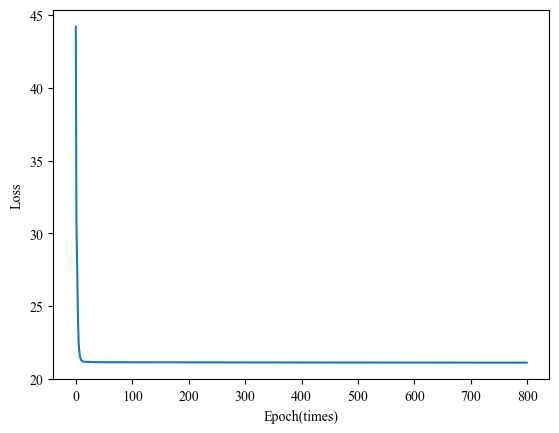

In [35]:
# model = LSTM()
model = GRU()

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr=0.001)
EPOCHS = 800
train(model, optimizer, EPOCHS, criterion)

In [36]:
def test(model, x_test, y_test):
    preds1 = []
    preds2 = []
    preds3 = [] 
    y_true1 = []
    y_true2 = []
    y_true3 = []
    
    model.eval()
    with torch.no_grad():       
        x_test = torch.Tensor(x_test).float()
        y_test = torch.Tensor(y_test).float()
        y_test = y_test.squeeze()
        outputs1,outputs2,outputs3 = model(x_test) 
        detached_pred1 = outputs1.detach().cpu().numpy()
        detached_pred2 = outputs2.detach().cpu().numpy()
        detached_pred3 = outputs3.detach().cpu().numpy()       
        detached_label = y_test.detach().cpu().numpy()
        for f in range(0, len(detached_label)):
            preds1.append(detached_pred1[f])
            preds2.append(detached_pred2[f])
            preds3.append(detached_pred3[f])
            y_true1.append(detached_label[f][0])
            y_true2.append(detached_label[f][1])
            y_true3.append(detached_label[f][2])

        mse = MK.mean_squared_error(y_true1, preds1)
        r2 = MK.r2_score(y_true1, preds1)
        print('SO2 MSE:',mse)
        print('SO2 R2:',r2) 
        MSE = MK.mean_squared_error(y_true2, preds2)
        R2 = MK.r2_score(y_true2, preds2)
        print('CS2 MSE:',MSE)
        print('CS2 R2:',R2)  
        MMSE = MK.mean_squared_error(y_true3, preds3)
        RR2 = MK.r2_score(y_true3, preds3)
        print('NO MSE:',MMSE)
        print('NO R2:',RR2) 
        sor = np.argsort(y_test[:,0],axis=0)
        sor1 = np.argsort(y_test[:,1],axis=0)
        sor2 = np.argsort(y_test[:,2],axis=0)
        x_ = range(len(sor))
        plt.figure(1)
        plt.figure(figsize=(10,6))
        plt.scatter(x_, outputs1[sor])
        plt.scatter(x_,y_test[:,0][sor])
        legend = plt.legend(['pre', 'act'],fontsize=20)
        plt.xlabel('Number of data groups',fontsize=20)
        plt.ylabel('$\mathregular{SO_2}$ concentration (ppm)',fontsize=20)
        plt.figure(2)
        plt.figure(figsize=(10,6))
        plt.scatter(x_, outputs2[sor1])
        plt.scatter(x_,y_test[:,1][sor1])
        legend = plt.legend(['pre', 'act'],fontsize=20)
        plt.xlabel('Number of data groups',fontsize=20)
        plt.ylabel('$\mathregular{CS_2}$ concentration (ppm)',fontsize=20)
        plt.figure(3)
        plt.figure(figsize=(10,6))
        plt.scatter(x_, outputs3[sor2])
        plt.scatter(x_,y_test[:,2][sor2])
        legend = plt.legend(['pre', 'act'],fontsize=20)
        plt.xlabel('Number of data groups',fontsize=20)
        plt.ylabel('NO concentration (ppm)',fontsize=20)
        config = {
        "font.family": 'Times New Roman', 
        }
        rcParams.update(config)
        plt.show()
        result=np.c_[y_test[:,0][sor],y_test[:,1][sor1],y_test[:,2][sor2], outputs1[sor],outputs2[sor1],outputs3[sor2]]

SO2 MSE: 7.1397195
SO2 R2: 0.42981809065680776
CS2 MSE: 7.140158
CS2 R2: 0.4246082852949211
NO MSE: 6.950308
NO R2: 0.43118370674170803


<Figure size 640x480 with 0 Axes>

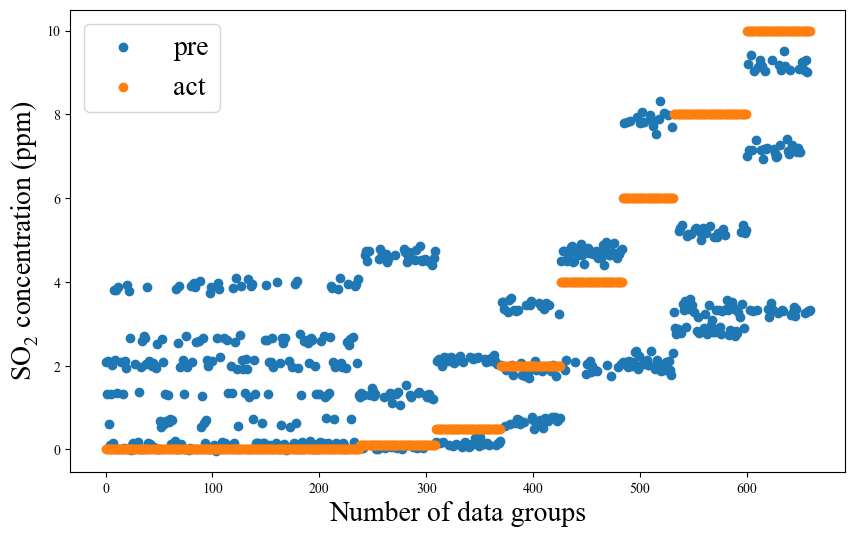

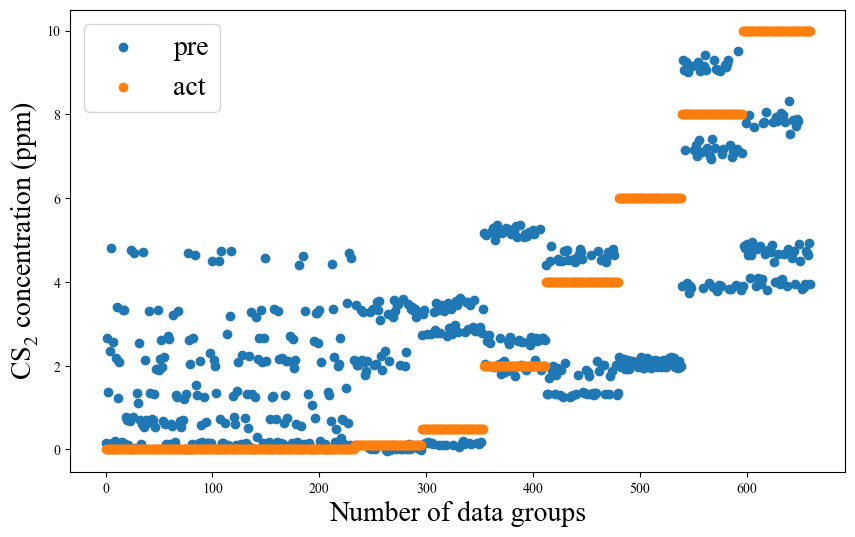

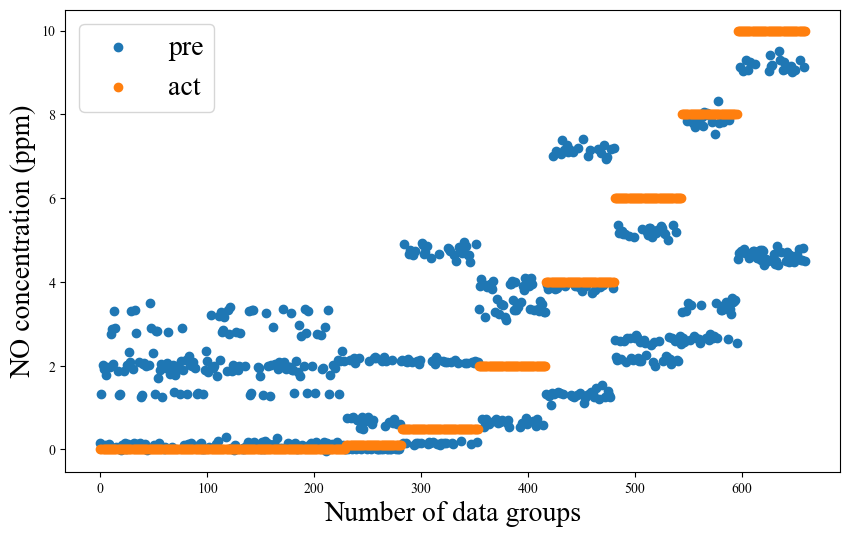

In [38]:
test(model, x_test, y_test)

In [39]:
def test(model, x_test, y_test):
    preds1 = []
    preds2 = []
    preds3 = [] 
    y_true1 = []
    y_true2 = []
    y_true3 = []

    model.eval()
    with torch.no_grad():
        x_test = torch.Tensor(x_test).float()
        y_test = torch.Tensor(y_test).float()
        y_test = y_test.squeeze()
        outputs1,outputs2,outputs3 = model(x_test) 
        detached_pred1 = outputs1.detach().cpu().numpy()
        detached_pred2 = outputs2.detach().cpu().numpy()
        detached_pred3 = outputs3.detach().cpu().numpy()
        detached_label = y_test.detach().cpu().numpy()
        for f in range(0, len(detached_label)):
            preds1.append(detached_pred1[f])
            preds2.append(detached_pred2[f])
            preds3.append(detached_pred3[f])
            y_true1.append(detached_label[f][0])
            y_true2.append(detached_label[f][1])
            y_true3.append(detached_label[f][2]) 
            
        mse = MK.mean_squared_error(y_true1, preds1)
        r2 = MK.r2_score(y_true1, preds1)
        print('SO2 MSE:',mse)
        print('SO2 R2:',r2) 
        MSE = MK.mean_squared_error(y_true2, preds2)
        R2 = MK.r2_score(y_true2, preds2)
        print('CS2 MSE:',MSE)
        print('CS2 R2:',R2)  
        MMSE = MK.mean_squared_error(y_true3, preds3)
        RR2 = MK.r2_score(y_true3, preds3)
        print('NO MSE:',MMSE)
        print('NO R2:',RR2)           
        x_ = range(len(y_test))
        plt.figure(figsize=(22,6))
        plt.figure(1)
        plt.plot(x_, outputs1)
        plt.plot(x_,y_test[:,0])
        legend = plt.legend(['pre', 'act'],fontsize=20)
        plt.figure(2)
        plt.plot(x_, outputs2)
        plt.plot(x_,y_test[:,1])
        legend = plt.legend(['pre', 'act'],fontsize=20)
        plt.figure(3)
        plt.plot(x_, outputs3)
        plt.plot(x_,y_test[:,2])
        legend = plt.legend(['pre', 'act'],fontsize=20)
        plt.show()

SO2 MSE: 7.1397195
SO2 R2: 0.42981809065680776
CS2 MSE: 7.140158
CS2 R2: 0.4246082852949211
NO MSE: 6.950308
NO R2: 0.43118370674170803


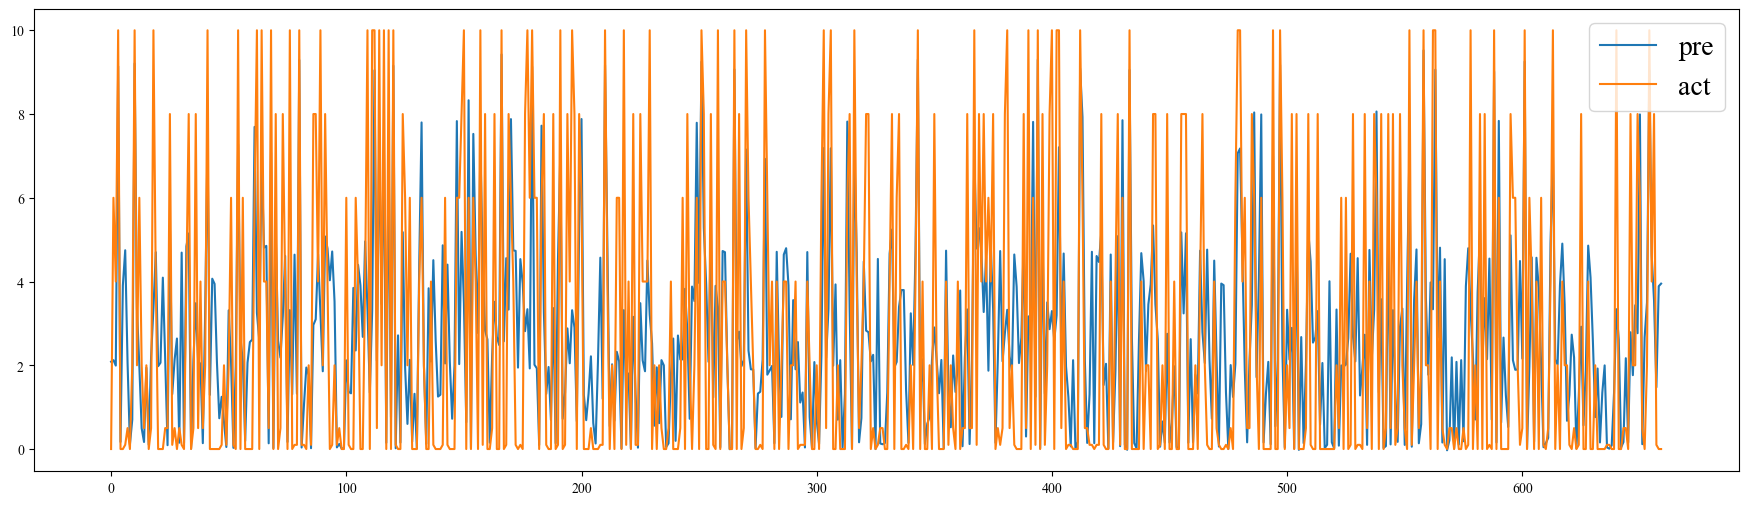

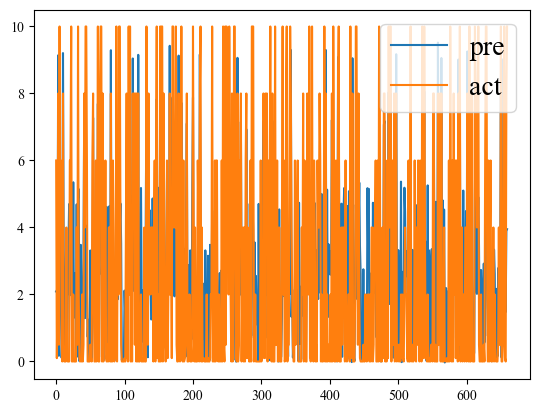

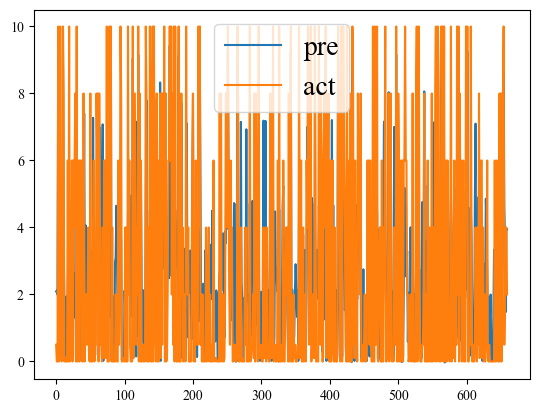

In [40]:
test(model, x_test, y_test)